### Mental Health Disorder Prediction in the Tech Industry

### DATA PROCESSING

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

pd.set_option('display.max_columns', 500)

In [3]:
val_mapping = {}

In [4]:
df = pd.read_csv('mental-health-in-tech-2016.csv')
print(df.columns)
print(df.shape)
df.head()

Index(['Are you self-employed?',
       'How many employees does your company or organization have?',
       'Is your employer primarily a tech company/organization?',
       'Is your primary role within your company related to tech/IT?',
       'Does your employer provide mental health benefits as part of healthcare coverage?',
       'Do you know the options for mental health care available under your employer-provided coverage?',
       'Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?',
       'Does your employer offer resources to learn more about mental health concerns and options for seeking help?',
       'Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?',
       'If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:',
       'Do you think that dis

Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \
0                                                NaN              
1                                                NaN              
2                                                NaN              
3                                                NaN              
4                                                1.0              

  Does your employer provide mental health benefits as part of healthcare coverage?  \
0                    Not eligible for coverage / N/A                                  
1                                                 No                                  
2                                                 No                                  
3                                                NaN                                  
4                                                Yes                                  

  Do you know the options for mental health care available under your employer-provided coverage?  \
0                                                NaN                                                
1                                                Yes                                                
2                                                NaN                                                
3                                                NaN                                                
4                                                Yes                                                

  Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?  \
0                                                 No                                                                                       
1                                                Yes                                                                                       
2                                                 No                                                                                       
3                                                NaN                                                                                       
4                                                 No                                                                                       

  Does your employer offer resources to learn more about mental health concerns and options for seeking help?  \
0                                                 No                                                            
1                                                Yes                                                            
2                                                 No                                                            
3                                                NaN                                                            
4                                                 No                                                            

  Is your anonymi

In [5]:
# change column names to simpler names

new_columns = ['self_employed', 'num_employees', 'tech_company', 'tech_role', 'mental_health_benefits', 
              'mental_health_coverage_options', 'employer_discussed_mental_health', 'employer_mental_health_resources', 
              'anonymity_protected', 'ease_of_requesting_leave', 'negative_consequences_discussing_mental_health', 
              'negative_consequences_discussing_physical_health', 'comfortable_discussing_mental_health_coworkers', 
              'comfortable_discussing_mental_health_supervisor', 'employer_takes_mental_health_seriously', 
              'observed_negative_consequences', 'medical_coverage_includes_mental_health', 'know_local_resources', 
              'reveal_mental_health_to_clients', 'negative_impact_revealing_to_clients', 'reveal_mental_health_to_coworkers', 
              'negative_impact_revealing_to_coworkers', 'productivity_affected_by_mental_health', 'percentage_work_time_affected', 
              'previous_employers', 'previous_employers_provided_mental_health_benefits', 'aware_of_previous_employer_mental_health_options', 
              'previous_employer_discussed_mental_health', 'previous_employer_provided_resources', 'anonymity_protected_previous_employer', 
              'negative_consequences_discussing_mental_health_previous_employer', 'negative_consequences_discussing_physical_health_previous_employer', 
              'willing_to_discuss_mental_health_previous_coworkers', 'willing_to_discuss_mental_health_previous_supervisor', 
              'previous_employer_takes_mental_health_seriously', 'observed_negative_consequences_previous_employer', 
              'willing_to_bring_up_physical_health_issue_in_interview', 'why_or_why_not', 'willing_to_bring_up_mental_health_issue_in_interview', 
              'why_or_why_not_1', 'mental_health_issue_hurt_career', 'team_members_view_negatively', 'willing_to_share_with_friends_and_family', 
              'observed_unsupportive_response', 'observations_made_less_likely_to_reveal', 'family_history_of_mental_illness', 
              'had_mental_health_disorder_in_past', 'currently_have_mental_health_disorder', 'diagnosed_conditions', 'believed_conditions', 
              'diagnosed_by_professional', 'diagnosed_conditions_by_professional', 'sought_treatment_from_professional', 
              'interferes_with_work_when_treated', 'interferes_with_work_when_not_treated', 'age', 'gender', 'country_live_in', 
              'us_state_live_in', 'country_work_in', 'us_state_work_in', 'work_position', 'work_remotely']

df.columns = new_columns

In [6]:
df.describe()

self_employed  tech_company   tech_role  \
count    1433.000000   1146.000000  263.000000   
mean        0.200279      0.770506    0.942966   
std         0.400349      0.420691    0.232350   
min         0.000000      0.000000    0.000000   
25%         0.000000      1.000000    1.000000   
50%         0.000000      1.000000    1.000000   
75%         0.000000      1.000000    1.000000   
max         1.000000      1.000000    1.000000   

       medical_coverage_includes_mental_health  previous_employers  \
count                               287.000000         1433.000000   
mean                                  0.644599            0.882066   
std                                   0.479471            0.322643   
min                                   0.000000            0.000000   
25%                                   0.000000            1.000000   
50%                                   1.000000            1.000000   
75%                                   1.000000            1.000000   
max                                   1.000000            1.000000   

       sought_treatment_from_professional          age  
count                         1433.000000  1433.000000  
mean                             0.585485    34.286113  
std                              0.492810    11.290931  
min                              0.000000     3.000000  
25%                              0.000000    28.000000  
50%                              1.000000    33.000000  
75%                              1.000000    39.000000  
max                              1.000000   323.000000

<Figure size 1000x500 with 0 Axes>

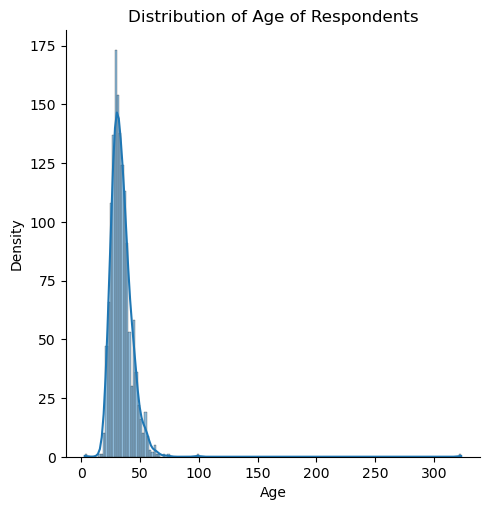

In [7]:
# plot the distribution of the age of the respondents and the total number of respondents
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.displot(df['age'], kde=True)
plt.title('Distribution of Age of Respondents')
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

Text(0.5, 1.0, 'Total Number of Respondents by Age')

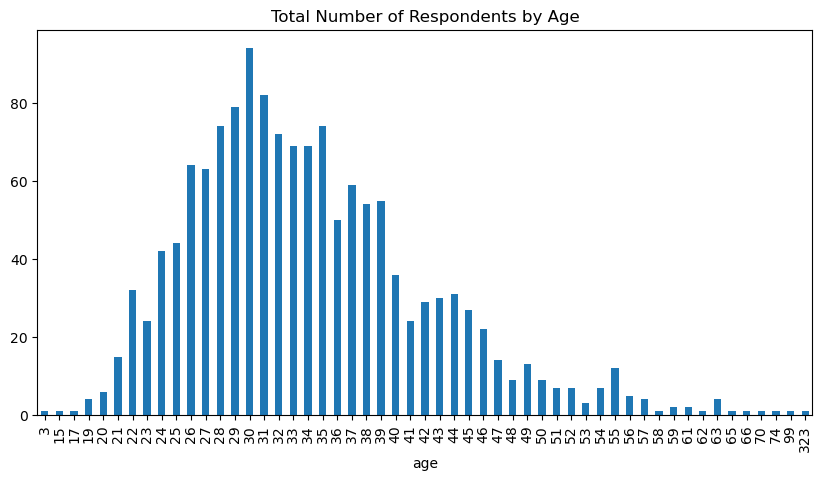

In [8]:
df['age'].value_counts().sort_index().plot(kind='bar', figsize=(10, 5))
plt.title('Total Number of Respondents by Age')

In [9]:
# drop ages too high or too low
df = df[df['age'] <= 75]
df = df[df['age'] >= 18]

In [10]:
# how many people work in a different country than they live in
df.query('country_live_in != country_work_in').shape[0]
df.query('us_state_live_in != us_state_work_in').shape[0]

634

In [11]:
#Calculate percentage of missing values for each column
missing = df.isnull().sum()
missing = missing[missing > 0]
missing = missing / df.shape[0] * 100
missing

num_employees                                                         20.028011
tech_company                                                          20.028011
tech_role                                                             81.582633
mental_health_benefits                                                20.028011
mental_health_coverage_options                                        29.271709
employer_discussed_mental_health                                      20.028011
employer_mental_health_resources                                      20.028011
anonymity_protected                                                   20.028011
ease_of_requesting_leave                                              20.028011
negative_consequences_discussing_mental_health                        20.028011
negative_consequences_discussing_physical_health                      20.028011
comfortable_discussing_mental_health_coworkers                        20.028011
comfortable_discussing_mental_health_sup

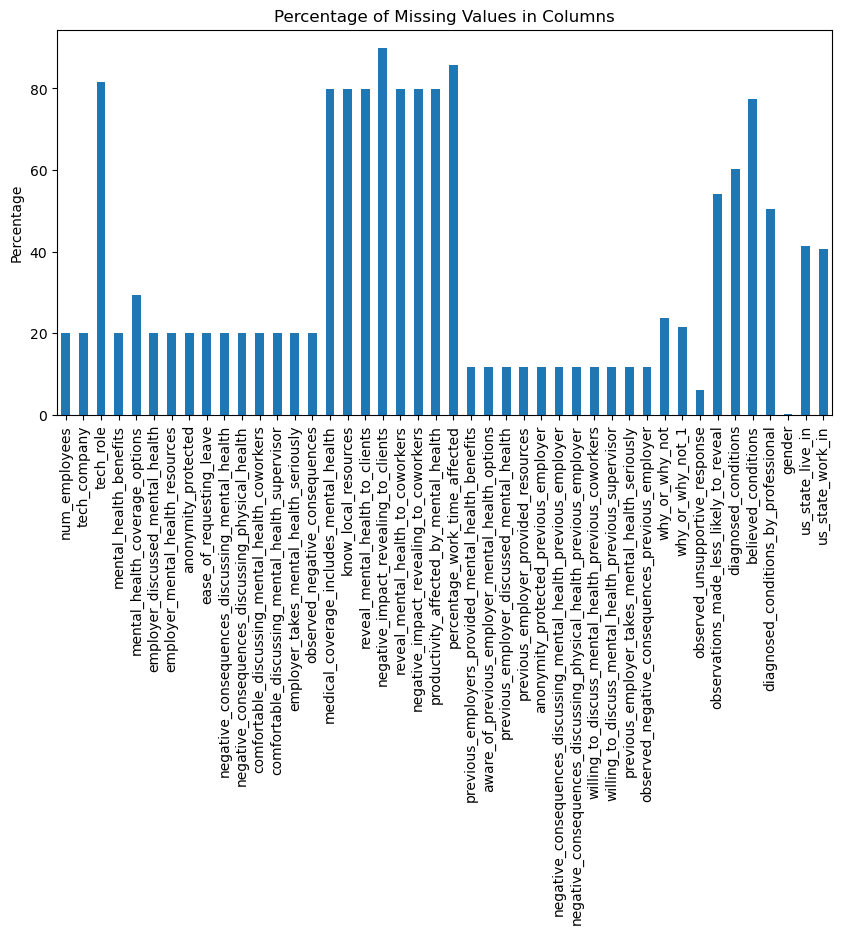

In [12]:
missing.plot(kind='bar', figsize=(10, 5))
plt.title('Percentage of Missing Values in Columns')
plt.ylabel('Percentage')
plt.show()

In [13]:
df['work_where_lives'] = ((df['country_live_in'] == df['country_work_in']) & (df['us_state_live_in'] == df['us_state_work_in'])) | ((df['country_live_in'] == df['country_work_in']) & (df["country_live_in"] != 'United States of America'))
df['work_where_lives'] = df['work_where_lives'].map({True: 1, False: 0})
df['work_where_lives'].value_counts()

work_where_lives
1    1361
0      67
Name: count, dtype: int64

In [14]:
df.head()

self_employed num_employees  tech_company  tech_role  \
0              0        26-100           1.0        NaN   
1              0          6-25           1.0        NaN   
2              0          6-25           1.0        NaN   
3              1           NaN           NaN        NaN   
4              0          6-25           0.0        1.0   

            mental_health_benefits mental_health_coverage_options  \
0  Not eligible for coverage / N/A                            NaN   
1                               No                            Yes   
2                               No                            NaN   
3                              NaN                            NaN   
4                              Yes                            Yes   

  employer_discussed_mental_health employer_mental_health_resources  \
0                               No                               No   
1                              Yes                              Yes   
2                               No                               No   
3                              NaN                              NaN   
4                               No                               No   

  anonymity_protected    ease_of_requesting_leave  \
0        I don't know                   Very easy   
1                 Yes               Somewhat easy   
2        I don't know  Neither easy nor difficult   
3                 NaN                         NaN   
4                  No  Neither easy nor difficult   

  negative_consequences_discussing_mental_health  \
0                                             No   
1                                             No   
2                                          Maybe   
3                                            NaN   
4                                            Yes   

  negative_consequences_discussing_physical_health  \
0                                               No   
1                                               No   
2                                               No   
3                                              NaN   
4                                            Maybe   

  comfortable_discussing_mental_health_coworkers  \
0                                          Maybe   
1                                          Maybe   
2                                          Maybe   
3                                            NaN   
4                                          Maybe   

  comfortable_discussing_mental_health_supervisor  \
0                                             Yes   
1                                             Yes   
2                                           Maybe   
3                                             NaN   
4                                              No   

  employer_takes_mental_health_seriously observed_negative_consequences  \
0                           I don't know                             No   
1                                    Yes                             No   
2                           I don't know                             No   
3                                    NaN                            NaN   
4                                     No                             No   

   medical_coverage_includes_mental_health know_local_resources  \
0                                      NaN                  NaN   
1                                      NaN                  NaN   
2                                      NaN                  NaN   
3                                      1.0  Yes, I know several   
4                                      NaN                  NaN   

  reveal_mental_health_to_clients negative_impact_revealing_to_clients  \
0                             NaN                                  NaN   
1                             NaN                                  NaN   
2                             NaN                                  NaN   
3       Sometimes, if it comes up                         I'm not s

In [15]:
col_to_drop = ['self_employed', 'tech_company', 'tech_role', 'percentage_work_time_affected', 
              'previous_employers', 'previous_employers_provided_mental_health_benefits', 'aware_of_previous_employer_mental_health_options', 
              'previous_employer_discussed_mental_health', 'previous_employer_provided_resources', 'anonymity_protected_previous_employer', 
              'negative_consequences_discussing_mental_health_previous_employer', 'negative_consequences_discussing_physical_health_previous_employer', 
              'willing_to_discuss_mental_health_previous_coworkers', 'willing_to_discuss_mental_health_previous_supervisor', 
              'previous_employer_takes_mental_health_seriously', 'observed_negative_consequences_previous_employer', 
              'diagnosed_conditions', 'believed_conditions', 
              'diagnosed_by_professional', 'diagnosed_conditions_by_professional', 
              'gender', 'country_live_in', 'why_or_why_not', 'why_or_why_not_1',
              'us_state_live_in', 'us_state_work_in', 'work_position']

df = df.drop(col_to_drop, axis=1)
df.head()

num_employees           mental_health_benefits  \
0        26-100  Not eligible for coverage / N/A   
1          6-25                               No   
2          6-25                               No   
3           NaN                              NaN   
4          6-25                              Yes   

  mental_health_coverage_options employer_discussed_mental_health  \
0                            NaN                               No   
1                            Yes                              Yes   
2                            NaN                               No   
3                            NaN                              NaN   
4                            Yes                               No   

  employer_mental_health_resources anonymity_protected  \
0                               No        I don't know   
1                              Yes                 Yes   
2                               No        I don't know   
3                              NaN                 NaN   
4                               No                  No   

     ease_of_requesting_leave negative_consequences_discussing_mental_health  \
0                   Very easy                                             No   
1               Somewhat easy                                             No   
2  Neither easy nor difficult                                          Maybe   
3                         NaN                                            NaN   
4  Neither easy nor difficult                                            Yes   

  negative_consequences_discussing_physical_health  \
0                                               No   
1                                               No   
2                                               No   
3                                              NaN   
4                                            Maybe   

  comfortable_discussing_mental_health_coworkers  \
0                                          Maybe   
1                                          Maybe   
2                                          Maybe   
3                                            NaN   
4                                          Maybe   

  comfortable_discussing_mental_health_supervisor  \
0                                             Yes   
1                                             Yes   
2                                           Maybe   
3                                             NaN   
4                                              No   

  employer_takes_mental_health_seriously observed_negative_consequences  \
0                           I don't know                             No   
1                                    Yes                             No   
2                           I don't know                             No   
3                                    NaN                            NaN   
4                                     No                             No   

   medical_coverage_includes_mental_health know_local_resources  \
0                                      NaN                  NaN   
1                                      NaN                  NaN   
2                                      NaN                  NaN   
3                                      1.0  Yes, I know several   
4                                      NaN                  NaN   

  reveal_mental_health_to_clients negative_impact_revealing_to_clients  \
0                             NaN                                  NaN   
1                             NaN                                  NaN   
2                             NaN                                  NaN   
3       Sometimes, if it comes up                         I'm not sure   
4                             NaN                                  NaN   

  reveal_mental_health_to_coworkers negative_impact_revealing_to_coworkers  \
0                               NaN                                    NaN   
1                               

In [16]:
print(f"Features with missing values: {len(missing)}")

Features with missing values: 44


In [17]:
col = 'num_employees'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

num_employees
26-100            292
More than 1000    255
100-500           247
6-25              208
500-1000           80
1-5                60
Name: count, dtype: int64
total nan values: 286


### MAPPING

In [19]:
size_mapping = {
    '1-5': "1-100",
    '6-25': "1-100",
    '26-100': "1-100",
    '100-500': "100-1000",
    '500-1000': "100-1000",
    'More than 1000': "1000 +",
    0: 0
}

df[col] = df[col].map(size_mapping)

val_mapping.update({col: {
    '1-100': 1,
    '100-1000': 2,
    '1000 +': 3,
    0: 0
}})

df[col] = df[col].fillna(0)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

num_employees
1    560
2    327
0    286
3    255
Name: count, dtype: int64

In [20]:
col = 'mental_health_benefits'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

mental_health_benefits
Yes                                528
I don't know                       319
No                                 212
Not eligible for coverage / N/A     83
Name: count, dtype: int64
total nan values: 286


In [21]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I don't know": 2,
    'Not eligible for coverage / N/A': 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

mental_health_benefits
 1    528
 2    319
 0    295
-1    286
Name: count, dtype: int64

In [22]:
col = 'mental_health_coverage_options'
print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

mental_health_coverage_options
No               352
I am not sure    351
Yes              307
Name: count, dtype: int64
total nan values: 418


In [23]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I am not sure": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

mental_health_coverage_options
-1    418
 0    352
 2    351
 1    307
Name: count, dtype: int64

In [24]:
col = 'employer_discussed_mental_health'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

employer_discussed_mental_health
No              811
Yes             229
I don't know    102
Name: count, dtype: int64
total nan values: 286


In [25]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I don't know": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

employer_discussed_mental_health
 0    811
-1    286
 1    229
 2    102
Name: count, dtype: int64

In [26]:
col = 'employer_mental_health_resources'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

employer_mental_health_resources
No              530
I don't know    318
Yes             294
Name: count, dtype: int64
total nan values: 286


In [27]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I don't know": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

employer_mental_health_resources
 0    530
 2    318
 1    294
-1    286
Name: count, dtype: int64

In [28]:
col = 'anonymity_protected'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

anonymity_protected
I don't know    739
Yes             319
No               84
Name: count, dtype: int64
total nan values: 286


In [29]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I don't know": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

anonymity_protected
 2    739
 1    319
-1    286
 0     84
Name: count, dtype: int64

In [30]:
col = 'ease_of_requesting_leave'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

ease_of_requesting_leave
Somewhat easy                 279
Very easy                     220
Somewhat difficult            198
Neither easy nor difficult    178
I don't know                  149
Very difficult                118
Name: count, dtype: int64
total nan values: 286


In [31]:
val_mapping.update({col: {
    'Very easy': 1,
    'Somewhat easy': 1,
    "Neither easy nor difficult": 3,
    'Somewhat difficult': 0,
    'Very difficult': 0,
    "I don't know": -1,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

ease_of_requesting_leave
 1    499
-1    435
 0    316
 3    178
Name: count, dtype: int64

In [32]:
col = 'negative_consequences_discussing_mental_health'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

negative_consequences_discussing_mental_health
Maybe    486
No       436
Yes      220
Name: count, dtype: int64
total nan values: 286


In [33]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

negative_consequences_discussing_mental_health
 2    486
 0    436
-1    286
 1    220
Name: count, dtype: int64

In [34]:
col = 'negative_consequences_discussing_physical_health'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

negative_consequences_discussing_physical_health
No       833
Maybe    268
Yes       41
Name: count, dtype: int64
total nan values: 286


In [35]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

negative_consequences_discussing_physical_health
 0    833
-1    286
 2    268
 1     41
Name: count, dtype: int64

In [36]:
col = 'comfortable_discussing_mental_health_coworkers'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

comfortable_discussing_mental_health_coworkers
Maybe    477
No       391
Yes      274
Name: count, dtype: int64
total nan values: 286


In [37]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

comfortable_discussing_mental_health_coworkers
 2    477
 0    391
-1    286
 1    274
Name: count, dtype: int64

In [38]:
col = 'comfortable_discussing_mental_health_supervisor'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

comfortable_discussing_mental_health_supervisor
Yes      425
Maybe    381
No       336
Name: count, dtype: int64
total nan values: 286


In [39]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

comfortable_discussing_mental_health_supervisor
 1    425
 2    381
 0    336
-1    286
Name: count, dtype: int64

In [40]:
col = 'employer_takes_mental_health_seriously'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

employer_takes_mental_health_seriously
I don't know    491
Yes             349
No              302
Name: count, dtype: int64
total nan values: 286


In [41]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I don't know": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

employer_takes_mental_health_seriously
 2    491
 1    349
 0    302
-1    286
Name: count, dtype: int64

In [42]:
col = 'observed_negative_consequences'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

observed_negative_consequences
No     1045
Yes      97
Name: count, dtype: int64
total nan values: 286


In [43]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

observed_negative_consequences
 0    1045
-1     286
 1      97
Name: count, dtype: int64

In [44]:
col = 'medical_coverage_includes_mental_health'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

medical_coverage_includes_mental_health
1.0    185
0.0    101
Name: count, dtype: int64
total nan values: 1142


In [45]:
df[col] = df[col].fillna(-1)
df[col].value_counts()

medical_coverage_includes_mental_health
-1.0    1142
 1.0     185
 0.0     101
Name: count, dtype: int64

In [46]:
col = 'know_local_resources'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

know_local_resources
I know some             141
Yes, I know several      83
No, I don't know any     62
Name: count, dtype: int64
total nan values: 1142


In [47]:
val_mapping.update({col: {
    'Yes, I know several': 1,
    'I know some': 1,
    "No, I don't know any": 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

know_local_resources
-1    1142
 1     224
 0      62
Name: count, dtype: int64

In [48]:
col = 'reveal_mental_health_to_clients'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

reveal_mental_health_to_clients
Not applicable to me                         100
No, because it would impact me negatively     83
Sometimes, if it comes up                     57
No, because it doesn't matter                 44
Yes, always                                    2
Name: count, dtype: int64
total nan values: 1142


In [49]:
val_mapping.update({col: {
    'Not applicable to me': 0,
    'No, because it would impact me negatively': 0,
    'Sometimes, if it comes up': 1,
    "No, because it doesn't matter": 0,
    'Yes, always': 1,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

reveal_mental_health_to_clients
-1    1142
 0     227
 1      59
Name: count, dtype: int64

In [50]:
col = 'negative_impact_revealing_to_clients'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

negative_impact_revealing_to_clients
I'm not sure    66
No              42
Yes             36
Name: count, dtype: int64
total nan values: 1284


In [51]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I'm not sure": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

negative_impact_revealing_to_clients
-1    1284
 2      66
 0      42
 1      36
Name: count, dtype: int64

In [52]:
col = 'reveal_mental_health_to_coworkers'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

reveal_mental_health_to_coworkers
Not applicable to me                         110
Sometimes, if it comes up                     99
No, because it would impact me negatively     51
No, because it doesn't matter                 15
Yes, always                                   11
Name: count, dtype: int64
total nan values: 1142


In [53]:
val_mapping.update({col: {
    'Not applicable to me': 0,
    'No, because it would impact me negatively': 0,
    'Sometimes, if it comes up': 1,
    "No, because it doesn't matter": 0,
    'Yes, always': 1,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

reveal_mental_health_to_coworkers
-1    1142
 0     176
 1     110
Name: count, dtype: int64

In [54]:
col = 'negative_impact_revealing_to_coworkers'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

negative_impact_revealing_to_coworkers
Not applicable to me    132
I'm not sure             62
No                       57
Yes                      35
Name: count, dtype: int64
total nan values: 1142


In [55]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "I'm not sure": -1,
    "Not applicable to me": 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

negative_impact_revealing_to_coworkers
-1    1204
 0     189
 1      35
Name: count, dtype: int64

In [56]:
col = 'productivity_affected_by_mental_health'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

productivity_affected_by_mental_health
Yes                     204
Unsure                   38
Not applicable to me     30
No                       14
Name: count, dtype: int64
total nan values: 1142


In [57]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Not applicable to me": 0,
    "Unsure": -1,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

productivity_affected_by_mental_health
-1    1180
 1     204
 0      44
Name: count, dtype: int64

In [58]:
col = 'willing_to_bring_up_physical_health_issue_in_interview'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

willing_to_bring_up_physical_health_issue_in_interview
Maybe    631
No       441
Yes      356
Name: count, dtype: int64
total nan values: 0


In [59]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

willing_to_bring_up_physical_health_issue_in_interview
2    631
0    441
1    356
Name: count, dtype: int64

In [60]:
col = 'willing_to_bring_up_mental_health_issue_in_interview'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

willing_to_bring_up_mental_health_issue_in_interview
No       882
Maybe    436
Yes      110
Name: count, dtype: int64
total nan values: 0


In [61]:
val_mapping.update({col: {
    'Yes': 1,
    'No': 0,
    "Maybe": 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

willing_to_bring_up_mental_health_issue_in_interview
0    882
2    436
1    110
Name: count, dtype: int64

In [62]:
col = 'mental_health_issue_hurt_career'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

mental_health_issue_hurt_career
Maybe                         584
Yes, I think it would         563
No, I don't think it would    146
Yes, it has                   105
No, it has not                 30
Name: count, dtype: int64
total nan values: 0


In [63]:
val_mapping.update({col: {
    "Maybe": 2,
    "Yes, I think it would": 1,
    "No, I don't think it would": 0,
    "Yes, it has": 1,
    "No, it has not": 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

mental_health_issue_hurt_career
1    668
2    584
0    176
Name: count, dtype: int64

In [64]:
col = 'team_members_view_negatively'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

team_members_view_negatively
Maybe                           590
Yes, I think they would         402
No, I don't think they would    345
No, they do not                  49
Yes, they do                     42
Name: count, dtype: int64
total nan values: 0


In [65]:
val_mapping.update({col: {
    "Maybe": 2,
    "Yes, I think they would": 1,
    "No, I don't think they would": 0,
    "Yes, they do": 1,
    "No, they do not": 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

team_members_view_negatively
2    590
1    444
0    394
Name: count, dtype: int64

In [66]:
col = 'willing_to_share_with_friends_and_family'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

willing_to_share_with_friends_and_family
Somewhat open                                            638
Very open                                                251
Somewhat not open                                        214
Neutral                                                  140
Not applicable to me (I do not have a mental illness)    111
Not open at all                                           74
Name: count, dtype: int64
total nan values: 0


In [67]:
val_mapping.update({col: {
    "Somewhat open": 1,
    "Very open": 1,
    "Neutral": 2,
    "Not applicable to me (I do not have a mental illness)": 0,
    "Somewhat not open": 0,
    "Not open at all": 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

willing_to_share_with_friends_and_family
1    889
0    399
2    140
Name: count, dtype: int64

In [68]:
col = 'observed_unsupportive_response'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

observed_unsupportive_response
No                    567
Maybe/Not sure        344
Yes, I observed       263
Yes, I experienced    166
Name: count, dtype: int64
total nan values: 88


In [69]:
val_mapping.update({col: {
    "No" : 0,
    "Maybe/Not sure" : 2,
    "Yes, I observed" : 1,
    "Yes, I experienced" : 1,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

observed_unsupportive_response
 0    567
 1    429
 2    344
-1     88
Name: count, dtype: int64

In [70]:
col = 'observations_made_less_likely_to_reveal'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

observations_made_less_likely_to_reveal
Yes      244
No       234
Maybe    176
Name: count, dtype: int64
total nan values: 774


In [71]:
val_mapping.update({col: {
    "Yes" : 1,
    "Maybe" : 2,
    "No" : 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

observations_made_less_likely_to_reveal
-1    774
 1    244
 0    234
 2    176
Name: count, dtype: int64

In [72]:
col = 'family_history_of_mental_illness'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

family_history_of_mental_illness
Yes             668
No              486
I don't know    274
Name: count, dtype: int64
total nan values: 0


In [73]:
val_mapping.update({col: {
    "Yes" : 1,
    "No" : 0,
    "I don't know" : 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

family_history_of_mental_illness
1    668
0    486
2    274
Name: count, dtype: int64

In [74]:
col = 'had_mental_health_disorder_in_past'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

had_mental_health_disorder_in_past
Yes      734
No       448
Maybe    246
Name: count, dtype: int64
total nan values: 0


In [75]:
val_mapping.update({col: {
    "Yes" : 1,
    "No" : 0,
    "Maybe" : 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

had_mental_health_disorder_in_past
1    734
0    448
2    246
Name: count, dtype: int64

In [76]:
col = 'currently_have_mental_health_disorder'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

currently_have_mental_health_disorder
Yes      574
No       528
Maybe    326
Name: count, dtype: int64
total nan values: 0


In [77]:
val_mapping.update({col: {
    "Yes" : 1,
    "No" : 0,
    "Maybe" : 2,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

currently_have_mental_health_disorder
1    574
0    528
2    326
Name: count, dtype: int64

In [78]:
col = 'sought_treatment_from_professional'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

sought_treatment_from_professional
1    837
0    591
Name: count, dtype: int64
total nan values: 0


In [79]:
col = 'interferes_with_work_when_treated'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

interferes_with_work_when_treated
Not applicable to me    555
Sometimes               369
Rarely                  320
Never                   119
Often                    65
Name: count, dtype: int64
total nan values: 0


In [80]:
val_mapping.update({col: {
    "Often" : 1,
    "Sometimes" : 2,
    "Rarely" : 2,
    "Never" : 0,
    "Not applicable to me" : 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

interferes_with_work_when_treated
2    689
0    674
1     65
Name: count, dtype: int64

In [81]:
col = 'interferes_with_work_when_not_treated'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

interferes_with_work_when_not_treated
Often                   537
Not applicable to me    466
Sometimes               361
Rarely                   52
Never                    12
Name: count, dtype: int64
total nan values: 0


In [82]:
val_mapping.update({col: {
    "Often" : 1,
    "Sometimes" : 2,
    "Rarely" : 2,
    "Never" : 0,
    "Not applicable to me" : 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

interferes_with_work_when_not_treated
1    537
0    478
2    413
Name: count, dtype: int64

In [83]:
col = 'country_work_in'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

country_work_in
United States of America    849
United Kingdom              183
Canada                       72
Germany                      58
Netherlands                  47
Australia                    34
Sweden                       20
Ireland                      15
France                       14
Switzerland                  10
India                         9
Russia                        9
New Zealand                   9
Brazil                        9
Denmark                       7
Bulgaria                      7
Finland                       7
Belgium                       5
South Africa                  4
Poland                        4
Austria                       4
Italy                         3
Czech Republic                3
Spain                         3
Chile                         3
Norway                        3
Romania                       3
Bosnia and Herzegovina        2
Afghanistan                   2
Pakistan                      2
Israel                  

In [84]:
region_map = {
    'North America': ['United States of America', 'Canada', 'Mexico', 'Costa Rica', 'Guatemala'],
    'Europe': ['United Kingdom', 'Germany', 'Netherlands', 'France', 'Spain', 'Ireland', 'Sweden', 'Switzerland', 'Poland', 'Italy', 'Belgium', 'Portugal', 'Austria', 'Norway', 'Finland', 'Denmark', 'Greece', 'Hungary', 'Czech Republic', 'Romania', 'Slovakia', 'Slovenia', 'Croatia', 'Bulgaria', 'Estonia', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta', 'Cyprus', 'Iceland', 'Russia', 'Bosnia and Herzegovina', 'Serbia'],
    'Asia': ['India', 'Australia', 'New Zealand', 'Singapore', 'Japan', 'Pakistan', 'Israel', 'Afghanistan', 'Bangladesh', 'Turkey', 'Vietnam', 'Iran', 'Brunei', 'China', 'United Arab Emirates'],
    'Africa': ['South Africa'],
    'South America': ['Brazil', 'Colombia', 'Chile', 'Argentina', 'Venezuela', 'Ecuador'],
    'Central America': ['Mexico']
}

def get_continent(country):
    for continent, countries in region_map.items():
        if country in countries:
            return continent
    return 'Other'

df[col] = df[col].apply(get_continent)
df.rename(columns={'country_work_in': 'area_work_in'}, inplace=True)
col = 'area_work_in'
df[col].value_counts()

area_work_in
North America    925
Europe           414
Asia              66
South America     17
Africa             4
Other              2
Name: count, dtype: int64

In [85]:
val_mapping.update({col: {
    'North America': 1,
    'Europe': 2,
    'Asia': 3,
    'South America': 4,
    'Africa': 5,
    'Central America': 6,
    'Other': 0
}})

df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

area_work_in
1    925
2    414
3     66
4     17
5      4
0      2
Name: count, dtype: int64

In [86]:
col = 'work_remotely'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

work_remotely
Sometimes    753
Always       342
Never        333
Name: count, dtype: int64
total nan values: 0


In [87]:
val_mapping.update({col: {
    "Sometimes" : 2,
    "Always" : 1,
    "Never" : 0,
    -1: -1
}})

df[col] = df[col].fillna(-1)
df[col] = df[col].map(val_mapping[col])
df[col].value_counts()

work_remotely
2    753
1    342
0    333
Name: count, dtype: int64

In [88]:
col = 'work_where_lives'

print(df[col].value_counts())
print(f"total nan values: {df[col].isna().sum()}")

work_where_lives
1    1361
0      67
Name: count, dtype: int64
total nan values: 0


In [89]:
df.head()

num_employees  mental_health_benefits  mental_health_coverage_options  \
0              1                       0                              -1   
1              1                       0                               1   
2              1                       0                              -1   
3              0                      -1                              -1   
4              1                       1                               1   

   employer_discussed_mental_health  employer_mental_health_resources  \
0                                 0                                 0   
1                                 1                                 1   
2                                 0                                 0   
3                                -1                                -1   
4                                 0                                 0   

   anonymity_protected  ease_of_requesting_leave  \
0                    2                         1   
1                    1                         1   
2                    2                         3   
3                   -1                        -1   
4                    0                         3   

   negative_consequences_discussing_mental_health  \
0                                               0   
1                                               0   
2                                               2   
3                                              -1   
4                                               1   

   negative_consequences_discussing_physical_health  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                -1   
4                                                 2   

   comfortable_discussing_mental_health_coworkers  \
0                                               2   
1                                               2   
2                                               2   
3                                              -1   
4                                               2   

   comfortable_discussing_mental_health_supervisor  \
0                                                1   
1                                                1   
2                                                2   
3                                               -1   
4                                                0   

   employer_takes_mental_health_seriously  observed_negative_consequences  \
0                                       2                               0   
1                                       1                               0   
2                                       2                               0   
3                                      -1                              -1   
4                                       0                               0   

   medical_coverage_includes_mental_health  know_local_resources  \
0                                     -1.0                    -1   
1                                     -1.0                    -1   
2                                     -1.0                    -1   
3                                      1.0                     1   
4                                     -1.0                    -1   

   reveal_mental_health_to_clients  negative_impact_revealing_to_clients  \
0                               -1                                    -1   
1                               -1                                    -1   
2                               -1                                    -1   
3                                1                                     2   
4                               -1                                    -1   

   reveal_mental_health_to_coworkers  negative_impact_revealing_to_coworkers  \
0                                 -1                                      -1   
1          

In [90]:
df.isna().sum()


num_employees                                             0
mental_health_benefits                                    0
mental_health_coverage_options                            0
employer_discussed_mental_health                          0
employer_mental_health_resources                          0
anonymity_protected                                       0
ease_of_requesting_leave                                  0
negative_consequences_discussing_mental_health            0
negative_consequences_discussing_physical_health          0
comfortable_discussing_mental_health_coworkers            0
comfortable_discussing_mental_health_supervisor           0
employer_takes_mental_health_seriously                    0
observed_negative_consequences                            0
medical_coverage_includes_mental_health                   0
know_local_resources                                      0
reveal_mental_health_to_clients                           0
negative_impact_revealing_to_clients    

In [91]:
df.to_csv('cleaned_data.csv', index=False)

In [92]:
df = pd.read_csv('cleaned_data.csv')
df.head()

num_employees  mental_health_benefits  mental_health_coverage_options  \
0              1                       0                              -1   
1              1                       0                               1   
2              1                       0                              -1   
3              0                      -1                              -1   
4              1                       1                               1   

   employer_discussed_mental_health  employer_mental_health_resources  \
0                                 0                                 0   
1                                 1                                 1   
2                                 0                                 0   
3                                -1                                -1   
4                                 0                                 0   

   anonymity_protected  ease_of_requesting_leave  \
0                    2                         1   
1                    1                         1   
2                    2                         3   
3                   -1                        -1   
4                    0                         3   

   negative_consequences_discussing_mental_health  \
0                                               0   
1                                               0   
2                                               2   
3                                              -1   
4                                               1   

   negative_consequences_discussing_physical_health  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                -1   
4                                                 2   

   comfortable_discussing_mental_health_coworkers  \
0                                               2   
1                                               2   
2                                               2   
3                                              -1   
4                                               2   

   comfortable_discussing_mental_health_supervisor  \
0                                                1   
1                                                1   
2                                                2   
3                                               -1   
4                                                0   

   employer_takes_mental_health_seriously  observed_negative_consequences  \
0                                       2                               0   
1                                       1                               0   
2                                       2                               0   
3                                      -1                              -1   
4                                       0                               0   

   medical_coverage_includes_mental_health  know_local_resources  \
0                                     -1.0                    -1   
1                                     -1.0                    -1   
2                                     -1.0                    -1   
3                                      1.0                     1   
4                                     -1.0                    -1   

   reveal_mental_health_to_clients  negative_impact_revealing_to_clients  \
0                               -1                                    -1   
1                               -1                                    -1   
2                               -1                                    -1   
3                                1                                     2   
4                               -1                                    -1   

   reveal_mental_health_to_coworkers  negative_impact_revealing_to_coworkers  \
0                                 -1                                      -1   
1          

🔎 İlk 5 Satır:
    num_employees  mental_health_benefits  mental_health_coverage_options  \
0              1                       0                              -1   
1              1                       0                               1   
2              1                       0                              -1   
3              0                      -1                              -1   
4              1                       1                               1   

   employer_discussed_mental_health  employer_mental_health_resources  \
0                                 0                                 0   
1                                 1                                 1   
2                                 0                                 0   
3                                -1                                -1   
4                                 0                                 0   

   anonymity_protected  ease_of_requesting_leave  \
0                    2              

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


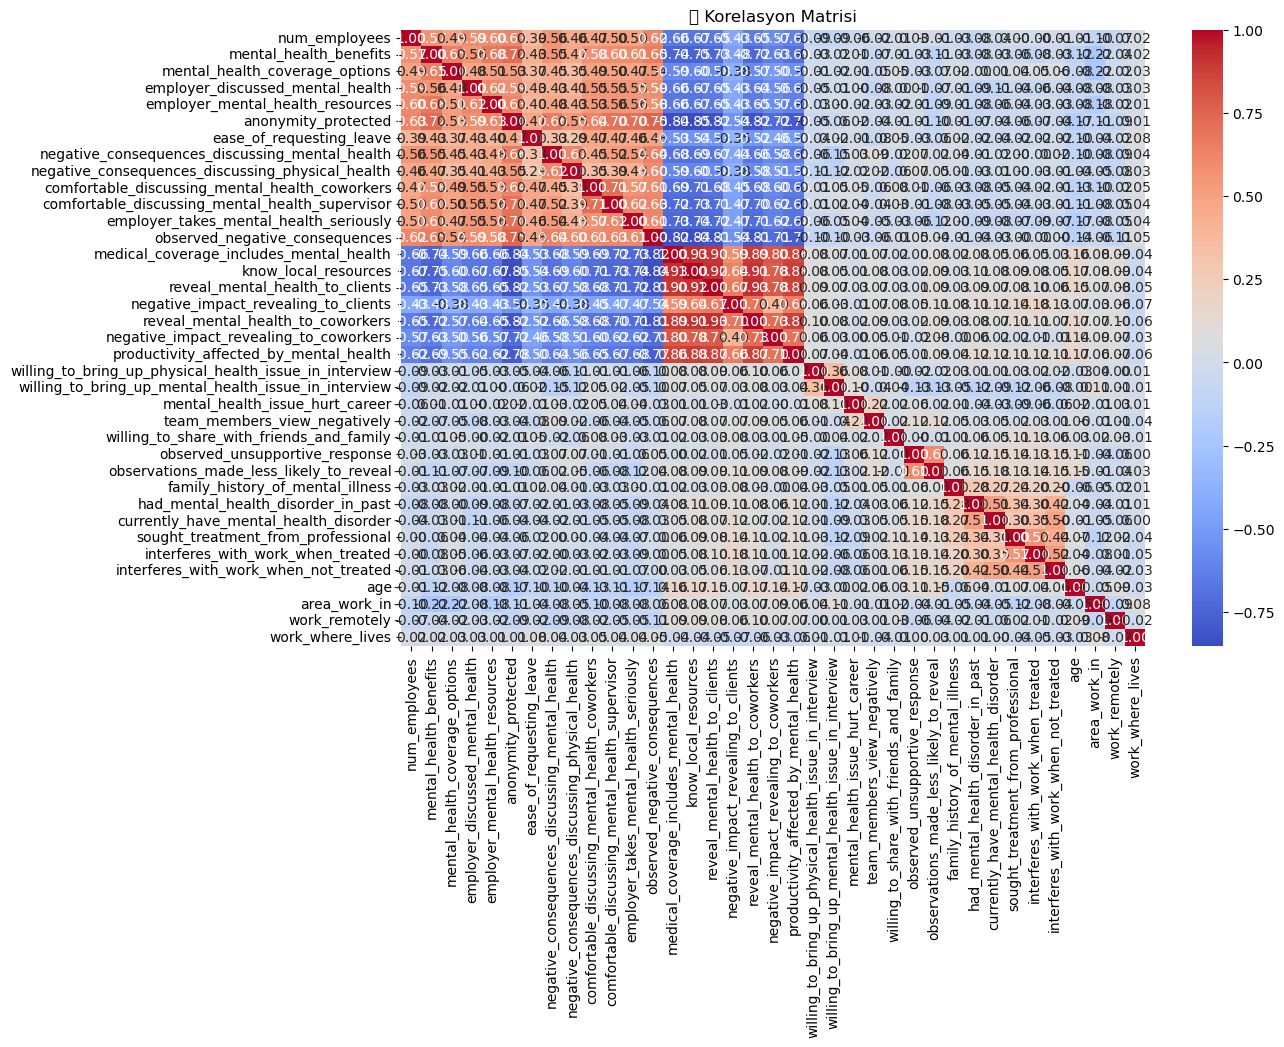

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


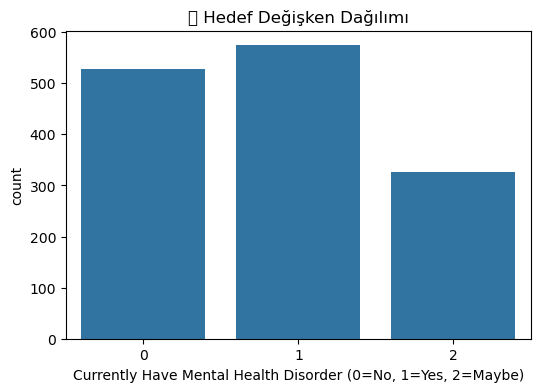


📈 Hedef ile Korelasyonlar:
 had_mental_health_disorder_in_past                        0.511962
interferes_with_work_when_not_treated                     0.498510
interferes_with_work_when_treated                         0.345194
sought_treatment_from_professional                        0.296225
family_history_of_mental_illness                          0.265662
observations_made_less_likely_to_reveal                   0.175448
observed_unsupportive_response                            0.148276
negative_impact_revealing_to_clients                      0.122806
productivity_affected_by_mental_health                    0.115614
know_local_resources                                      0.082652
reveal_mental_health_to_coworkers                         0.069644
reveal_mental_health_to_clients                           0.065743
medical_coverage_includes_mental_health                   0.050015
willing_to_share_with_friends_and_family                  0.047644
team_members_view_negatively     

C:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129517 (\N{COMPASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


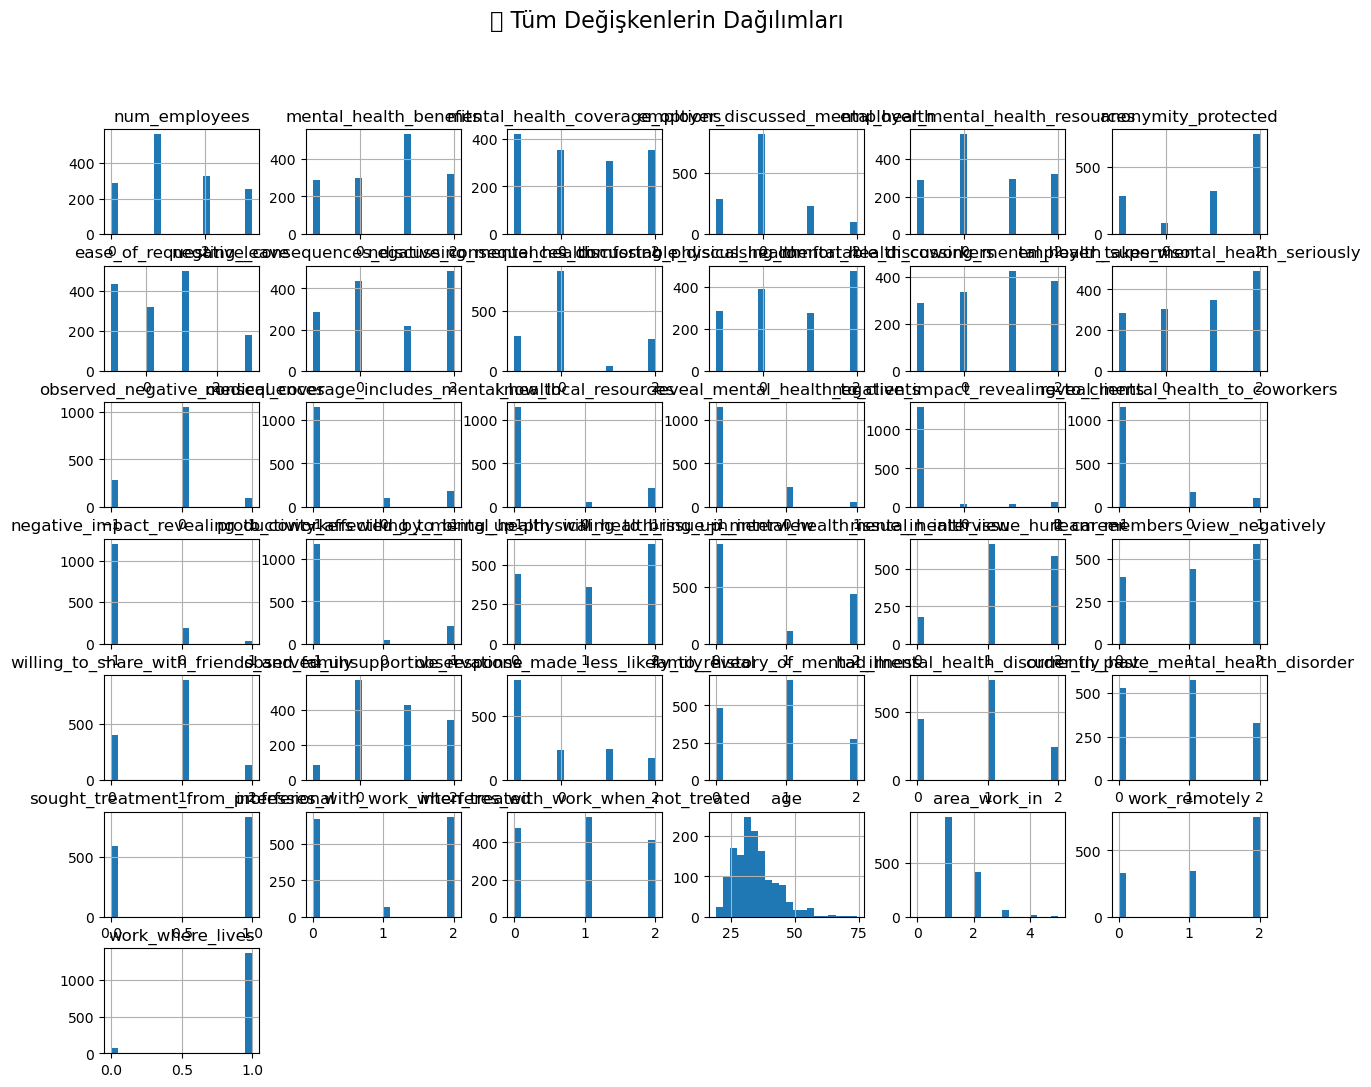

In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Veri yükleme
df = pd.read_csv('cleaned_data.csv')

print("🔎 İlk 5 Satır:\n", df.head())


print("\n📋 Genel Bilgi:\n")
print(df.info())


print("\n📊 Temel İstatistikler:\n")
print(df.describe())

print("\n🕵️ Eksik Veri Kontrolü:\n")
print(df.isnull().sum())


plt.figure(figsize=(12,8))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title("🔗 Korelasyon Matrisi")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x='currently_have_mental_health_disorder', data=df)
plt.title("🎯 Hedef Değişken Dağılımı")
plt.xlabel("Currently Have Mental Health Disorder (0=No, 1=Yes, 2=Maybe)")
plt.show()


target_corr = corr_matrix['currently_have_mental_health_disorder'].drop('currently_have_mental_health_disorder')
print("\n📈 Hedef ile Korelasyonlar:\n", target_corr.sort_values(ascending=False))


df.hist(bins=20, figsize=(15, 12))
plt.suptitle("🧭 Tüm Değişkenlerin Dağılımları", fontsize=16)
plt.show()


In [94]:
df.head()

num_employees  mental_health_benefits  mental_health_coverage_options  \
0              1                       0                              -1   
1              1                       0                               1   
2              1                       0                              -1   
3              0                      -1                              -1   
4              1                       1                               1   

   employer_discussed_mental_health  employer_mental_health_resources  \
0                                 0                                 0   
1                                 1                                 1   
2                                 0                                 0   
3                                -1                                -1   
4                                 0                                 0   

   anonymity_protected  ease_of_requesting_leave  \
0                    2                         1   
1                    1                         1   
2                    2                         3   
3                   -1                        -1   
4                    0                         3   

   negative_consequences_discussing_mental_health  \
0                                               0   
1                                               0   
2                                               2   
3                                              -1   
4                                               1   

   negative_consequences_discussing_physical_health  \
0                                                 0   
1                                                 0   
2                                                 0   
3                                                -1   
4                                                 2   

   comfortable_discussing_mental_health_coworkers  \
0                                               2   
1                                               2   
2                                               2   
3                                              -1   
4                                               2   

   comfortable_discussing_mental_health_supervisor  \
0                                                1   
1                                                1   
2                                                2   
3                                               -1   
4                                                0   

   employer_takes_mental_health_seriously  observed_negative_consequences  \
0                                       2                               0   
1                                       1                               0   
2                                       2                               0   
3                                      -1                              -1   
4                                       0                               0   

   medical_coverage_includes_mental_health  know_local_resources  \
0                                     -1.0                    -1   
1                                     -1.0                    -1   
2                                     -1.0                    -1   
3                                      1.0                     1   
4                                     -1.0                    -1   

   reveal_mental_health_to_clients  negative_impact_revealing_to_clients  \
0                               -1                                    -1   
1                               -1                                    -1   
2                               -1                                    -1   
3                                1                                     2   
4                               -1                                    -1   

   reveal_mental_health_to_coworkers  negative_impact_revealing_to_coworkers  \
0                                 -1                                      -1   
1          

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1428 entries, 0 to 1427
Data columns (total 37 columns):
 #   Column                                                  Non-Null Count  Dtype  
---  ------                                                  --------------  -----  
 0   num_employees                                           1428 non-null   int64  
 1   mental_health_benefits                                  1428 non-null   int64  
 2   mental_health_coverage_options                          1428 non-null   int64  
 3   employer_discussed_mental_health                        1428 non-null   int64  
 4   employer_mental_health_resources                        1428 non-null   int64  
 5   anonymity_protected                                     1428 non-null   int64  
 6   ease_of_requesting_leave                                1428 non-null   int64  
 7   negative_consequences_discussing_mental_health          1428 non-null   int64  
 8   negative_consequences_discussing_physi

In [96]:
df.describe()

num_employees  mental_health_benefits  mental_health_coverage_options  \
count    1428.000000             1428.000000                     1428.000000   
mean        1.385854                0.616246                        0.413866   
std         0.997683                1.041434                        1.149146   
min         0.000000               -1.000000                       -1.000000   
25%         1.000000                0.000000                       -1.000000   
50%         1.000000                1.000000                        0.000000   
75%         2.000000                1.000000                        1.000000   
max         3.000000                2.000000                        2.000000   

       employer_discussed_mental_health  employer_mental_health_resources  \
count                       1428.000000                       1428.000000   
mean                           0.102941                          0.450980   
std                            0.797626                          1.046089   
min                           -1.000000                         -1.000000   
25%                            0.000000                          0.000000   
50%                            0.000000                          0.000000   
75%                            0.000000                          1.000000   
max                            2.000000                          2.000000   

       anonymity_protected  ease_of_requesting_leave  \
count          1428.000000               1428.000000   
mean              1.058123                  0.418768   
std               1.172619                  1.265569   
min              -1.000000                 -1.000000   
25%               0.000000                 -1.000000   
50%               2.000000                  0.000000   
75%               2.000000                  1.000000   
max               2.000000                  3.000000   

       negative_consequences_discussing_mental_health  \
count                                     1428.000000   
mean                                         0.634454   
std                                          1.146331   
min                                         -1.000000   
25%                                          0.000000   
50%                                          0.000000   
75%                                          2.000000   
max                                          2.000000   

       negative_consequences_discussing_physical_health  \
count                                       1428.000000   
mean                                           0.203782   
std                                            0.968928   
min                                           -1.000000   
25%                                            0.000000   
50%                                            0.000000   
75%                                            0.000000   
max                                            2.000000   

       comfortable_discussing_mental_health_coworkers  \
count                                     1428.000000   
mean                                         0.659664   
std                                          1.137559   
min                                         -1.000000   
25%                                          0.000000   
50%                                          1.000000   
75%                                          2.000000   
max                                          2.000000   

       comfortable_discussing_mental_health_supervisor  \
count                                      1428.000000   
mean                                          0.630952   
std                                           1.080668   
min                                          -1.000000   
25%                                           0.000000   
50%                                           1.000000   
75%                                           2.000000   
max                                           2.000000   

    

In [97]:
df.columns

Index(['num_employees', 'mental_health_benefits',
       'mental_health_coverage_options', 'employer_discussed_mental_health',
       'employer_mental_health_resources', 'anonymity_protected',
       'ease_of_requesting_leave',
       'negative_consequences_discussing_mental_health',
       'negative_consequences_discussing_physical_health',
       'comfortable_discussing_mental_health_coworkers',
       'comfortable_discussing_mental_health_supervisor',
       'employer_takes_mental_health_seriously',
       'observed_negative_consequences',
       'medical_coverage_includes_mental_health', 'know_local_resources',
       'reveal_mental_health_to_clients',
       'negative_impact_revealing_to_clients',
       'reveal_mental_health_to_coworkers',
       'negative_impact_revealing_to_coworkers',
       'productivity_affected_by_mental_health',
       'willing_to_bring_up_physical_health_issue_in_interview',
       'willing_to_bring_up_mental_health_issue_in_interview',
       'mental_hea

### DATA DISTRIBUTION

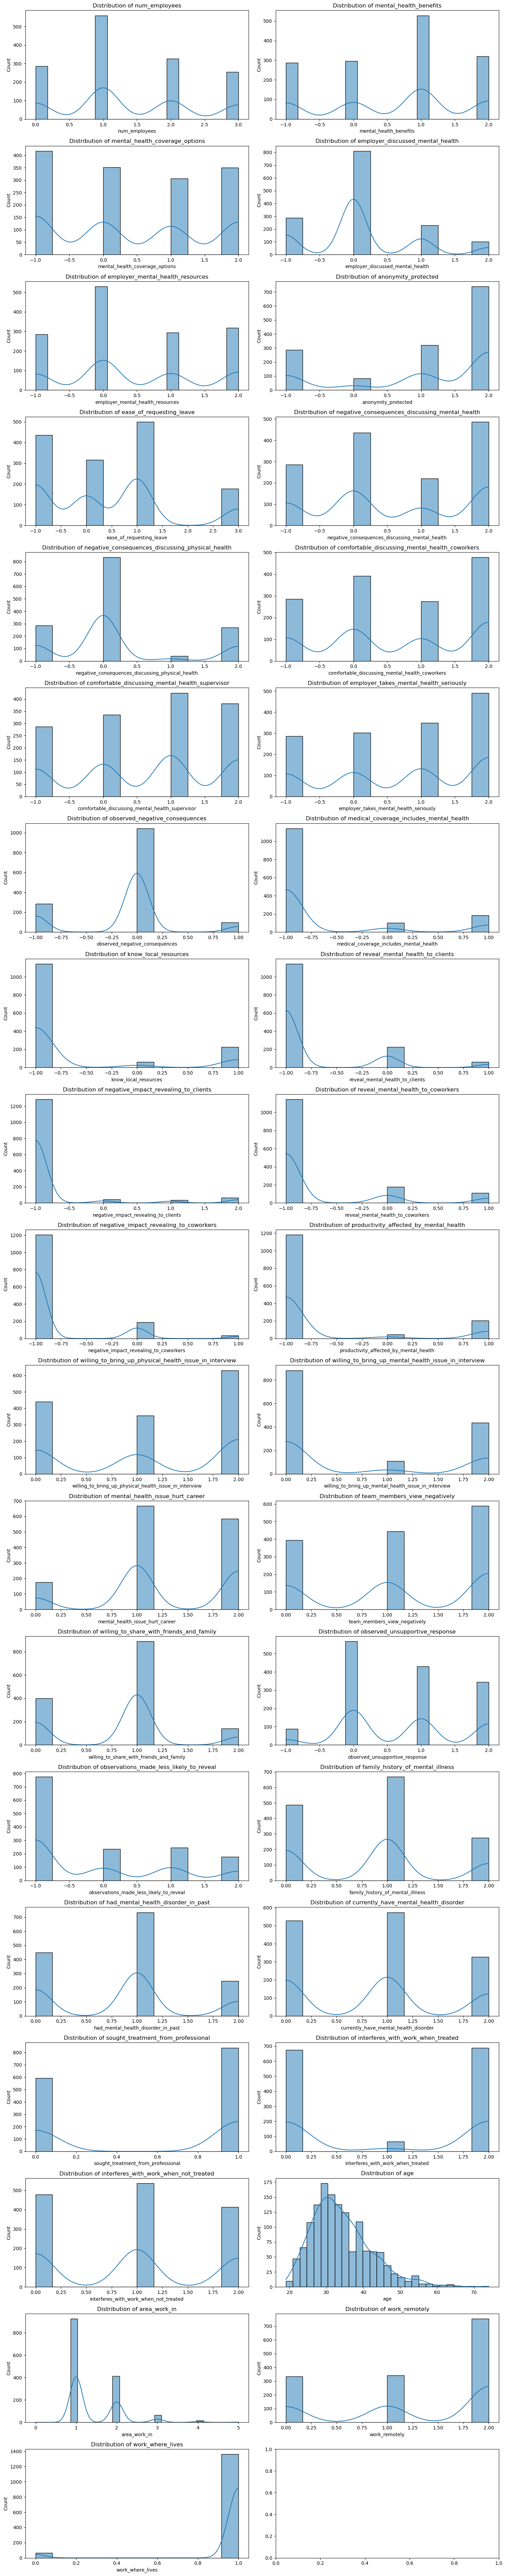

In [99]:

# Numerical values distribution visualization
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

fig, axes = plt.subplots(nrows=(len(numerical_cols)+1)//2, ncols=2, figsize=(15, 4*((len(numerical_cols)+1)//2)))
axes = axes.flatten()

for idx, col in enumerate(numerical_cols):
    sns.histplot(data=df, x=col, ax=axes[idx], kde=True)
    axes[idx].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

In [100]:
# Create a DataFrame to store the feature names and their percentages
feature_percentages = pd.DataFrame(columns=['Feature', 'Percentage'])

# Iterate through the columns in the DataFrame
for col in df.columns:
    if col in val_mapping:
        real_name = val_mapping[col]
    else:
        real_name = col
    
    # Calculate the percentage of each value in the column
    percentage = {}
    for value in df[col].unique():
        name = -1
        if col not in val_mapping:
            name = value
        else:
            for key in val_mapping[col]:
                if val_mapping[col][key] == value:
                    name = key
                    break
        name = name if name != -1 else 'Not given'
        percentage[name] = df[col].value_counts(normalize=True).get(value, 0) * 100

    # Sort the dictionary by the percentage
    percentage = dict(sorted(percentage.items(), key=lambda item: item[1], reverse=True))

    
    feature_percentages = pd.concat([feature_percentages, pd.DataFrame({'Feature': [col], 'Percentage': [percentage]})], ignore_index=True)

# Display the DataFrame
pd.set_option('display.max_colwidth', None)
feature_percentages

Feature  \
0                                            num_employees   
1                                   mental_health_benefits   
2                           mental_health_coverage_options   
3                         employer_discussed_mental_health   
4                         employer_mental_health_resources   
5                                      anonymity_protected   
6                                 ease_of_requesting_leave   
7           negative_consequences_discussing_mental_health   
8         negative_consequences_discussing_physical_health   
9           comfortable_discussing_mental_health_coworkers   
10         comfortable_discussing_mental_health_supervisor   
11                  employer_takes_mental_health_seriously   
12                          observed_negative_consequences   
13                 medical_coverage_includes_mental_health   
14                                    know_local_resources   
15                         reveal_mental_health_to_clients   
16                    negative_impact_revealing_to_clients   
17                       reveal_mental_health_to_coworkers   
18                  negative_impact_revealing_to_coworkers   
19                  productivity_affected_by_mental_health   
20  willing_to_bring_up_physical_health_issue_in_interview   
21    willing_to_bring_up_mental_health_issue_in_interview   
22                         mental_health_issue_hurt_career   
23                            team_members_view_negatively   
24                willing_to_share_with_friends_and_family   
25                          observed_unsupportive_response   
26                 observations_made_less_likely_to_reveal   
27                        family_history_of_mental_illness   
28                      had_mental_health_disorder_in_past   
29                   currently_have_mental_health_disorder   
30                      sought_treatment_from_professional   
31                       interferes_with_work_when_treated   
32                   interferes_with_work_when_not_treated   
33                                                     age   
34                                            area_work_in   
35                                           work_remotely   
36                                        work_where_lives   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             Percentage  
0                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   

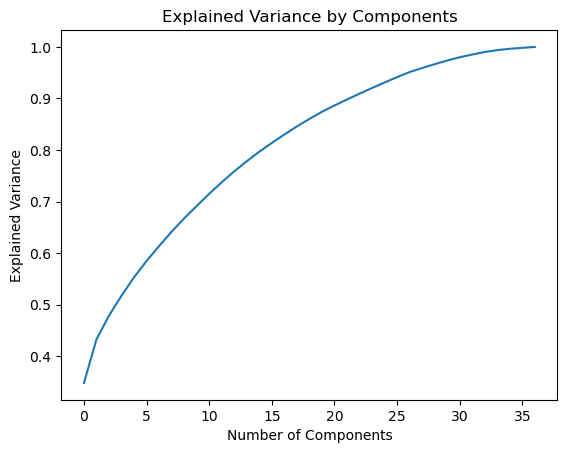

In [101]:
# apply PCA to the dataset
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import numpy as np

df = df.dropna()
df = pd.get_dummies(df, drop_first=True)
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

pca = PCA()
pca.fit(df_scaled)
exp_var_cumul = np.cumsum(pca.explained_variance_ratio_)
plt.plot(exp_var_cumul)
plt.xlabel('Number of Components')
plt.ylabel('Explained Variance')
plt.title('Explained Variance by Components')
plt.show()

### CORRELATION

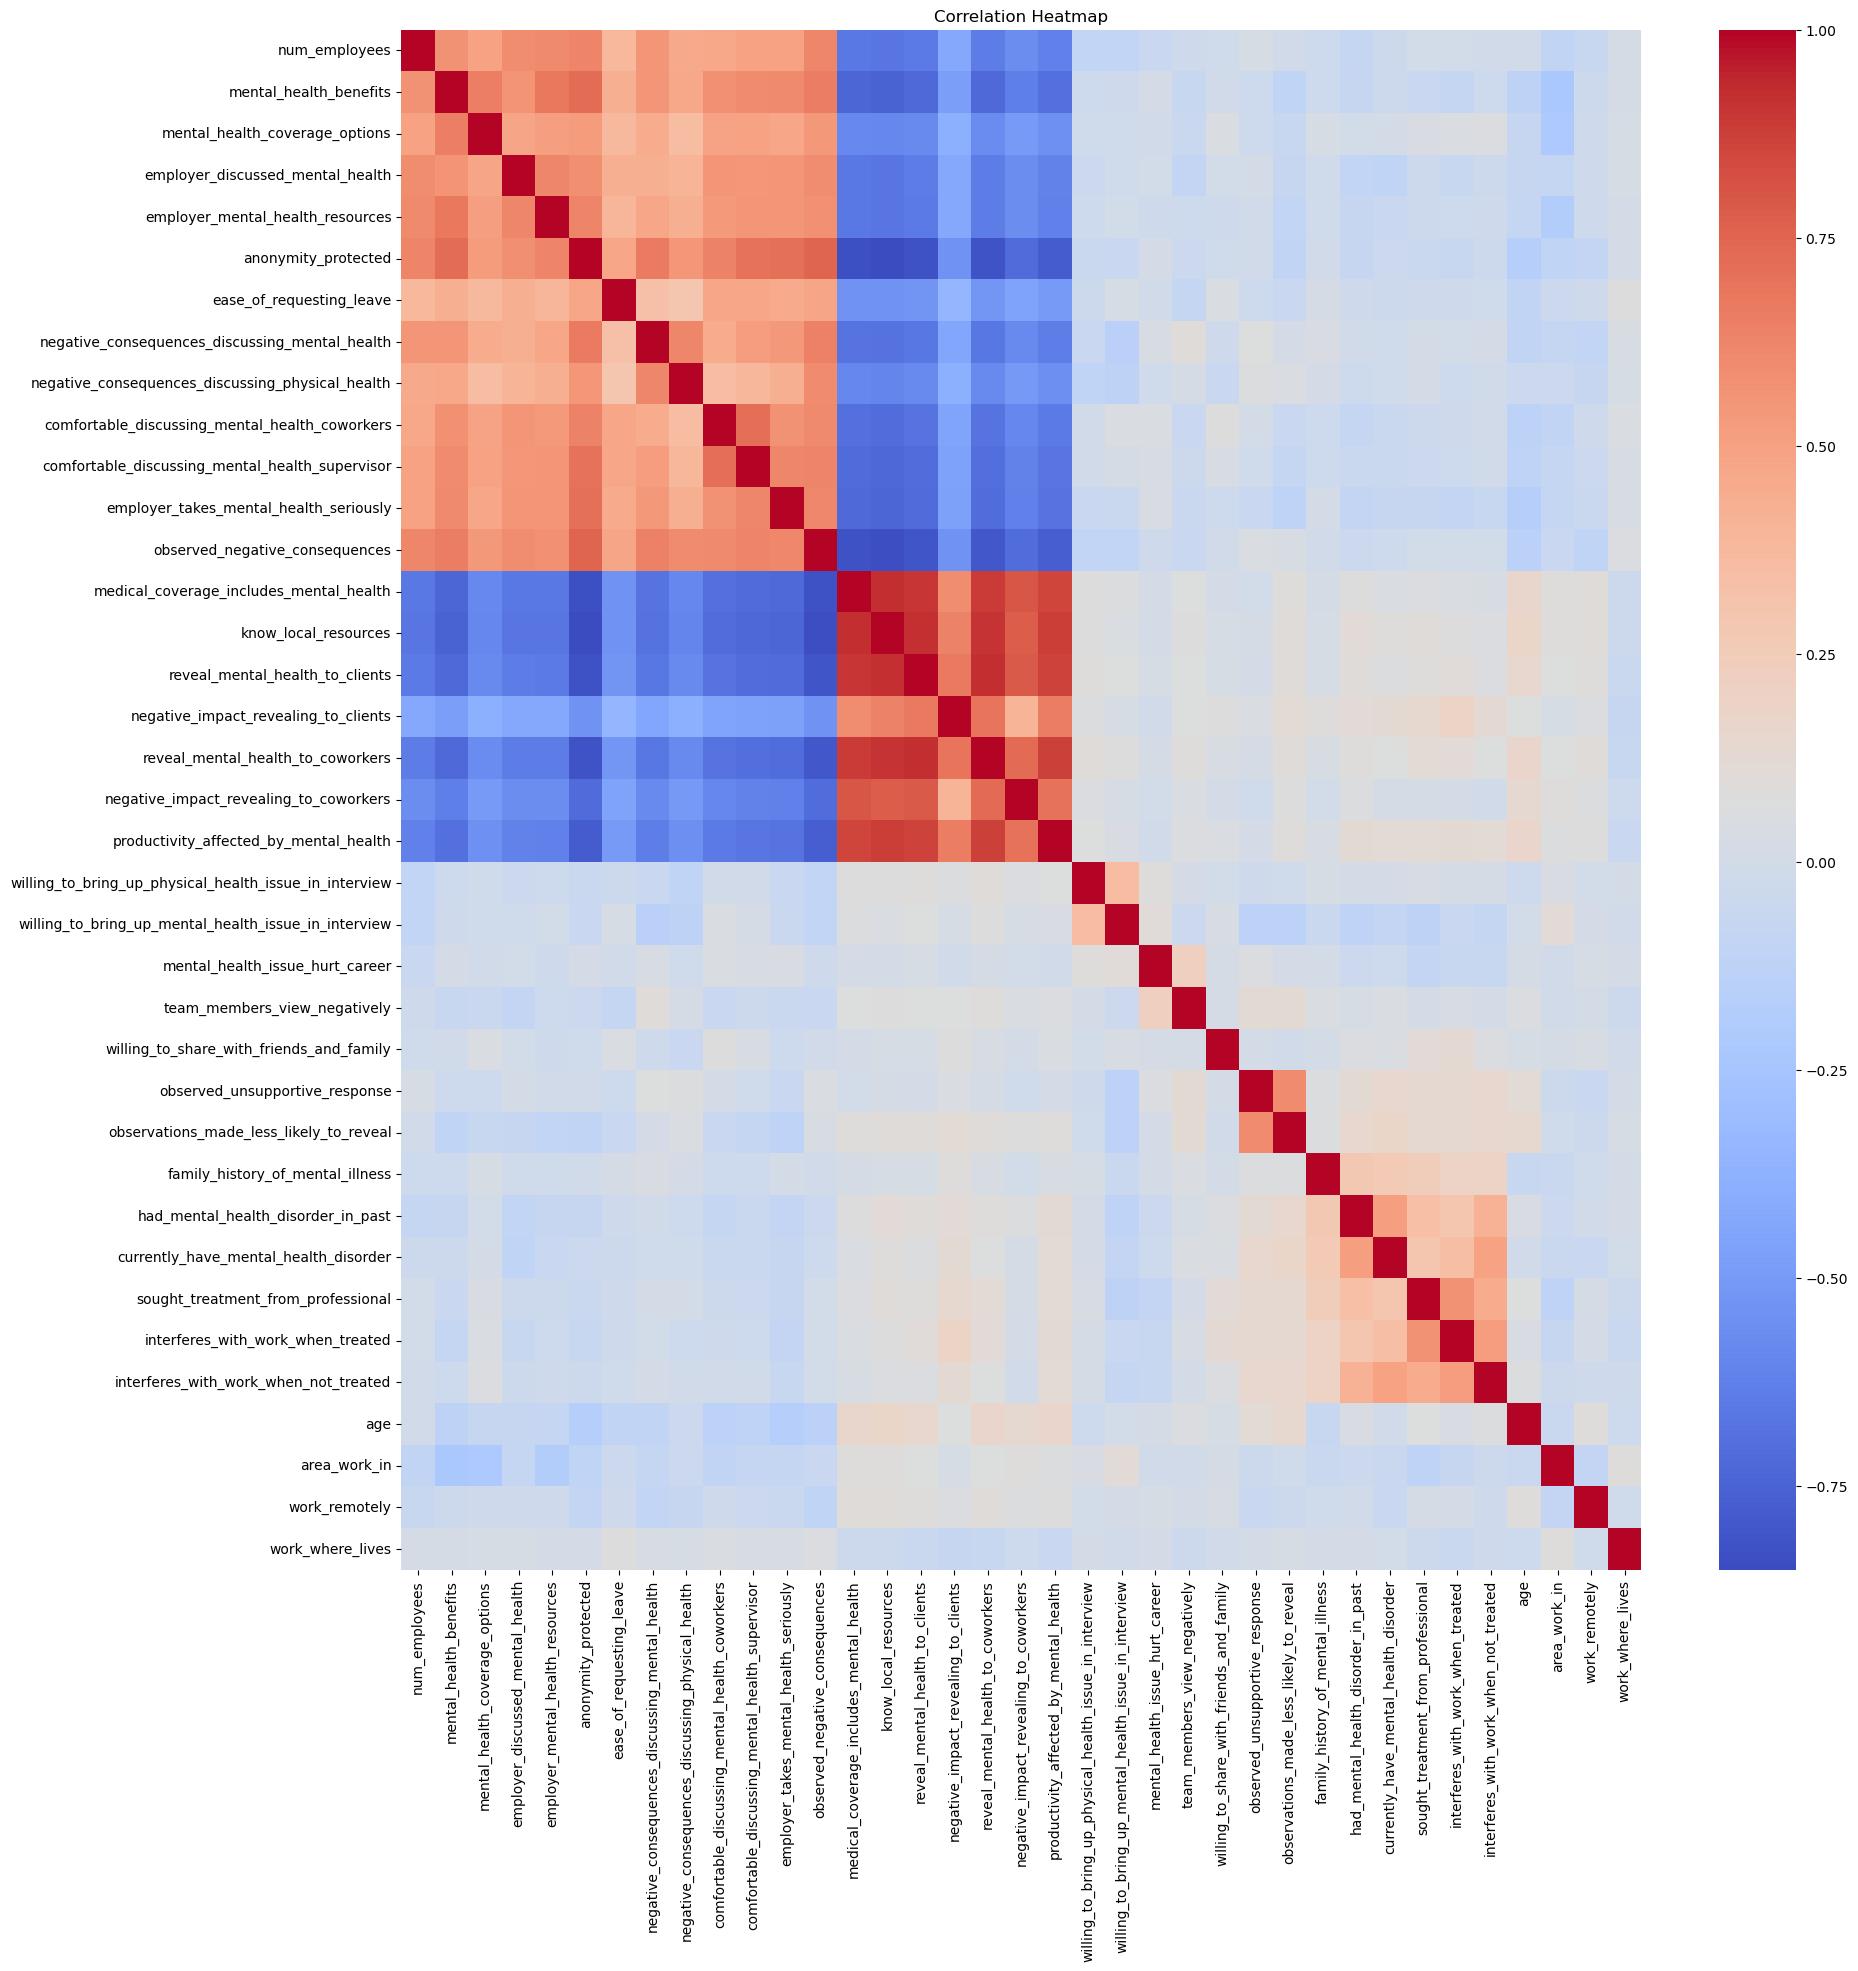

In [103]:
# check correlation between features
correlation = df.corr()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

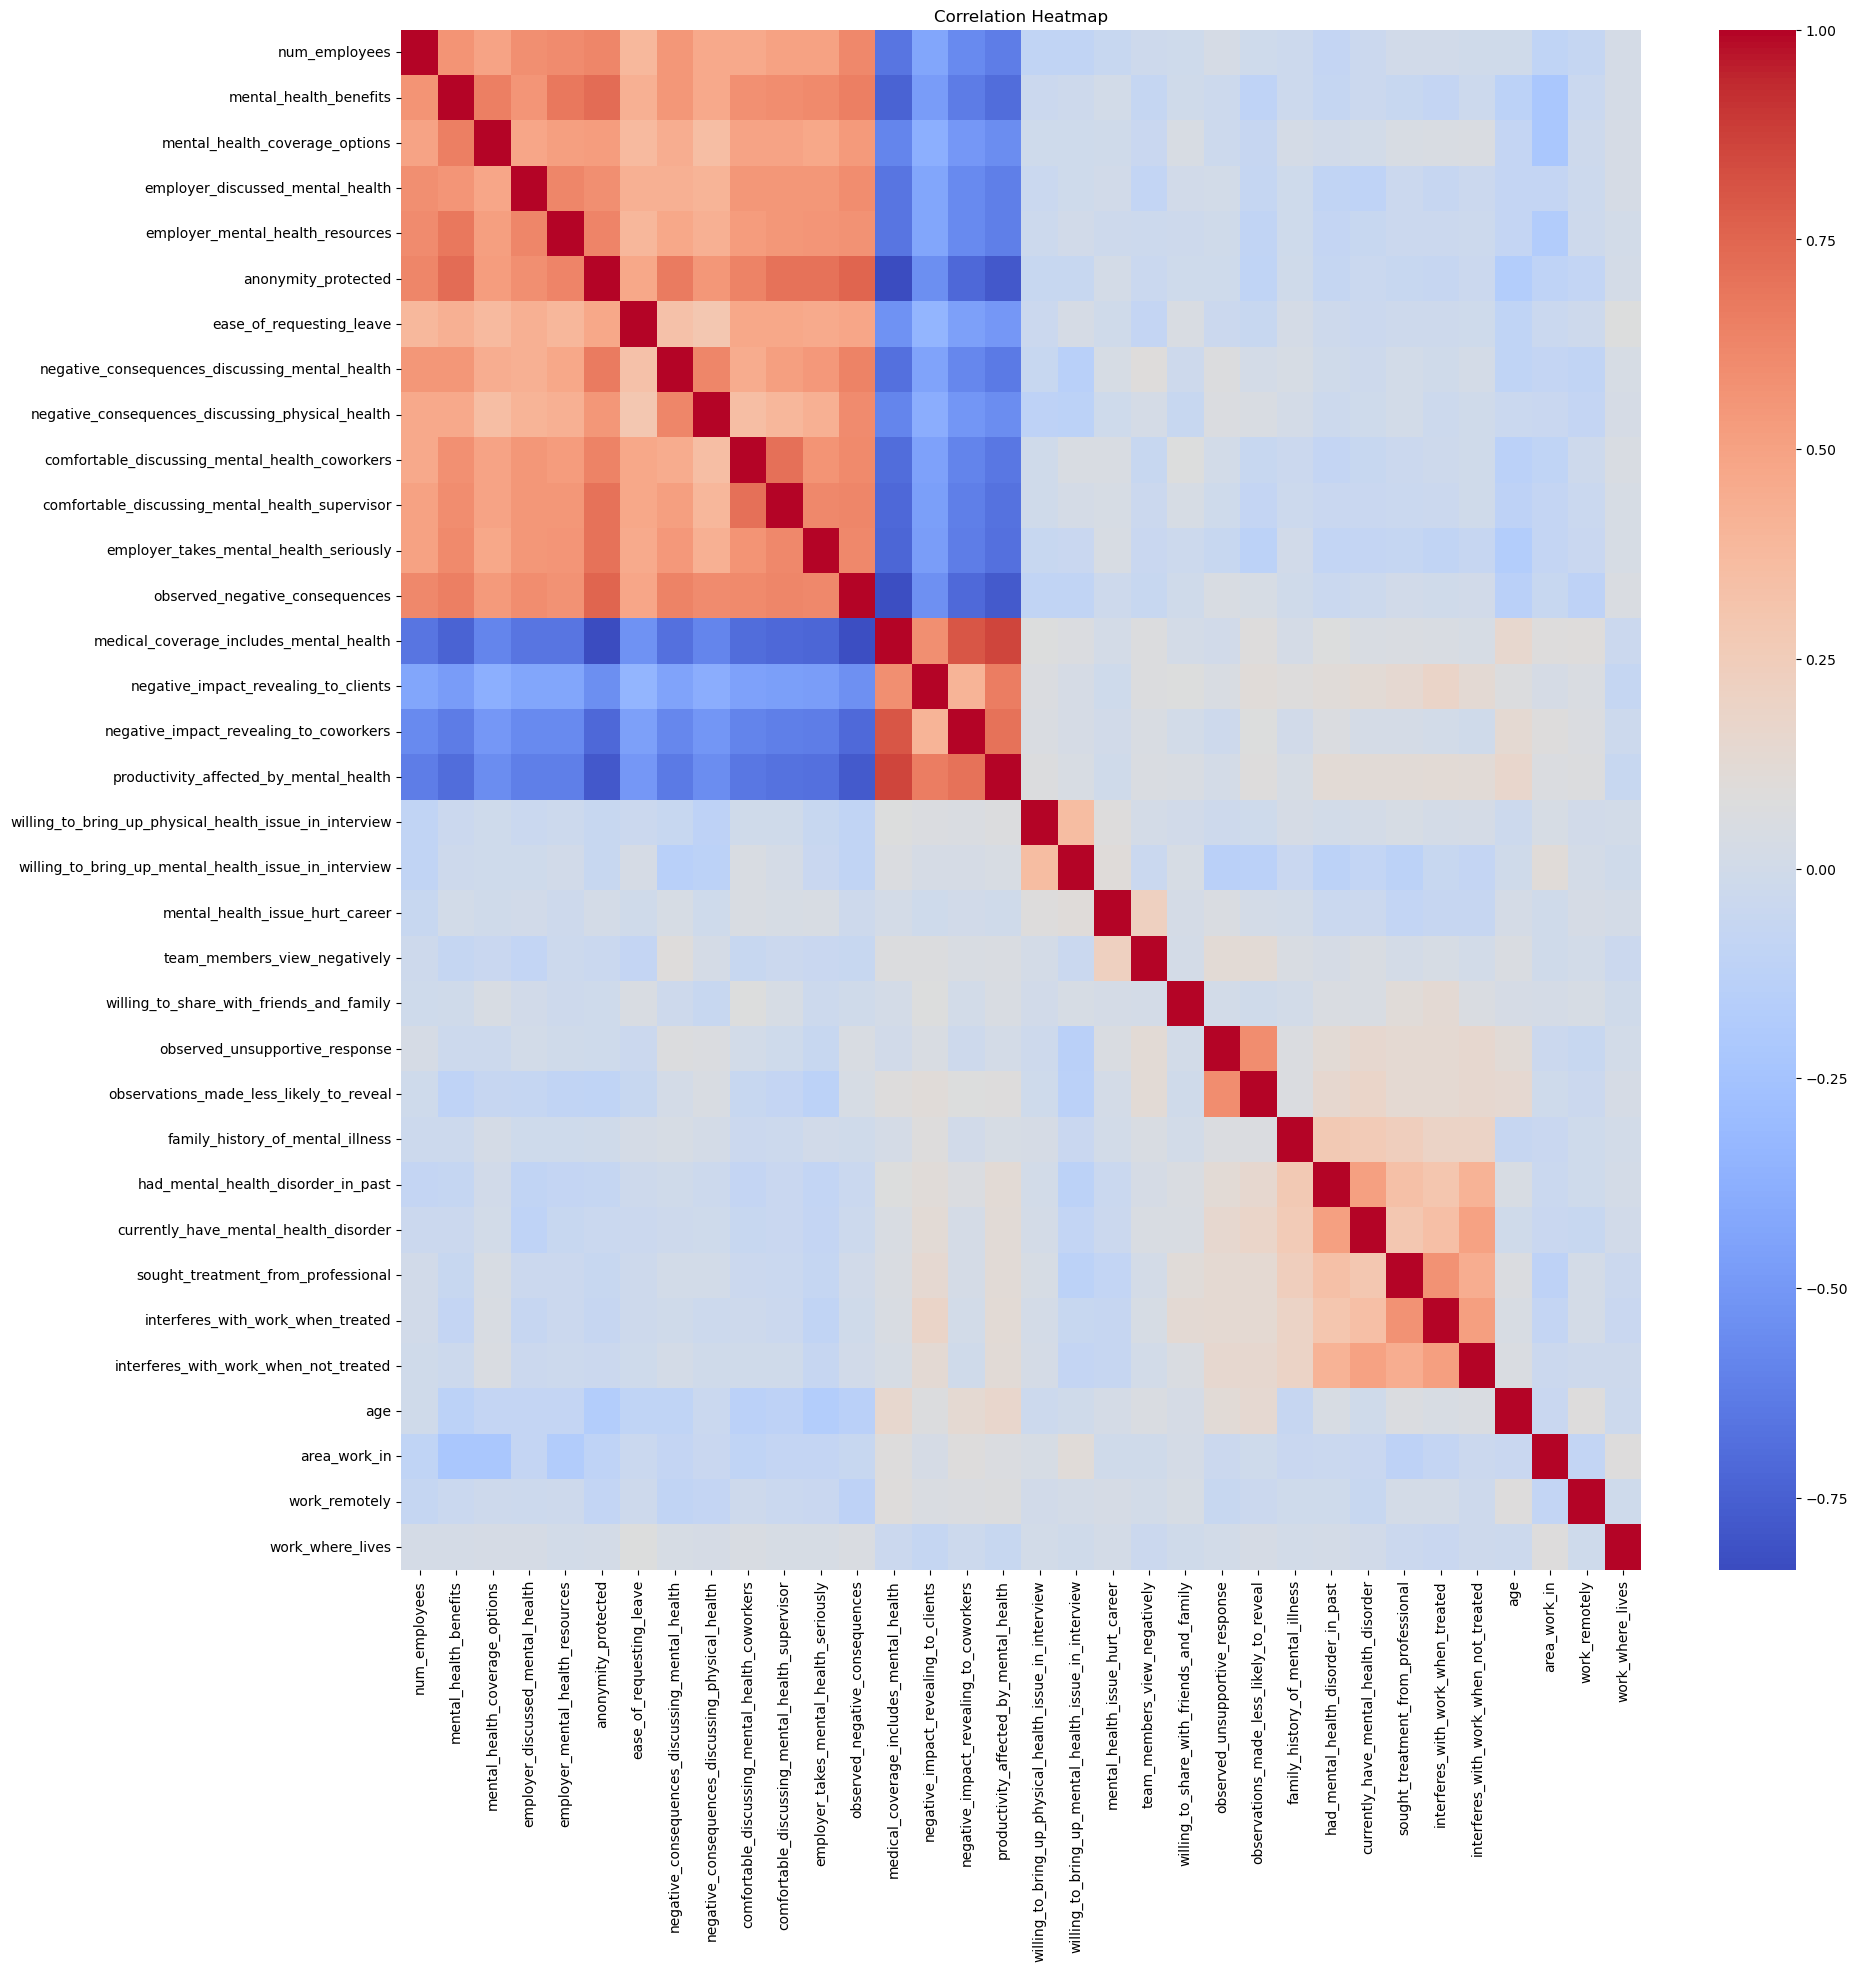

In [104]:
# remove highly correlated features

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def remove_correlated_features(df, threshold):
    corr_matrix = df.corr().abs()
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
    return df.drop(to_drop, axis=1)

df = remove_correlated_features(df, 0.9)
correlation = df.corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


Explained variance ratio: [0.30099783 0.09197566]
Features in order of importance for PC1:
medical_coverage_includes_mental_health: 0.29278239942502754
productivity_affected_by_mental_health: 0.27957811830274953
anonymity_protected: 0.2762883013671366
observed_negative_consequences: 0.267416501393385
mental_health_benefits: 0.2558232532749534
negative_impact_revealing_to_coworkers: 0.2538540890883482
comfortable_discussing_mental_health_supervisor: 0.24503290975892367
employer_takes_mental_health_seriously: 0.24450123534011683
employer_mental_health_resources: 0.23587615800344744
comfortable_discussing_mental_health_coworkers: 0.23535420299008436
num_employees: 0.23015704609336576
employer_discussed_mental_health: 0.2301014444185198
negative_consequences_discussing_mental_health: 0.22804501781510048
mental_health_coverage_options: 0.2101635494125343
negative_impact_revealing_to_clients: 0.20203209973503083
negative_consequences_discussing_physical_health: 0.1988857306927419
ease_of_req

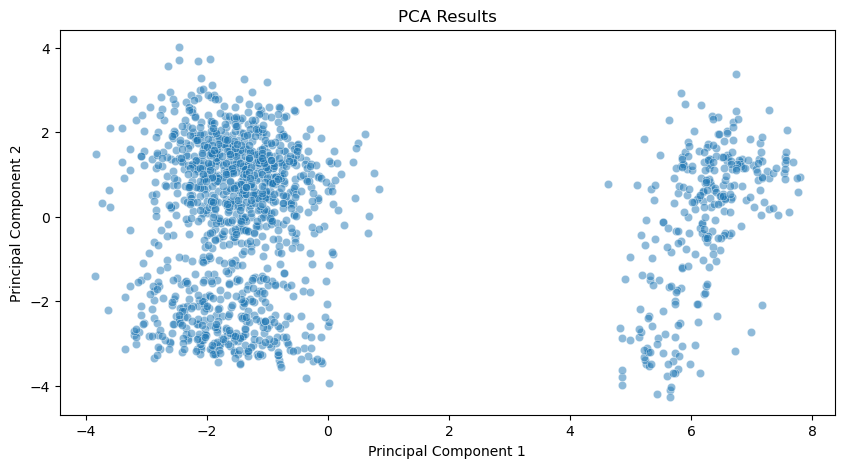

In [105]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'data'
# Standardize the data before applying PCA
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Apply PCA
pca = PCA(n_components=2)  # Reduce to 2 dimensions for visualization
pca_result = pca.fit_transform(scaled_data)

# Calculate explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print(f"Explained variance ratio: {explained_variance_ratio}")

# Calculate PCA loadings
loadings = pca.components_

# Calculate the importance of each feature for each principal component
for i, pc in enumerate(loadings):
    importance = np.abs(pc)
    importance_indices = np.argsort(importance)[::-1]

    # Print the features in order of importance for each principal component
    print(f"Features in order of importance for PC{i+1}:")
    for j in importance_indices:
        print(f"{df.columns[j]}: {importance[j]}")
    print("\n")

# Create a DataFrame with the PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])

# Plot the PCA results
plt.figure(figsize=(10, 5))
sns.scatterplot(x='PC1', y='PC2', data=pca_df, alpha=0.5)
plt.title('PCA Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

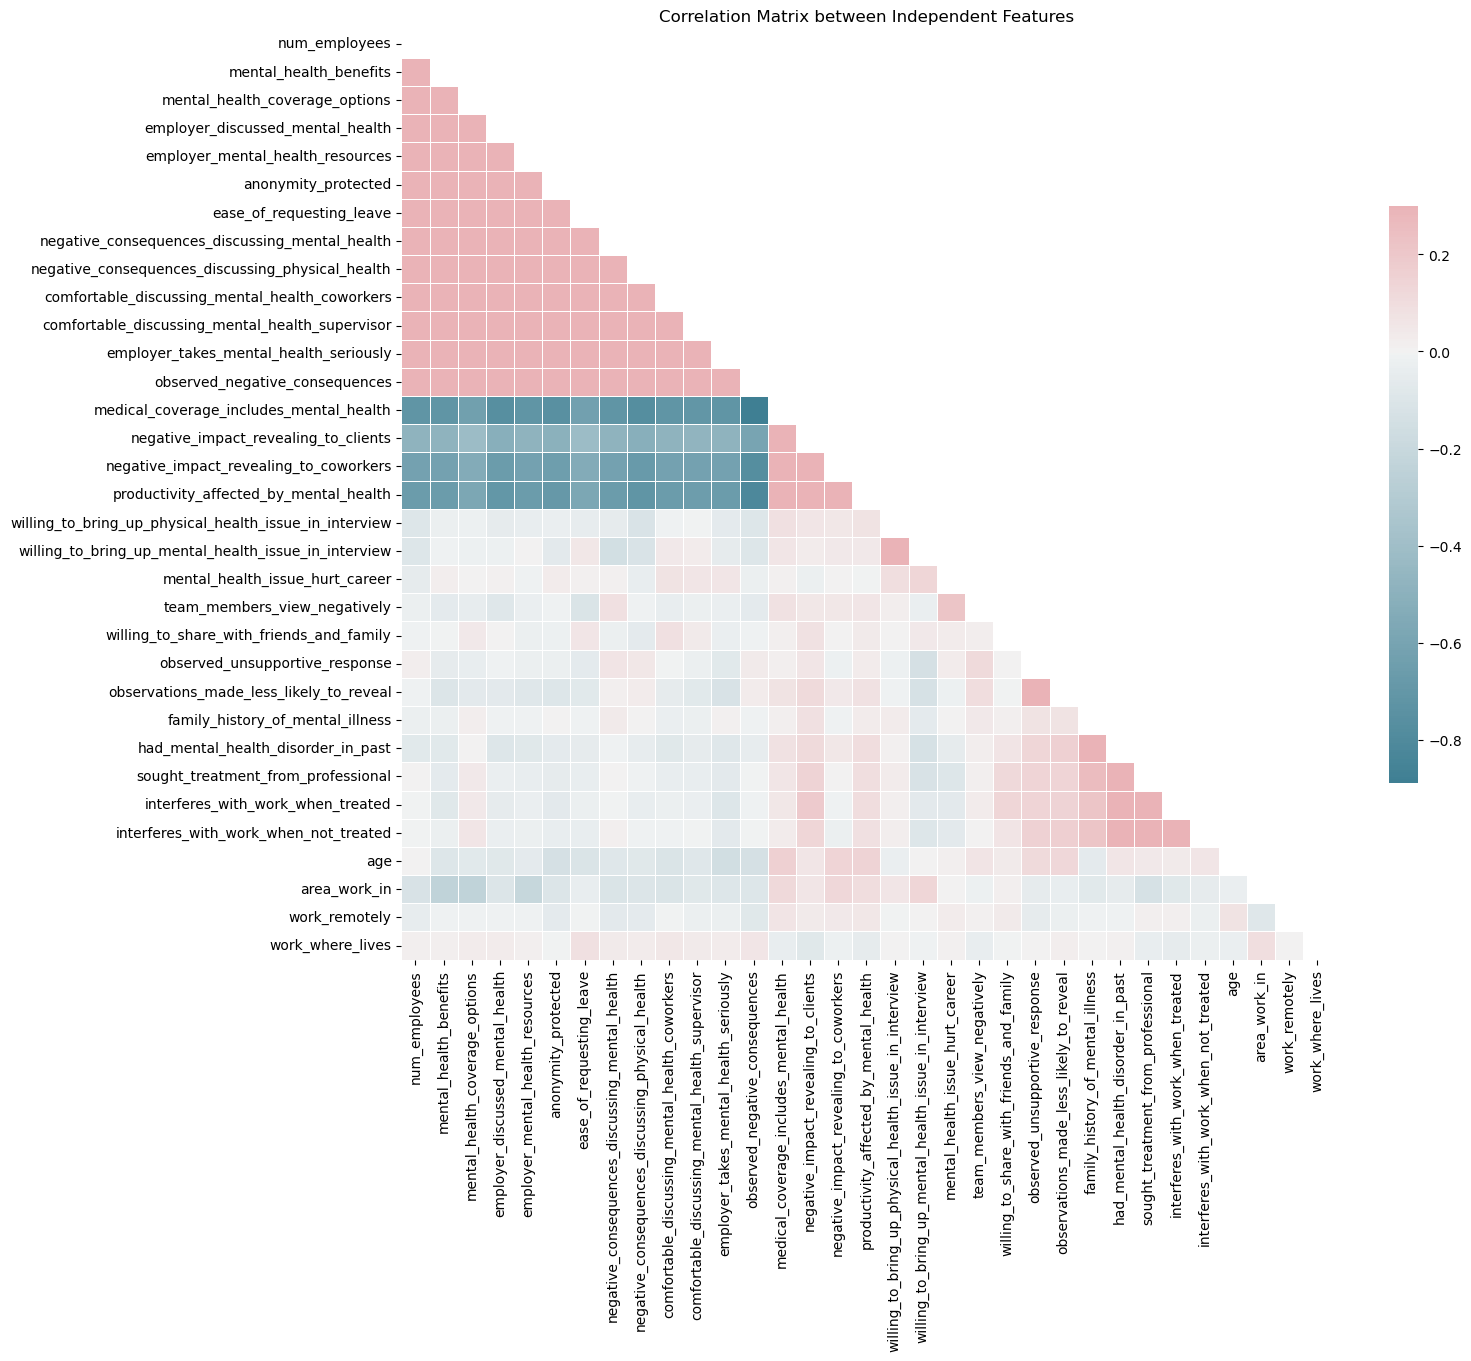

In [106]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Spearman korelasyonu (sıralı korelasyonlar için daha anlamlı olabilir)
corr = df.drop(['currently_have_mental_health_disorder'], axis=1).corr(method='spearman')

# Üst üçgeni maskele
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Grafik çizimi
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, square=True,
            linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Correlation Matrix between Independent Features")
plt.show()


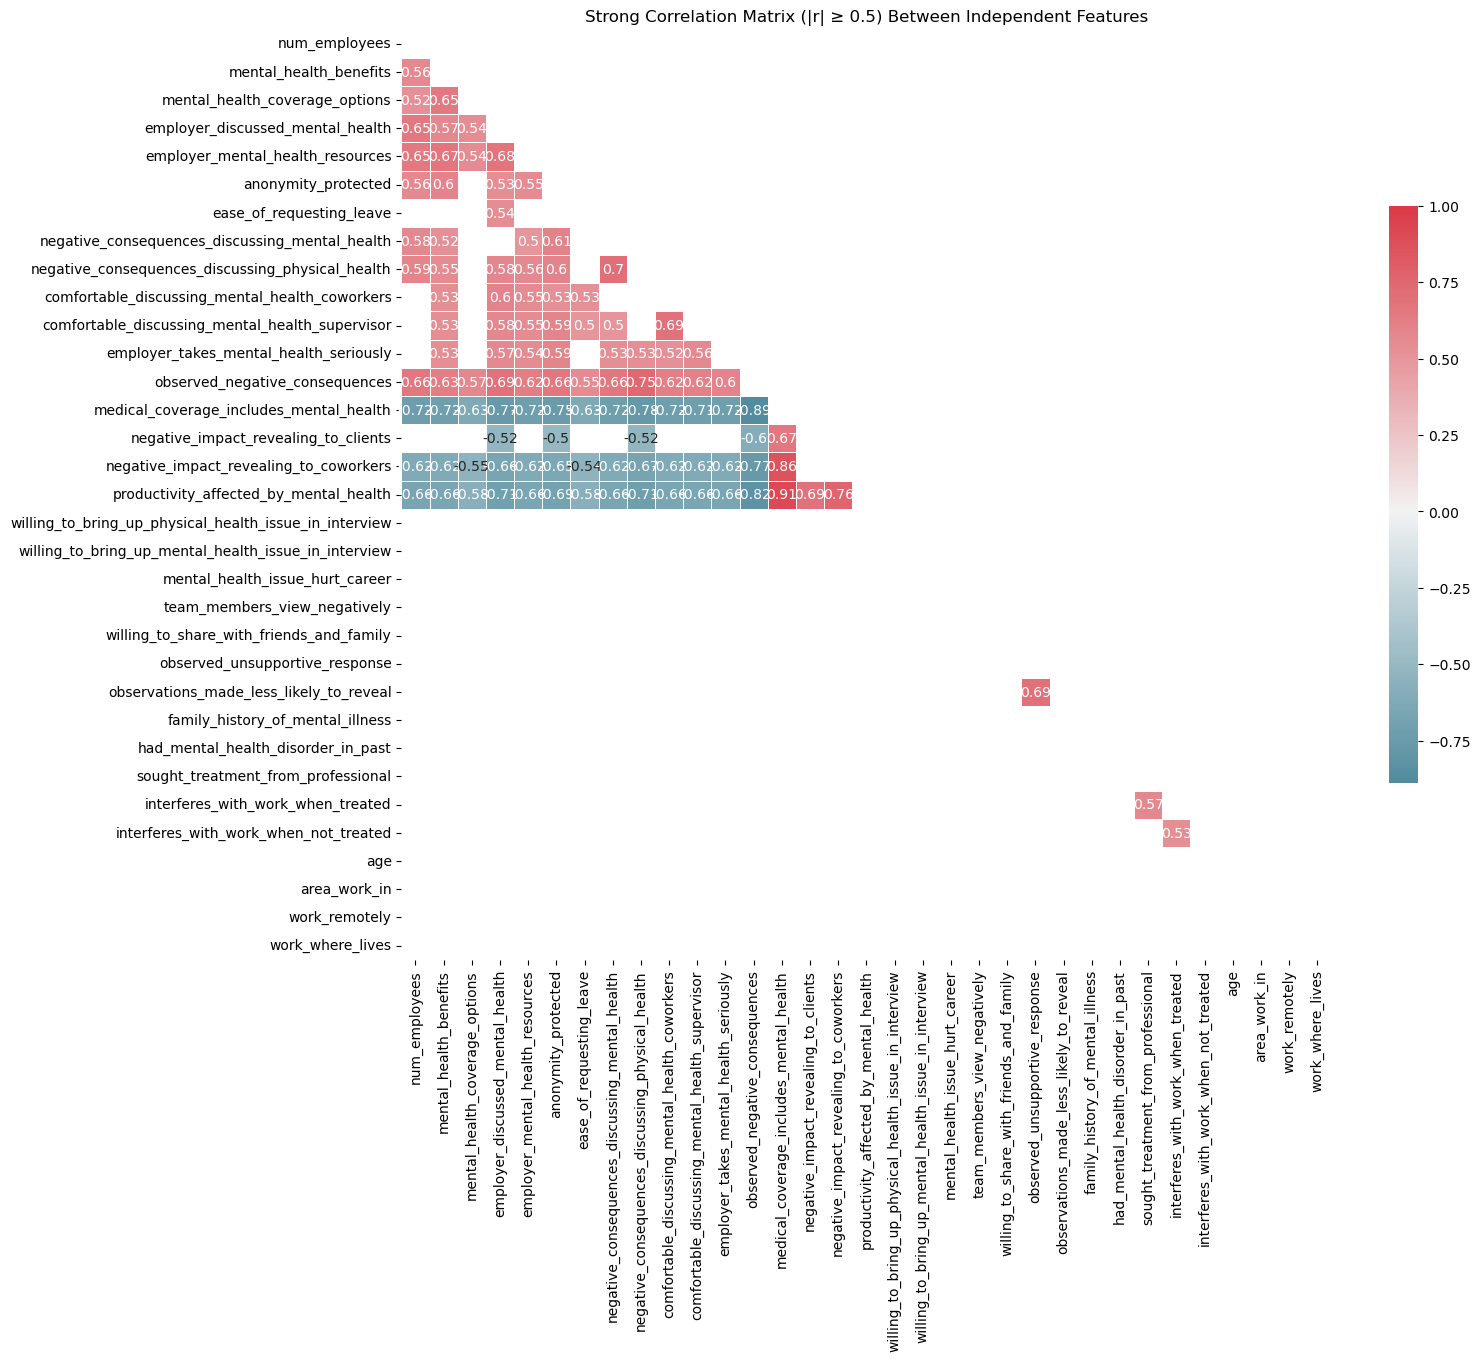

In [107]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Spearman korelasyon matrisi (hedef değişken hariç)
corr = df.drop(['currently_have_mental_health_disorder'], axis=1).corr(method='spearman')

# ±0.5 üzerindeki korelasyonları tut, diğerlerini NaN yap
filtered_corr = corr.where((corr >= 0.5) | (corr <= -0.5))
np.fill_diagonal(filtered_corr.values, np.nan)  # 1.0 olan kendiyle olan korelasyonları da NaN yap

# Üst üçgeni maskele
mask = np.zeros_like(filtered_corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Grafik çizimi
f, ax = plt.subplots(figsize=(15, 15))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(filtered_corr, mask=mask, cmap=cmap, vmax=1, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.title("Strong Correlation Matrix (|r| ≥ 0.5) Between Independent Features")
plt.show()


<Axes: xlabel='num_employees', ylabel='age'>

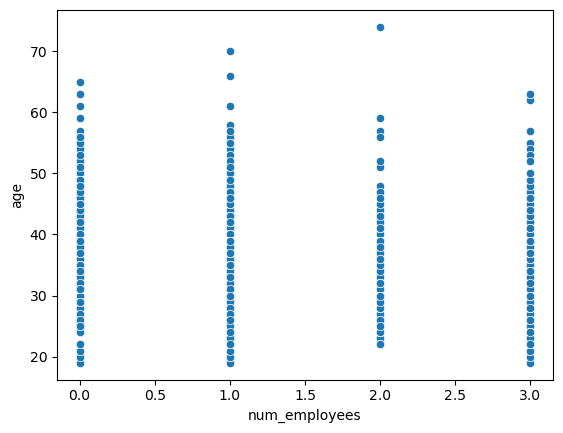

In [108]:
# Scatter plot to how relation
sns.scatterplot(x="num_employees", y="age", data=df)

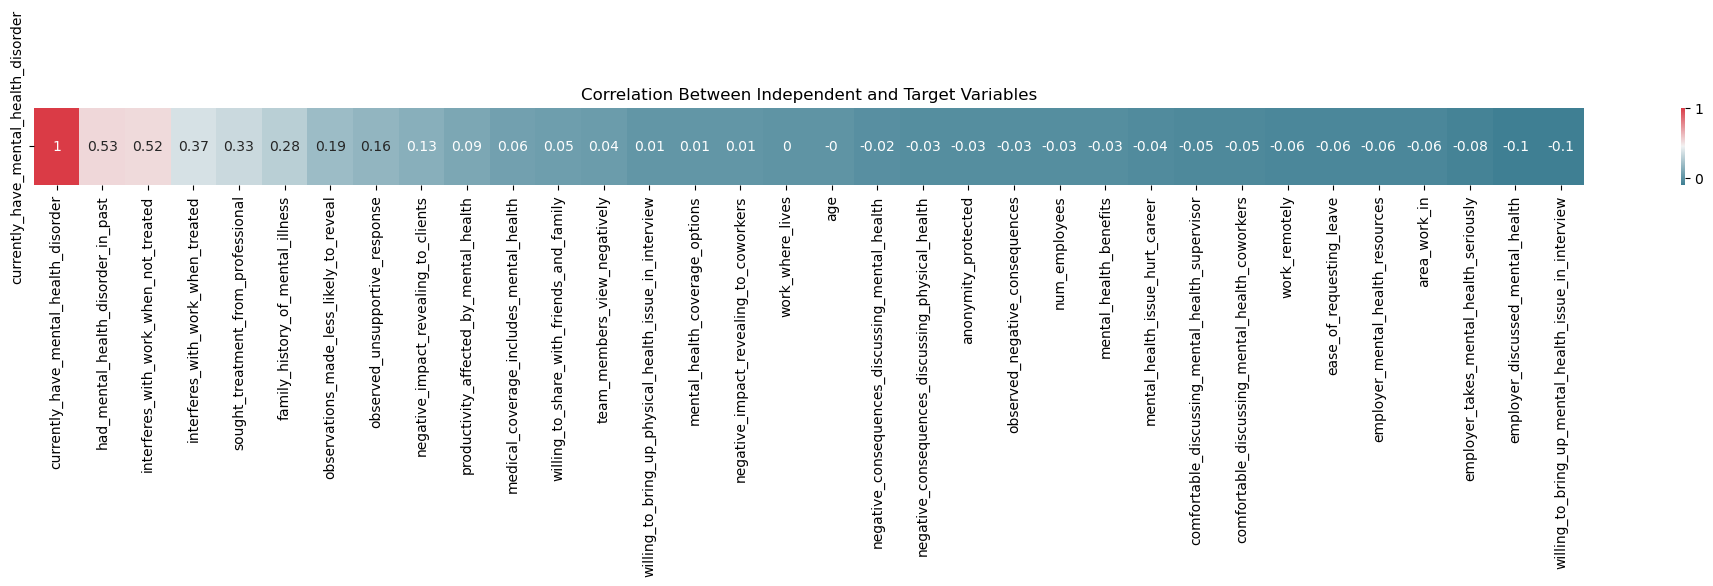

In [109]:
# Correlation between response and predictors
f, ax = plt.subplots(figsize=(25, 1))
corr = df.corr(method ='spearman')

treatment = corr.sort_values(by=['currently_have_mental_health_disorder'], ascending=False).head(1).T
treatment = treatment.sort_values(by=['currently_have_mental_health_disorder'],ascending=False).T
sns.heatmap(round(treatment,2), cmap=cmap, annot=True)
plt.title("Correlation Between Independent and Target Variables")
plt.show()

In [110]:
# scaling the values
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df.drop(['currently_have_mental_health_disorder'], axis=1))
X_scaled=scaler.transform(df.drop(['currently_have_mental_health_disorder'], axis=1))

In [111]:
# performing PCA
from sklearn.decomposition import PCA
pca_2=PCA(n_components=28)
pca_2.fit(X_scaled)
pcas_stdsc=pca_2.transform(X_scaled)

In [112]:
print(f'First 2 components of PCA without standardization are:{pcas_stdsc}')

First 2 components of PCA without standardization are:[[-0.63352179 -2.81982545 -0.97927503 ... -0.0648613  -0.58709312
  -0.44074871]
 [-1.14402991  1.19081155 -2.37633855 ...  0.1558247  -0.04610452
  -0.5295328 ]
 [-1.43451573  0.22546188  1.70946709 ...  0.54084066  0.48005007
  -0.37286993]
 ...
 [-2.79711404  2.48830306  0.339185   ...  0.11915033  0.02768761
   0.09162209]
 [-1.89535632  1.566654   -0.0639302  ... -0.03280679  0.60974675
  -0.59009104]
 [-1.45464719  0.02869251  0.31806768 ...  0.3274561   0.23801067
   0.1866356 ]]


In [113]:
print(f'Variances proportion of the First 2 principal components with standardization are: { pca_2.explained_variance_ratio_*100}')

Variances proportion of the First 2 principal components with standardization are: [30.99090918  8.36615037  5.1130515   4.34394887  3.86989292  3.53243942
  3.23751216  3.08520975  2.89858291  2.67582774  2.52623776  2.47310684
  2.24061555  2.16456317  1.98047807  1.87499673  1.80598953  1.76269985
  1.62687641  1.49155325  1.31643484  1.29598734  1.21244998  1.18745469
  1.15641098  1.1117786   0.88939623  0.83278504]


In [114]:
sum(pca_2.explained_variance_ratio_*100)

97.06333969834061

In [115]:
df.shape

(1428, 34)

In [116]:
sums=[]
for i in range(1,34):
    pca_2=PCA(n_components=i)
    pca_2.fit(X_scaled)
    pcas_stdsc=pca_2.transform(X_scaled)
    sums.append(sum(pca_2.explained_variance_ratio_*100))

Text(0, 0.5, 'Sum of Variance in Percentage')

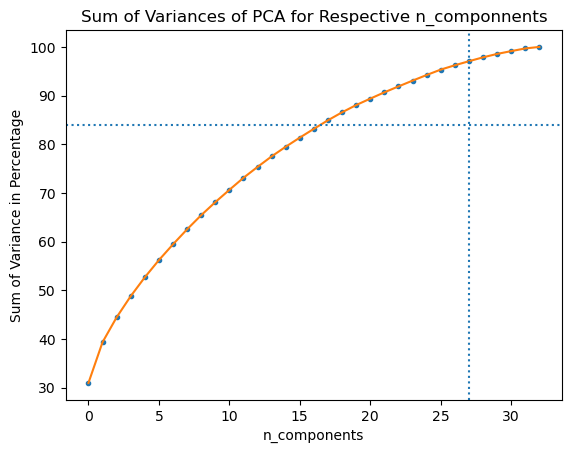

In [117]:
# plotting the PCA graph for number of components and the percentage retained
plt.plot(sums,'.')
plt.plot(sums)
plt.axvline(x=27,linestyle = ':')
plt.axhline(y=83.86562893420613,linestyle = ':')
plt.title("Sum of Variances of PCA for Respective n_componnents")
plt.xlabel("n_components")
plt.ylabel("Sum of Variance in Percentage")

### CLUSTER

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

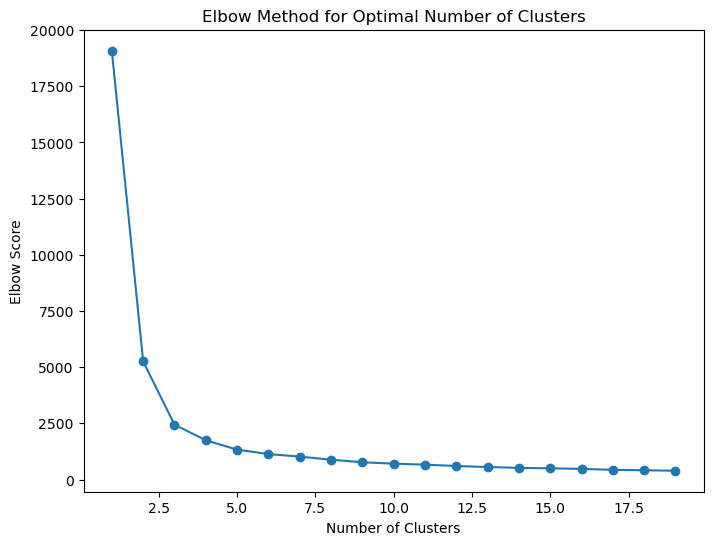

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


In [119]:
from sklearn.cluster import KMeans

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 20):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve
plt.figure(figsize=(8, 6))
plt.plot(range(1, 20), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('Elbow Score')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

# Apply K-Means with the chosen number of clusters (e.g., 3)
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(pca_df)

# Add the cluster labels to the PCA DataFrame
pca_df['Cluster'] = clusters

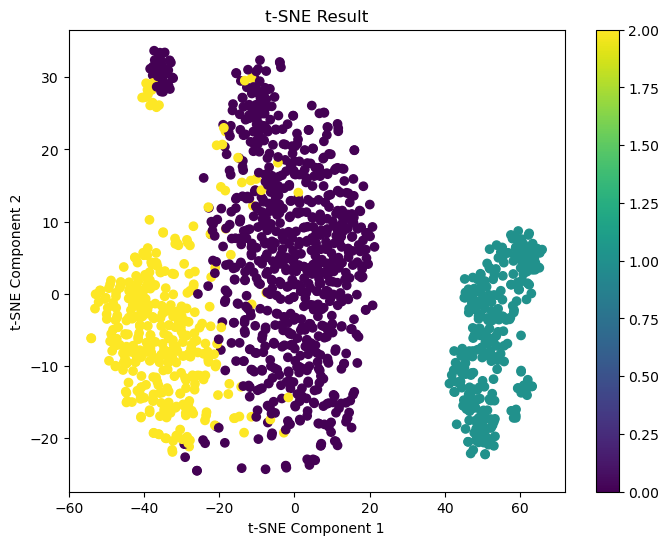

In [120]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_result = tsne.fit_transform(scaled_data)

# Create a DataFrame with the t-SNE results
tsne_df = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])
tsne_df['Cluster'] = clusters

# Visualize the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(tsne_df['TSNE1'], tsne_df['TSNE2'], c=tsne_df['Cluster'], cmap='viridis')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.title('t-SNE Result')
plt.colorbar()
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


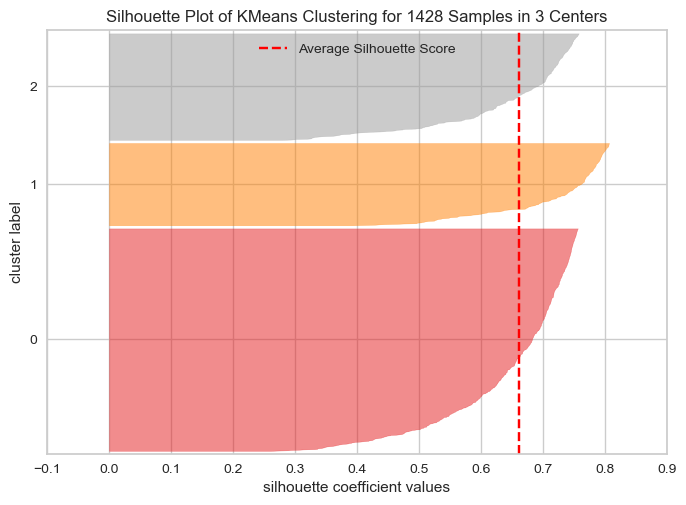

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 1428 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [121]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

# KMeans modelini PCA DataFrame ile eğitiyoruz
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(pca_df)

# Silhouette Visualizer oluşturuluyor
visualizer = SilhouetteVisualizer(kmeans)

# Görselleştiriciye aynı veri veriliyor (özellik isimleri uyuşacak)
visualizer.fit(pca_df)

# Grafik gösteriliyor
visualizer.show()


In [122]:
from sklearn.metrics import silhouette_score, davies_bouldin_score, calinski_harabasz_score

#Evaluate the obtained clusters

# Silhouette Score
silhouette_avg = silhouette_score(pca_result, clusters)
print(f'Silhouette Score: {silhouette_avg}')
print("The silhouette score ranges from -1 to 1. A score close to 1 indicates that the data points are well-clustered, while a score close to -1 indicates that the data points are poorly clustered.")

# Davies-Bouldin Index
db_index = davies_bouldin_score(pca_result, clusters)
print(f'Davies-Bouldin Index: {db_index}')
print("The Davies-Bouldin index is a measure of the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.")

# Calinski-Harabasz Index
ch_index = calinski_harabasz_score(pca_result, clusters)
print(f'Calinski-Harabasz Index: {ch_index}')
print("The Calinski-Harabasz index is a ratio of the sum of between-clusters dispersion and of inter-cluster dispersion. Higher values indicate better clustering.")

Silhouette Score: 0.605049731213223
The silhouette score ranges from -1 to 1. A score close to 1 indicates that the data points are well-clustered, while a score close to -1 indicates that the data points are poorly clustered.
Davies-Bouldin Index: 0.5127008136249255
The Davies-Bouldin index is a measure of the average similarity between each cluster and its most similar cluster. Lower values indicate better clustering.
Calinski-Harabasz Index: 4854.35507311169
The Calinski-Harabasz index is a ratio of the sum of between-clusters dispersion and of inter-cluster dispersion. Higher values indicate better clustering.


In [123]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
print(f"The average silhouette score is: {silhouette_avg}")

# Analyze each cluster. Show the quantity of data for each feature in each cluster
cluster_data = pd.concat([df, pca_df], axis=1)
cluster_means = cluster_data.groupby('Cluster').mean()

# Create a DataFrame to store the percentage of each value for every feature in each cluster
percentage_df = pd.DataFrame()

features = df.columns  # Include all features

for feature in features:
    cluster_counts = cluster_data.groupby('Cluster')[feature].value_counts(normalize=True).unstack().fillna(0)
    for cluster in cluster_counts.index:
        values = {}
        for value in cluster_counts.columns:
            if feature in val_mapping:
                for key in val_mapping[feature]:
                    if val_mapping[feature][key] == value:
                        value_name = key
                        break
            else:
                value_name = value

            values[value_name] = cluster_counts.loc[cluster, value] * 100
        
        # for the age just put average
        if feature == 'age':
            values = {'Average Age': cluster_means.loc[cluster, 'age']}
        
        percentage_df.loc[f'Cluster {cluster}', f'{feature}'] = "".join([f"{key}: {values[key]:.2f}% - " for key in values])

# Display the DataFrame
pd.set_option('display.max_colwidth', None)
percentage_df
percentage_df.to_csv('cluster_data.csv', index=True)

The average silhouette score is: 0.605049731213223


The average silhouette score is: 0.605049731213223


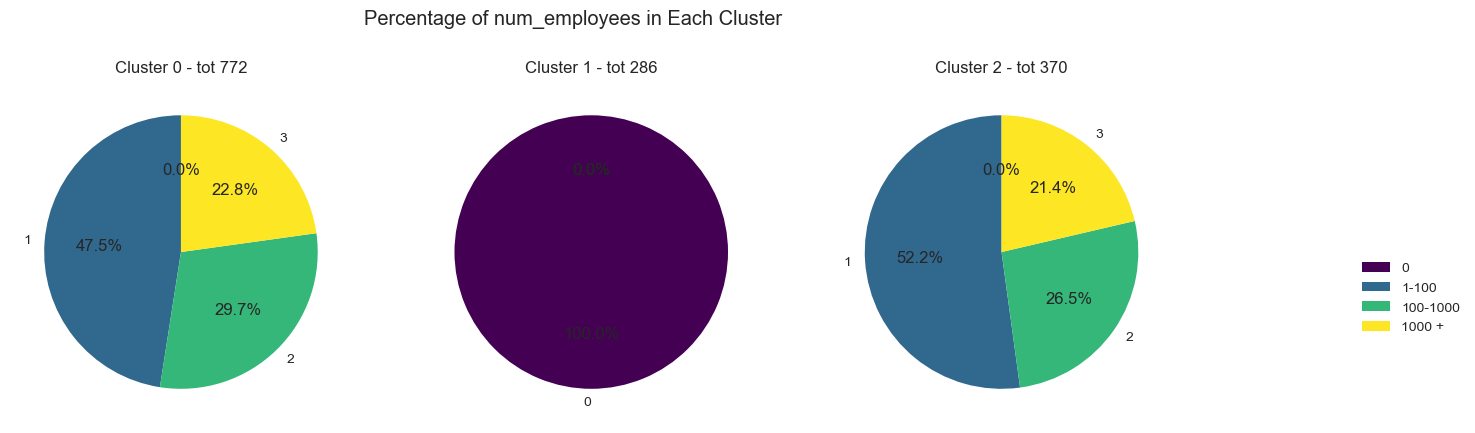

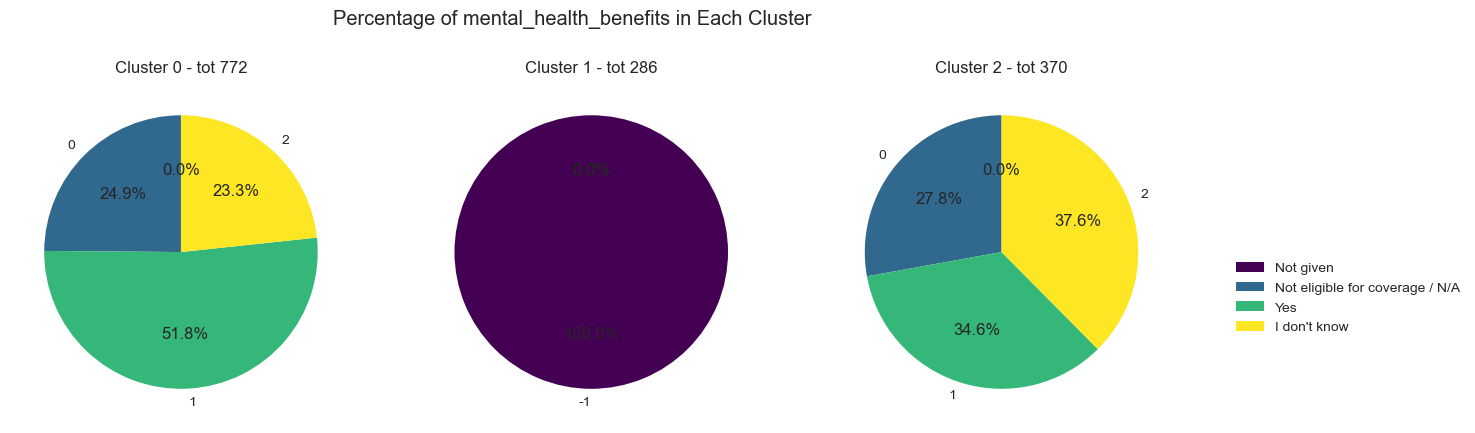

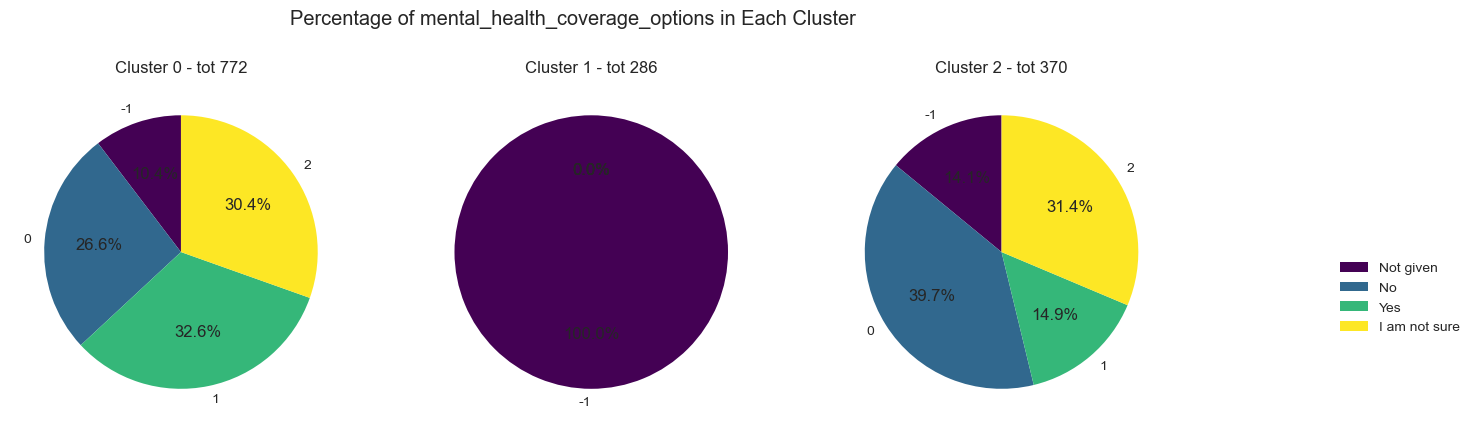

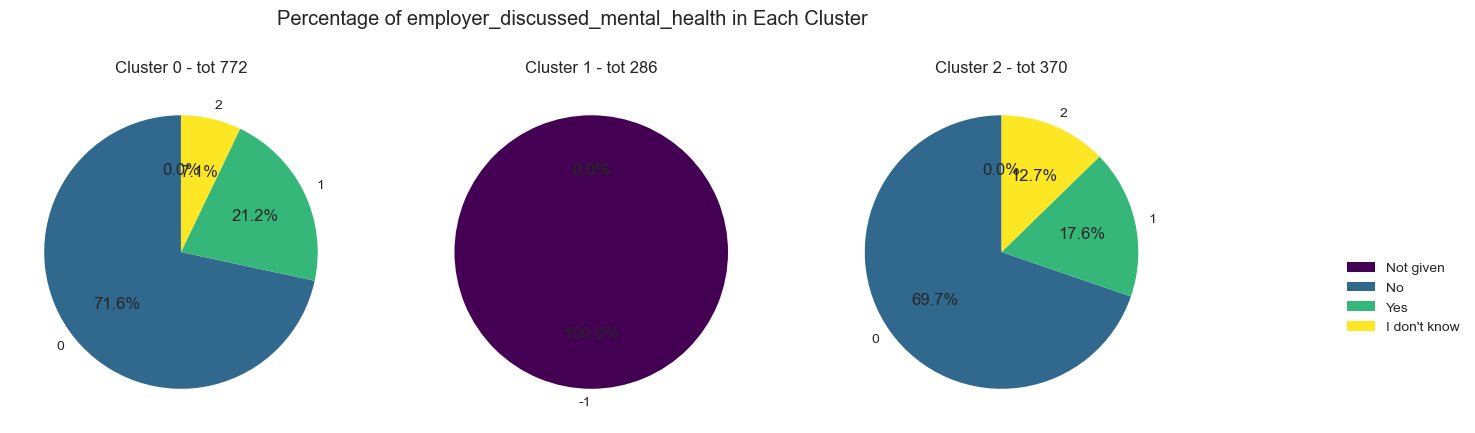

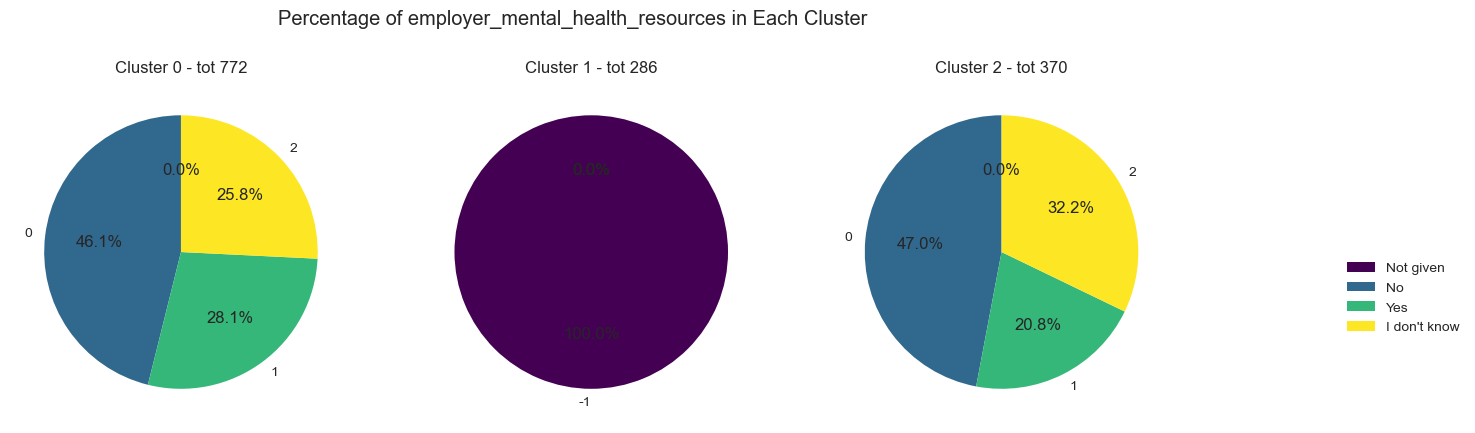

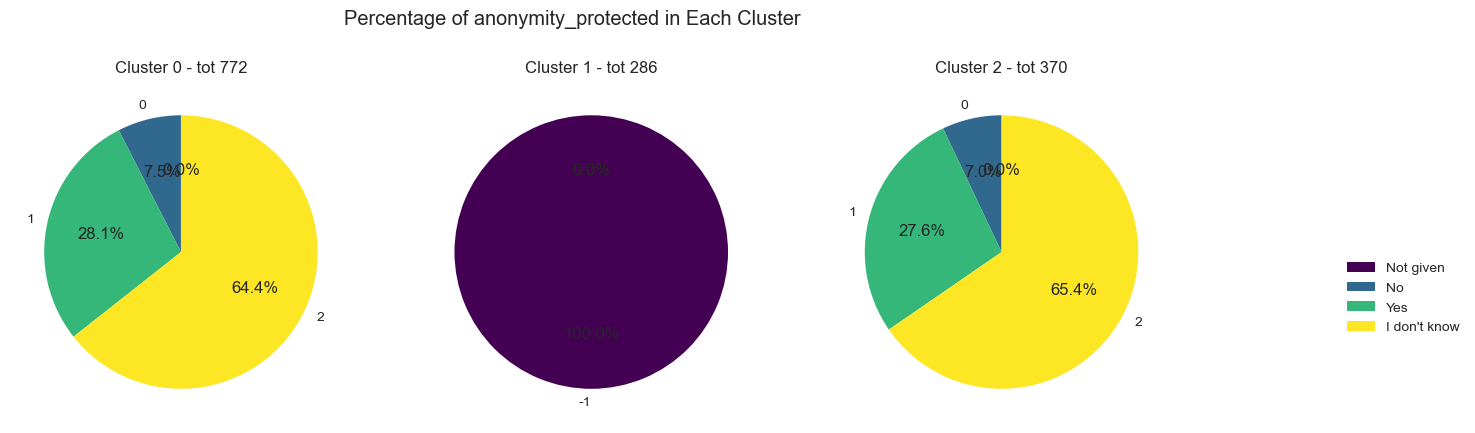

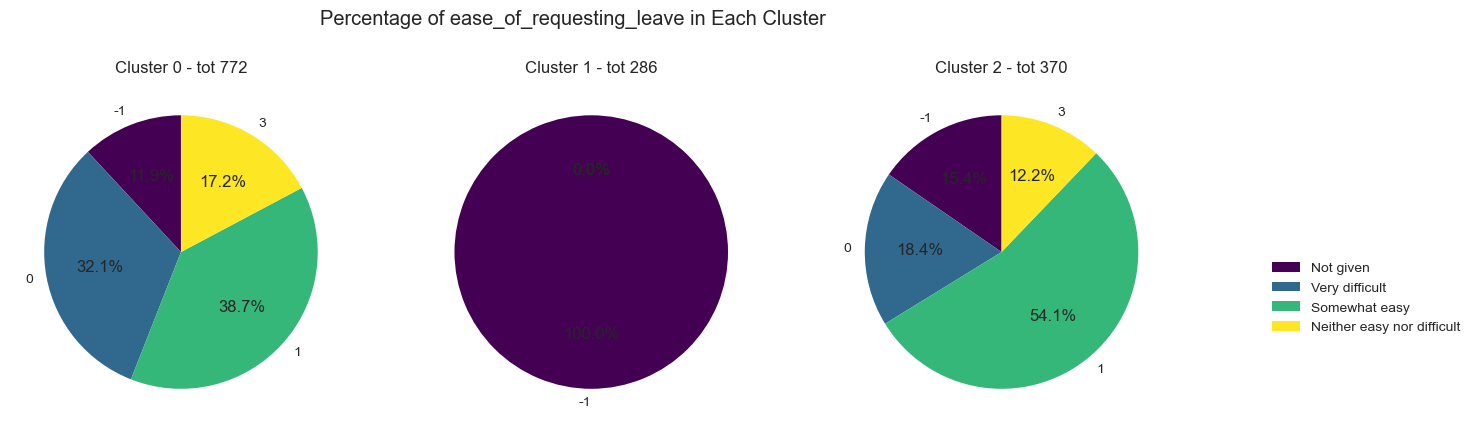

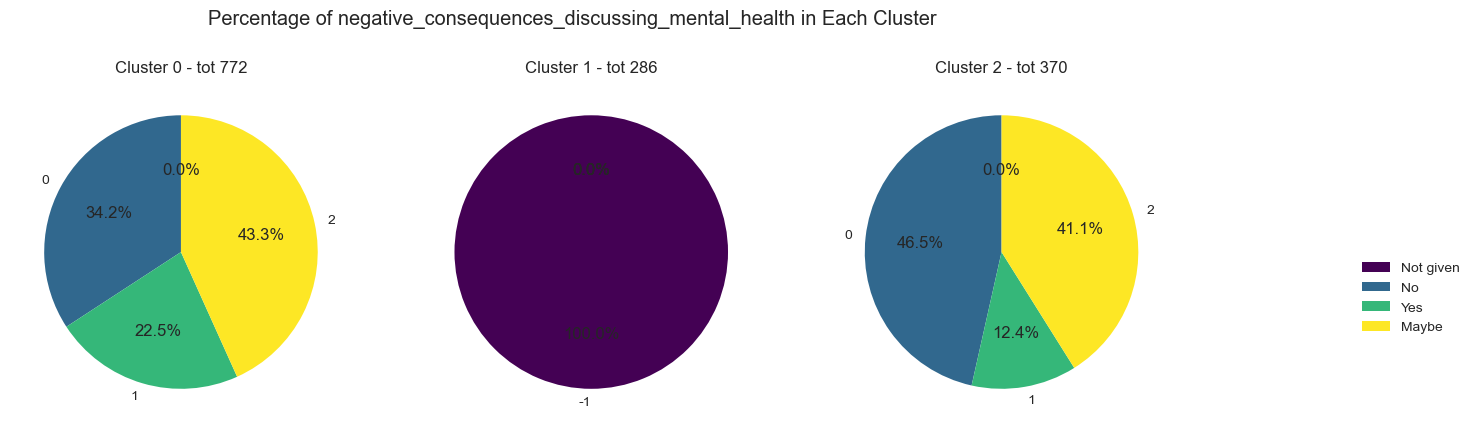

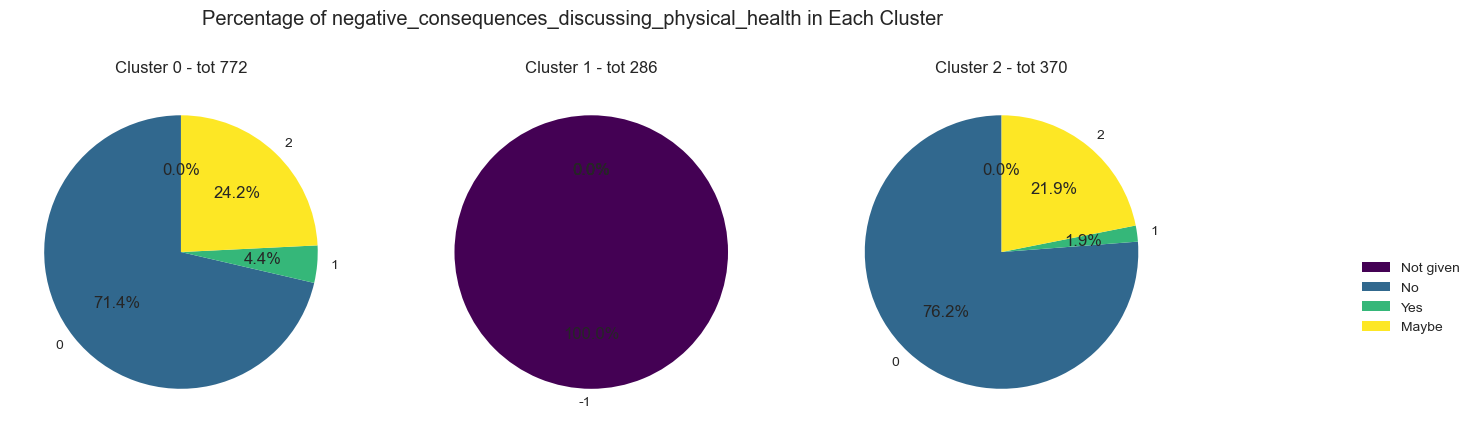

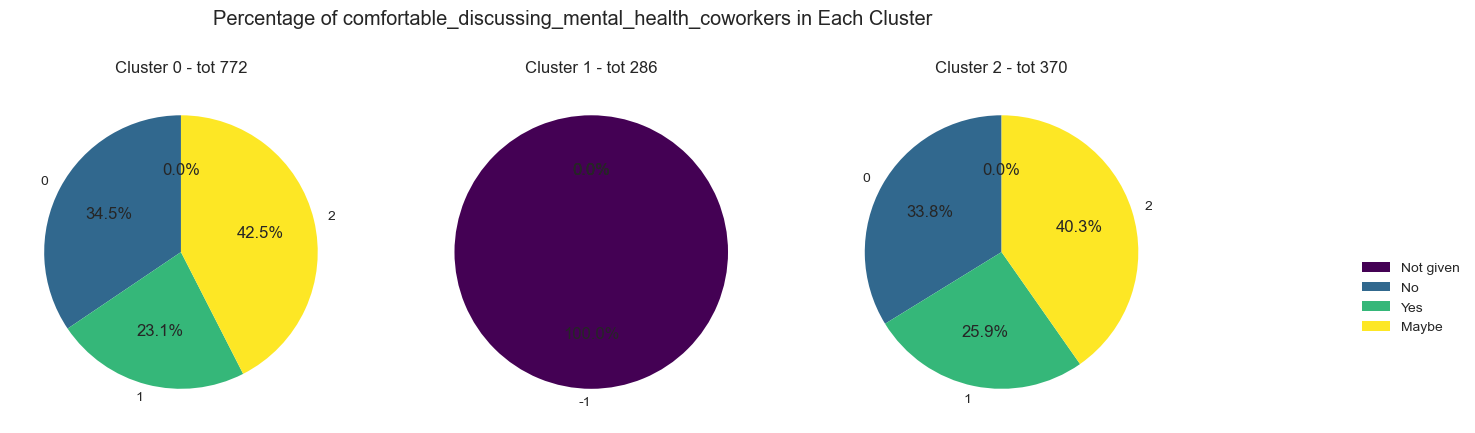

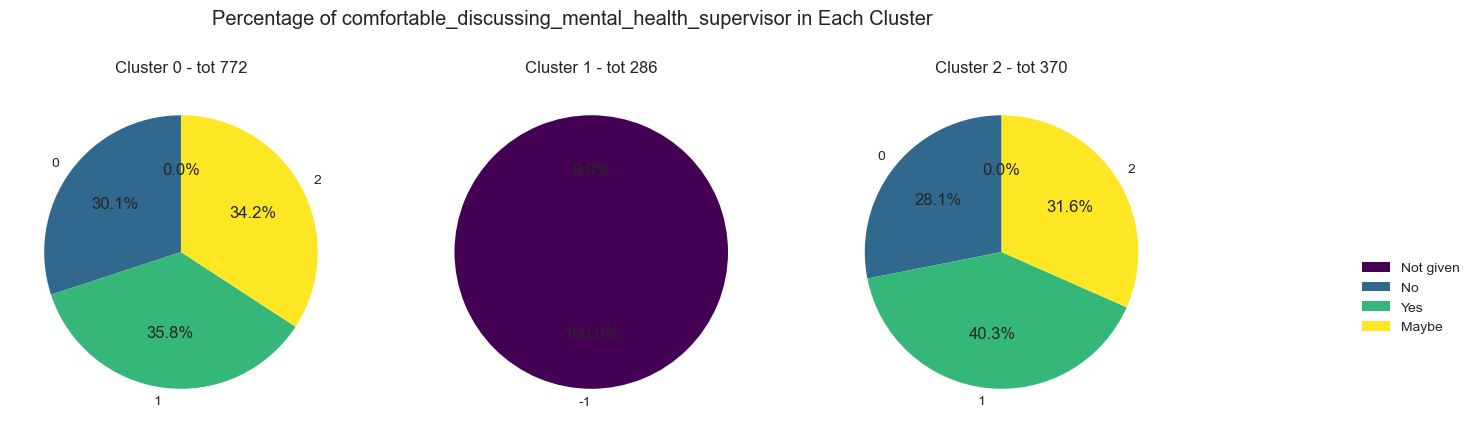

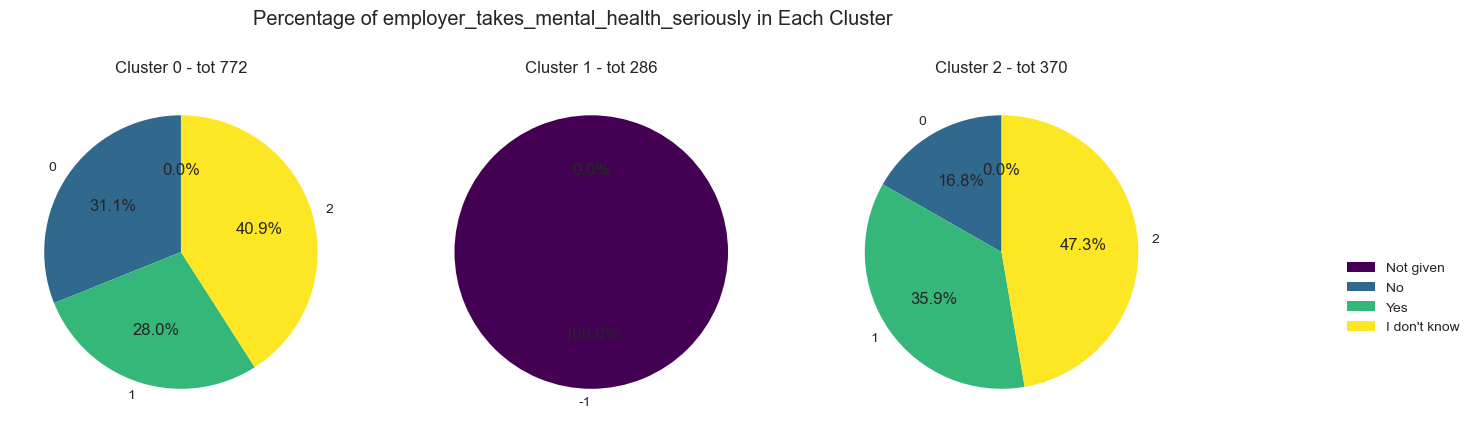

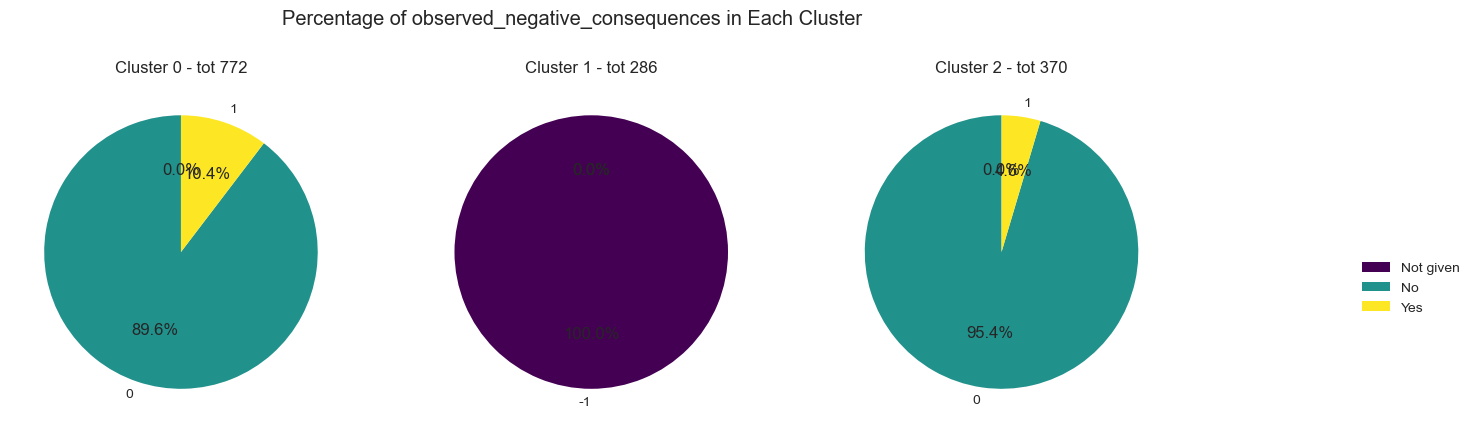

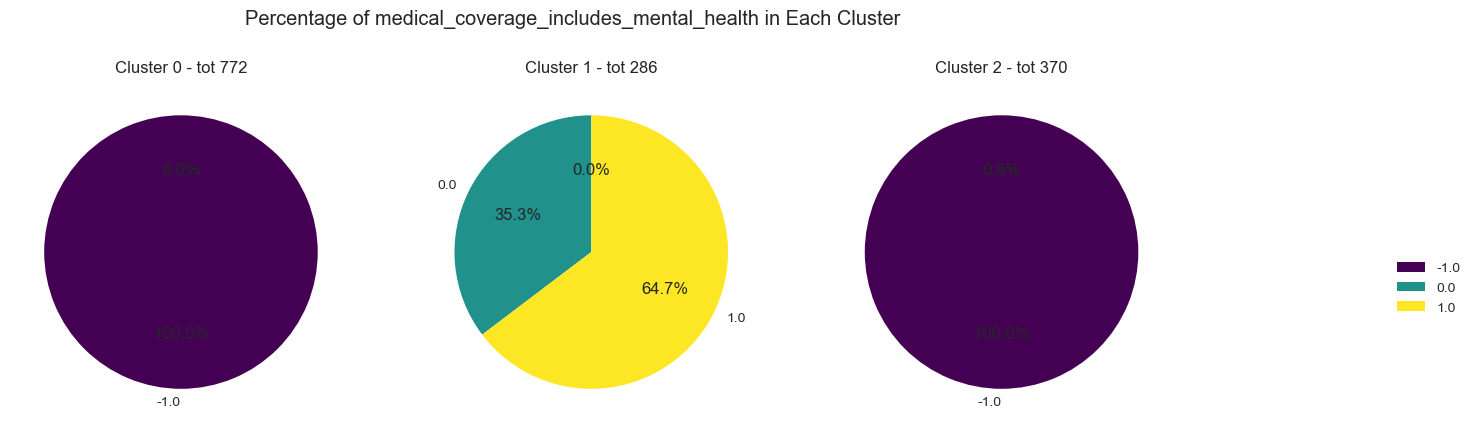

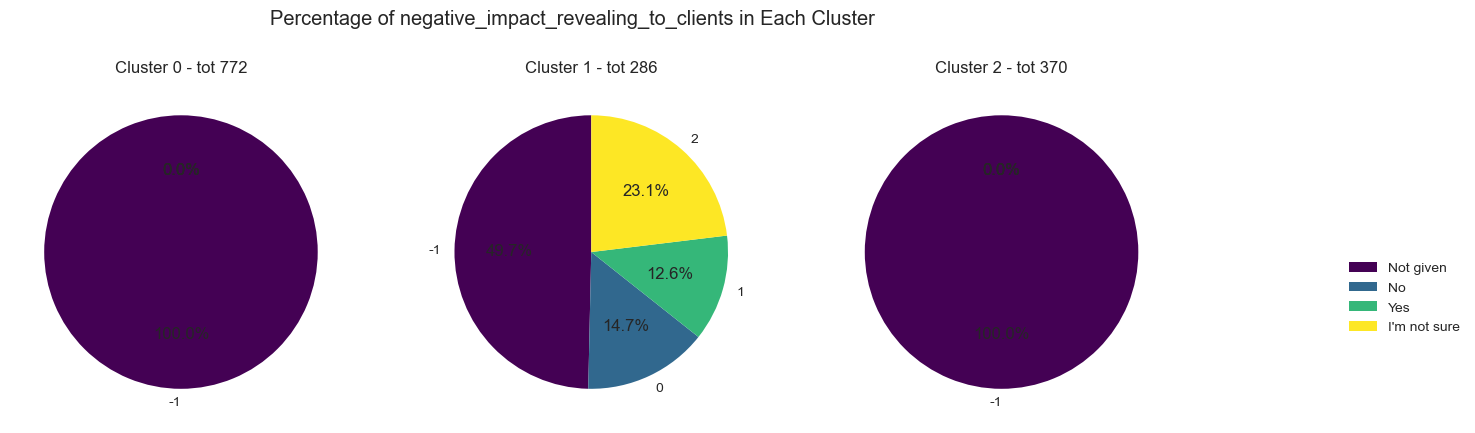

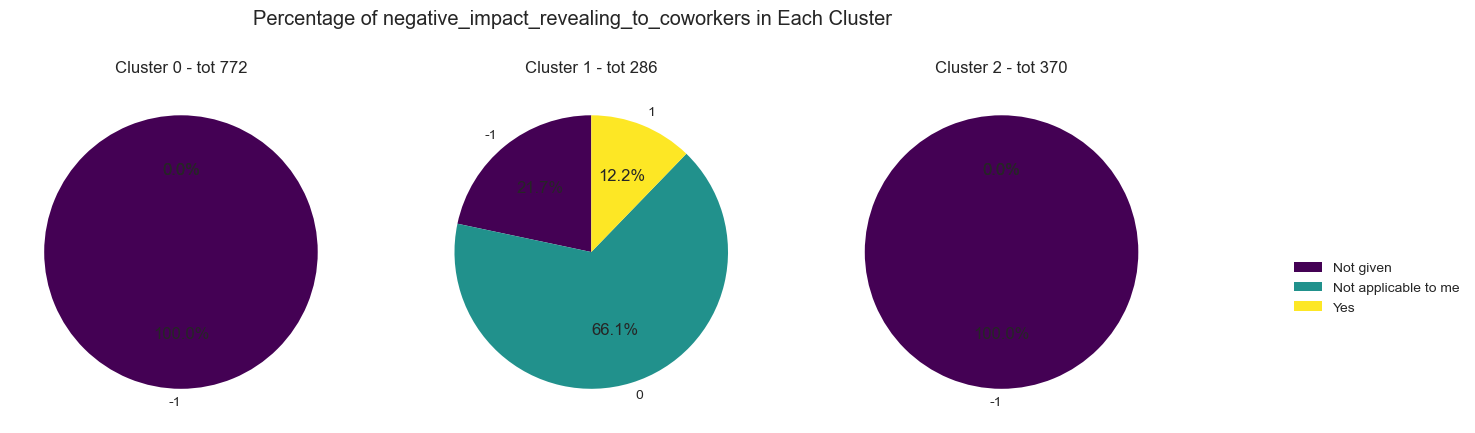

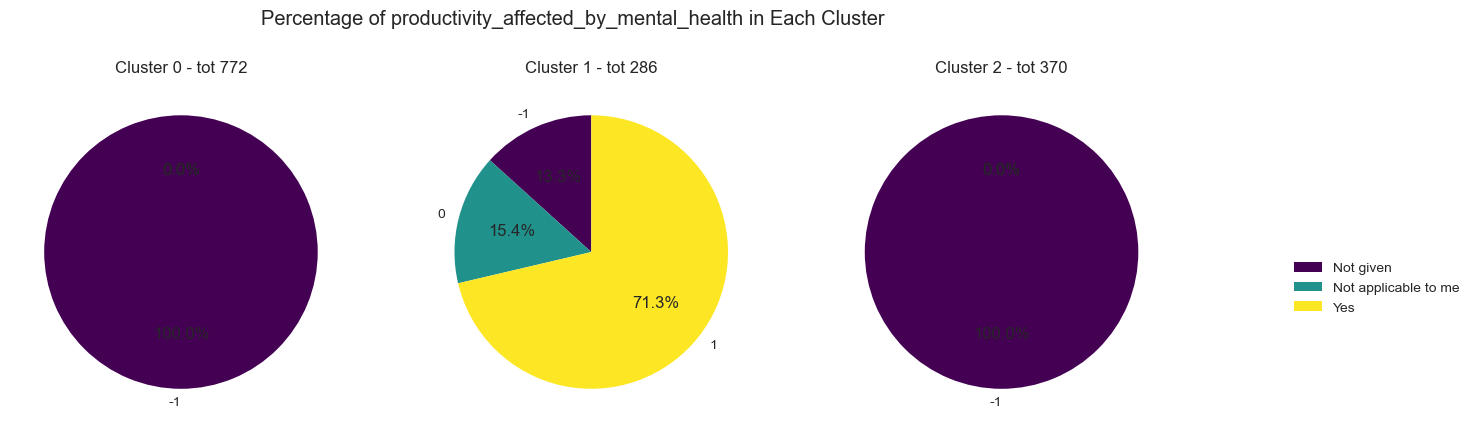

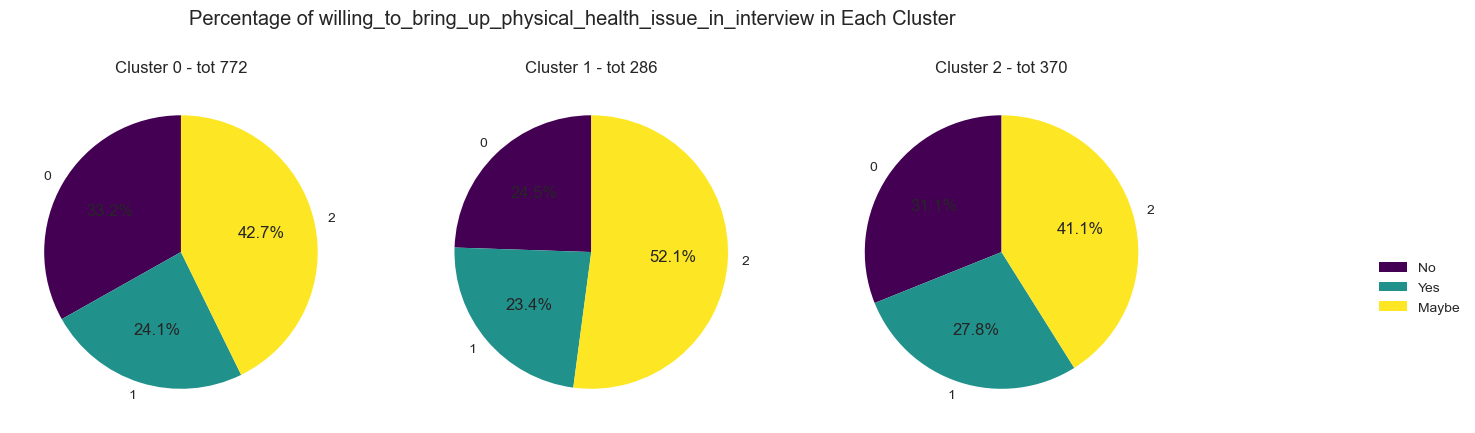

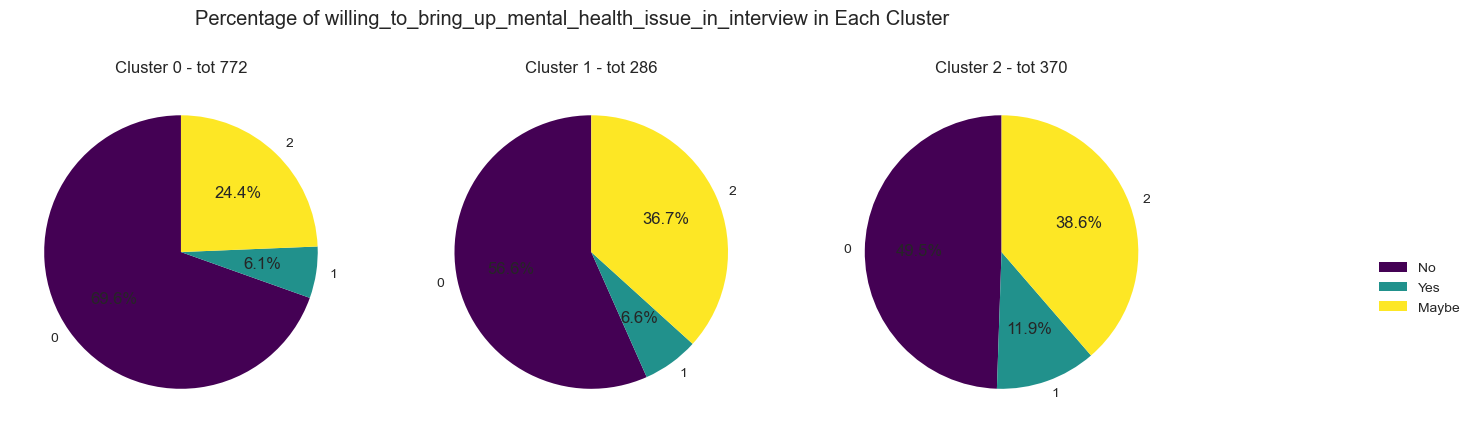

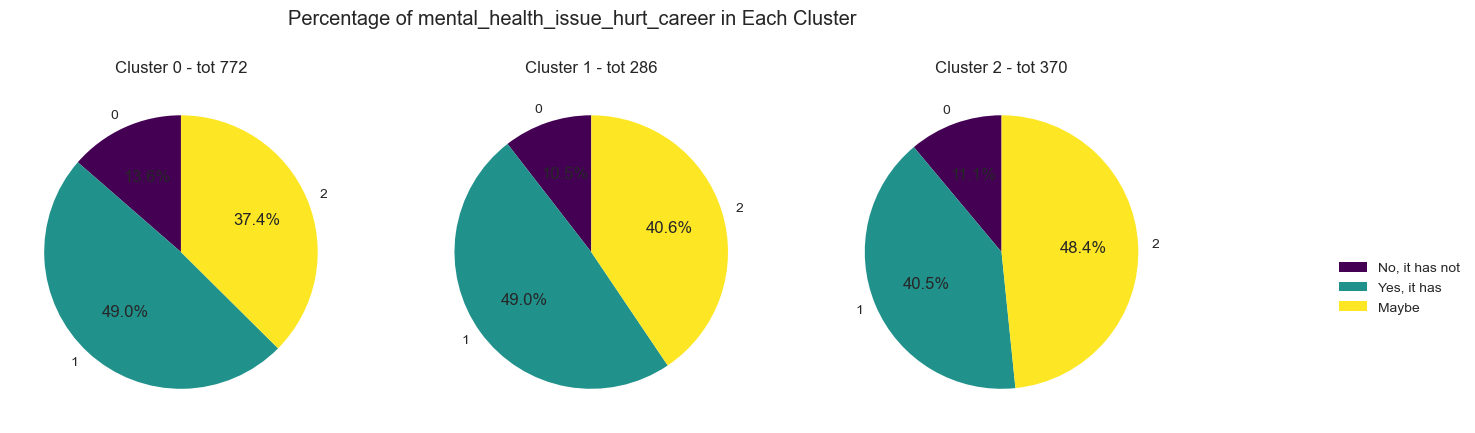

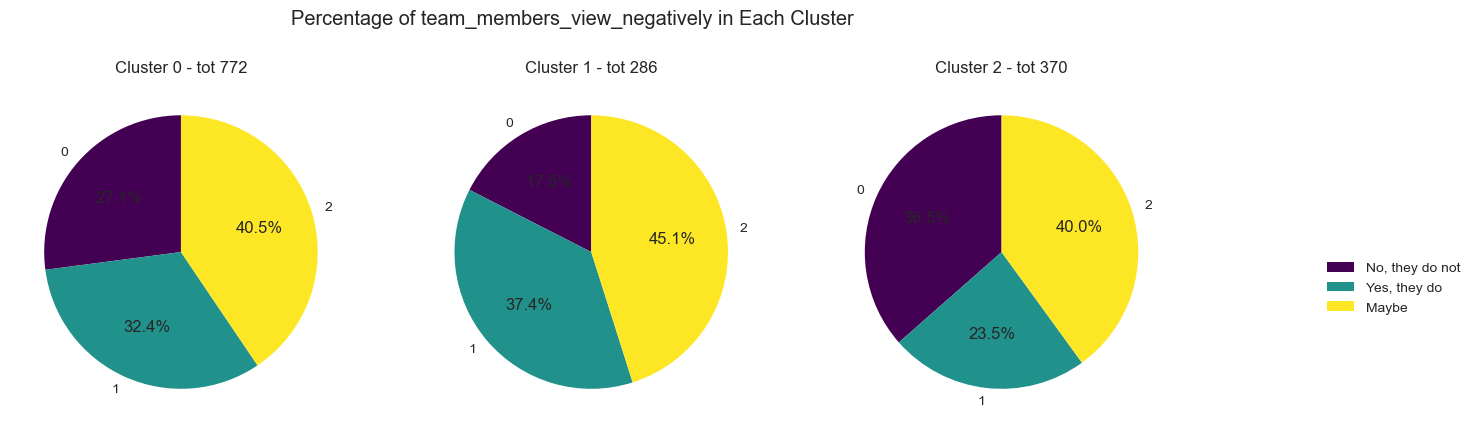

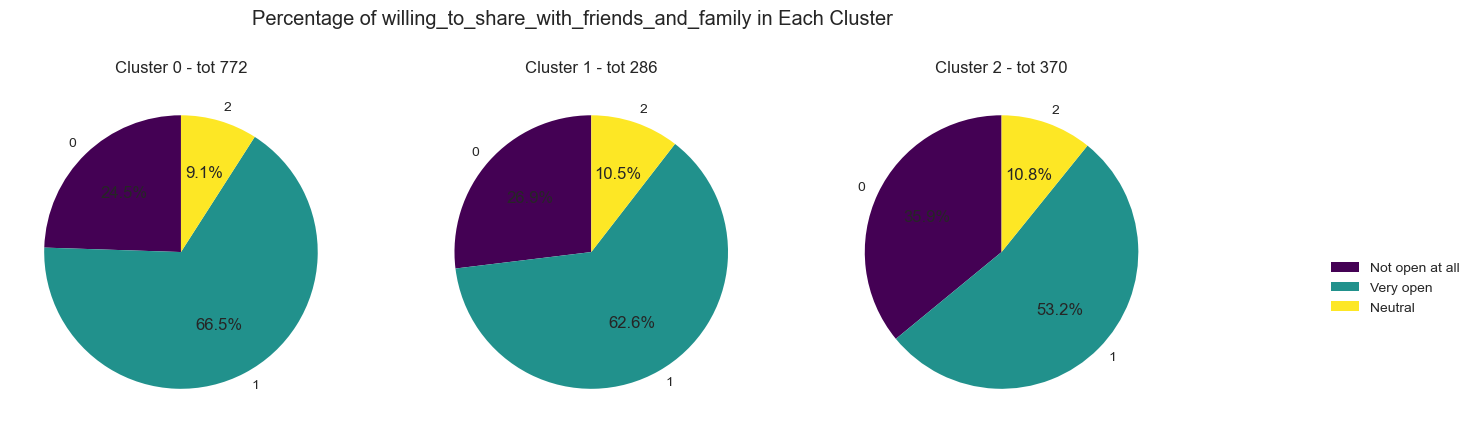

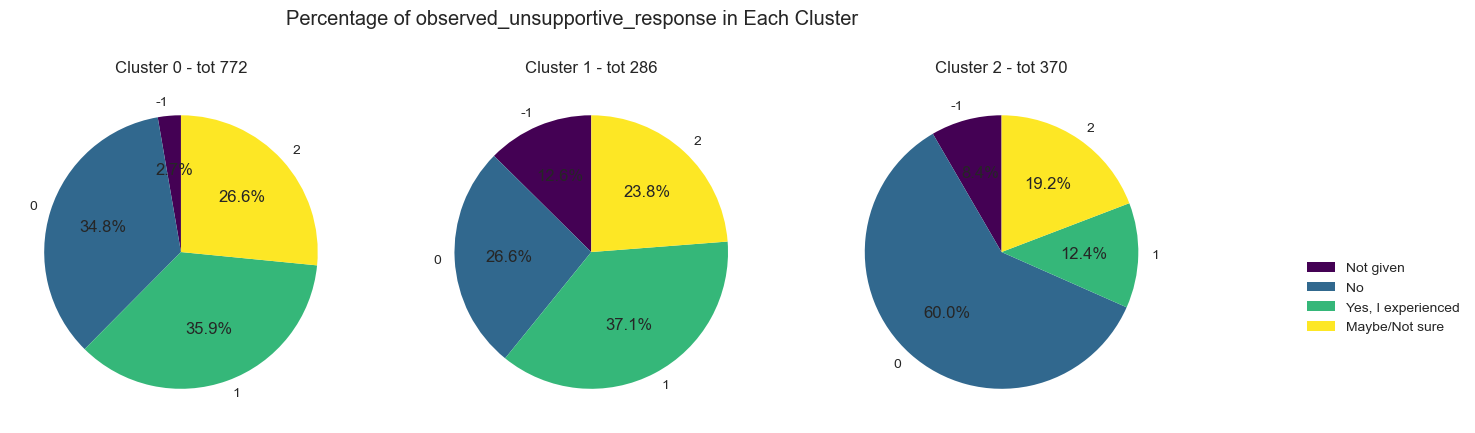

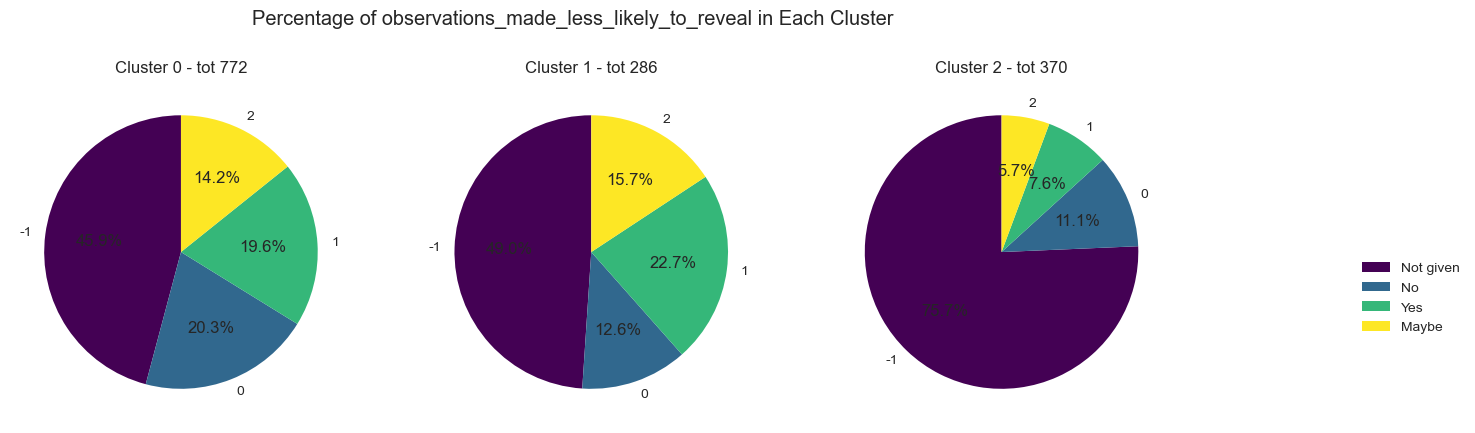

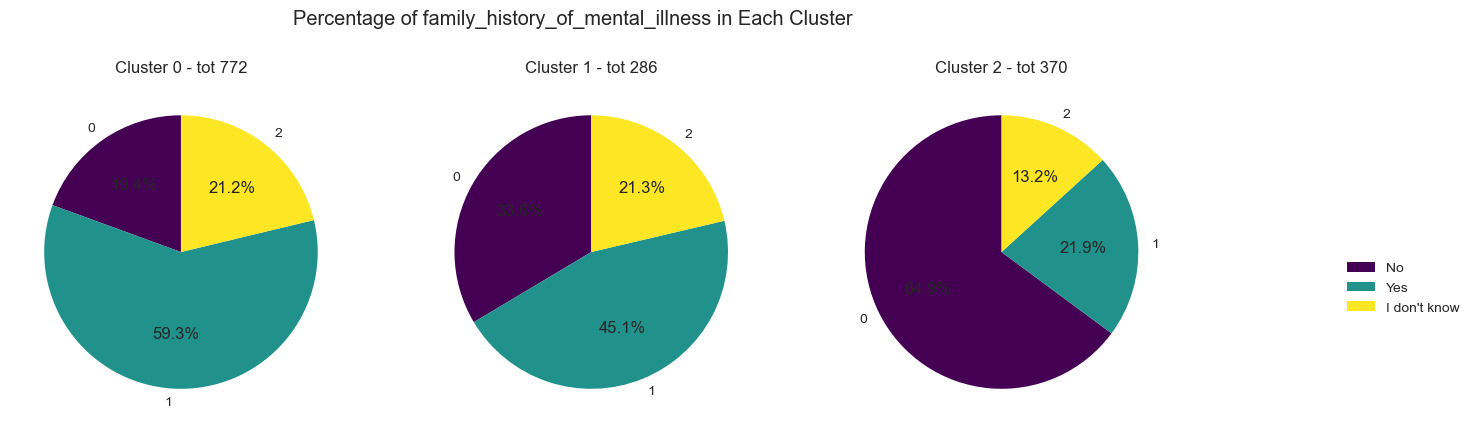

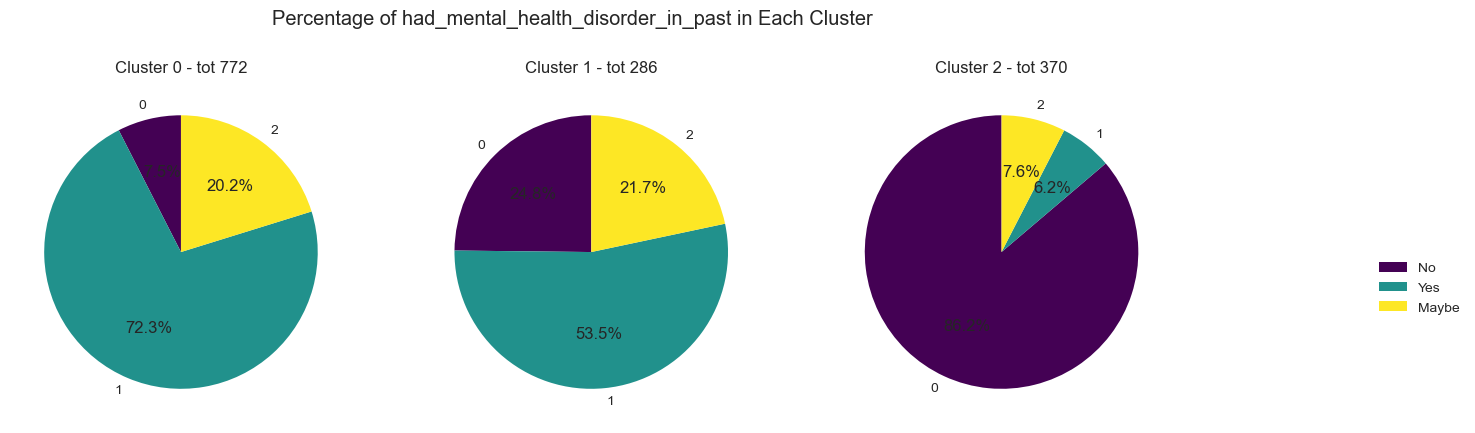

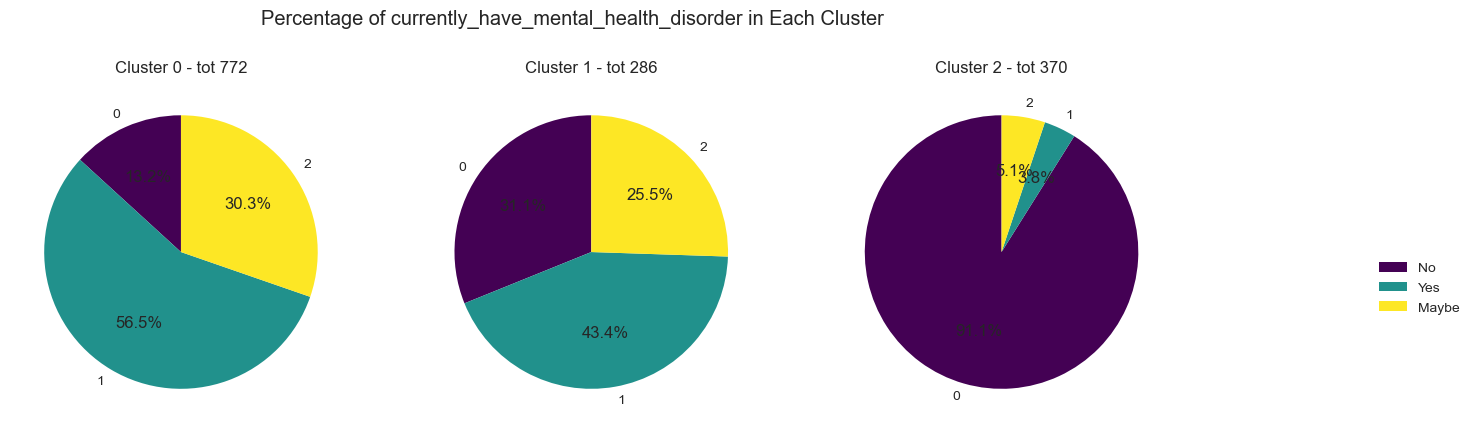

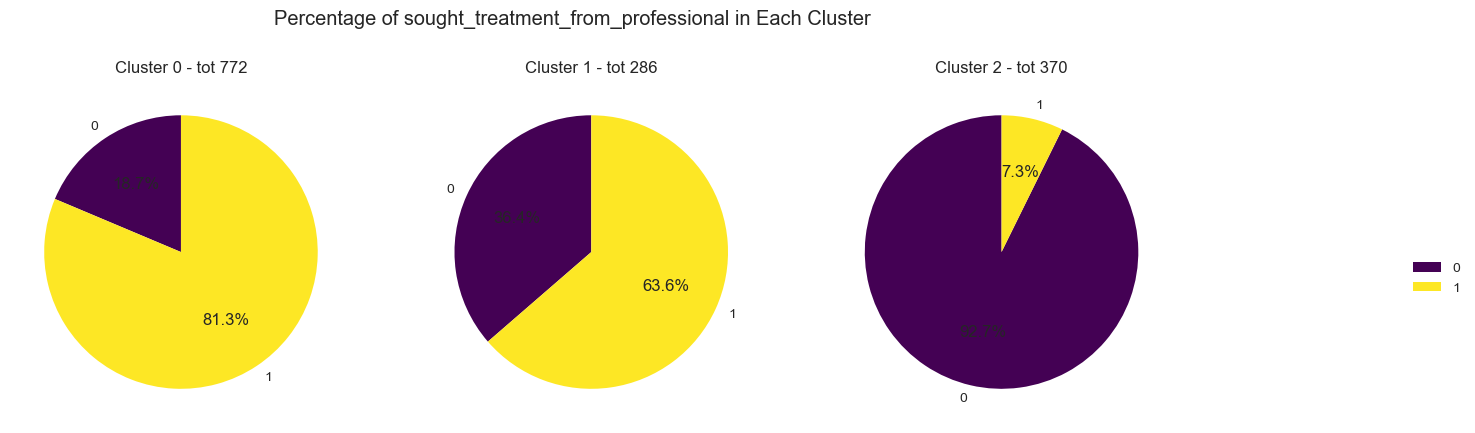

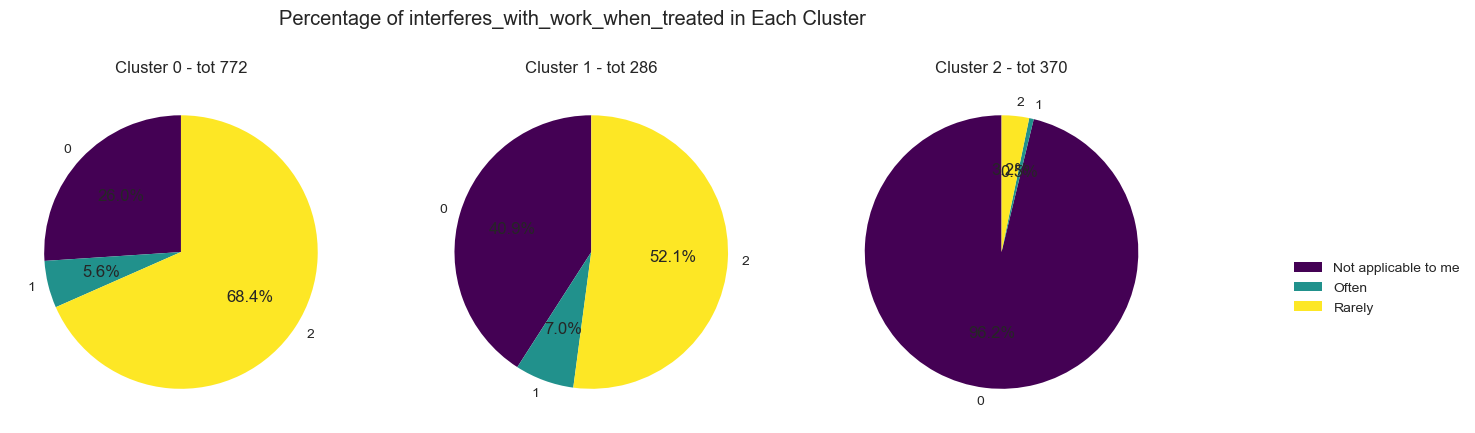

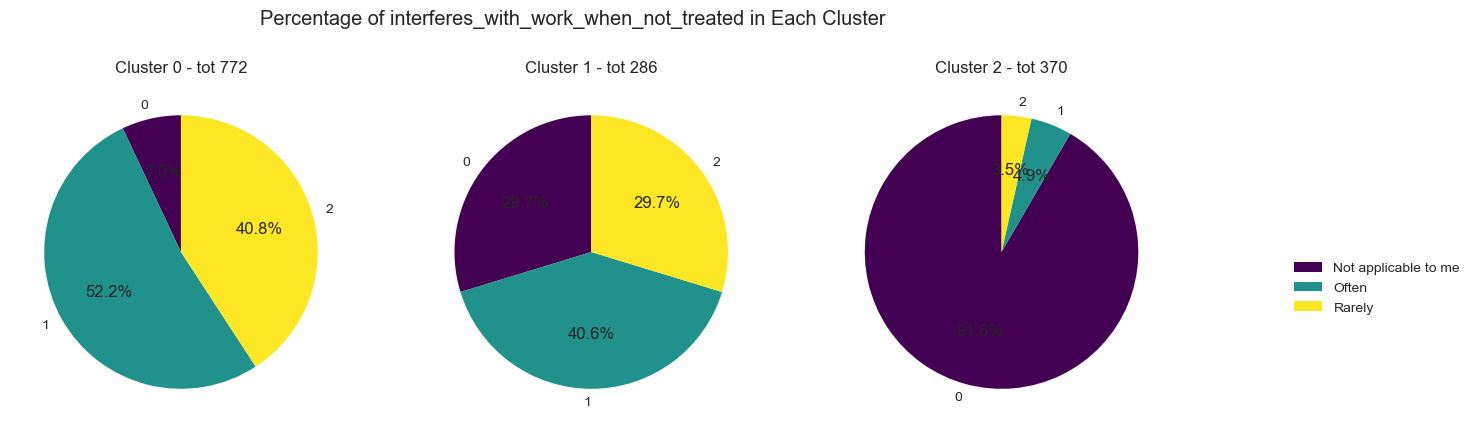

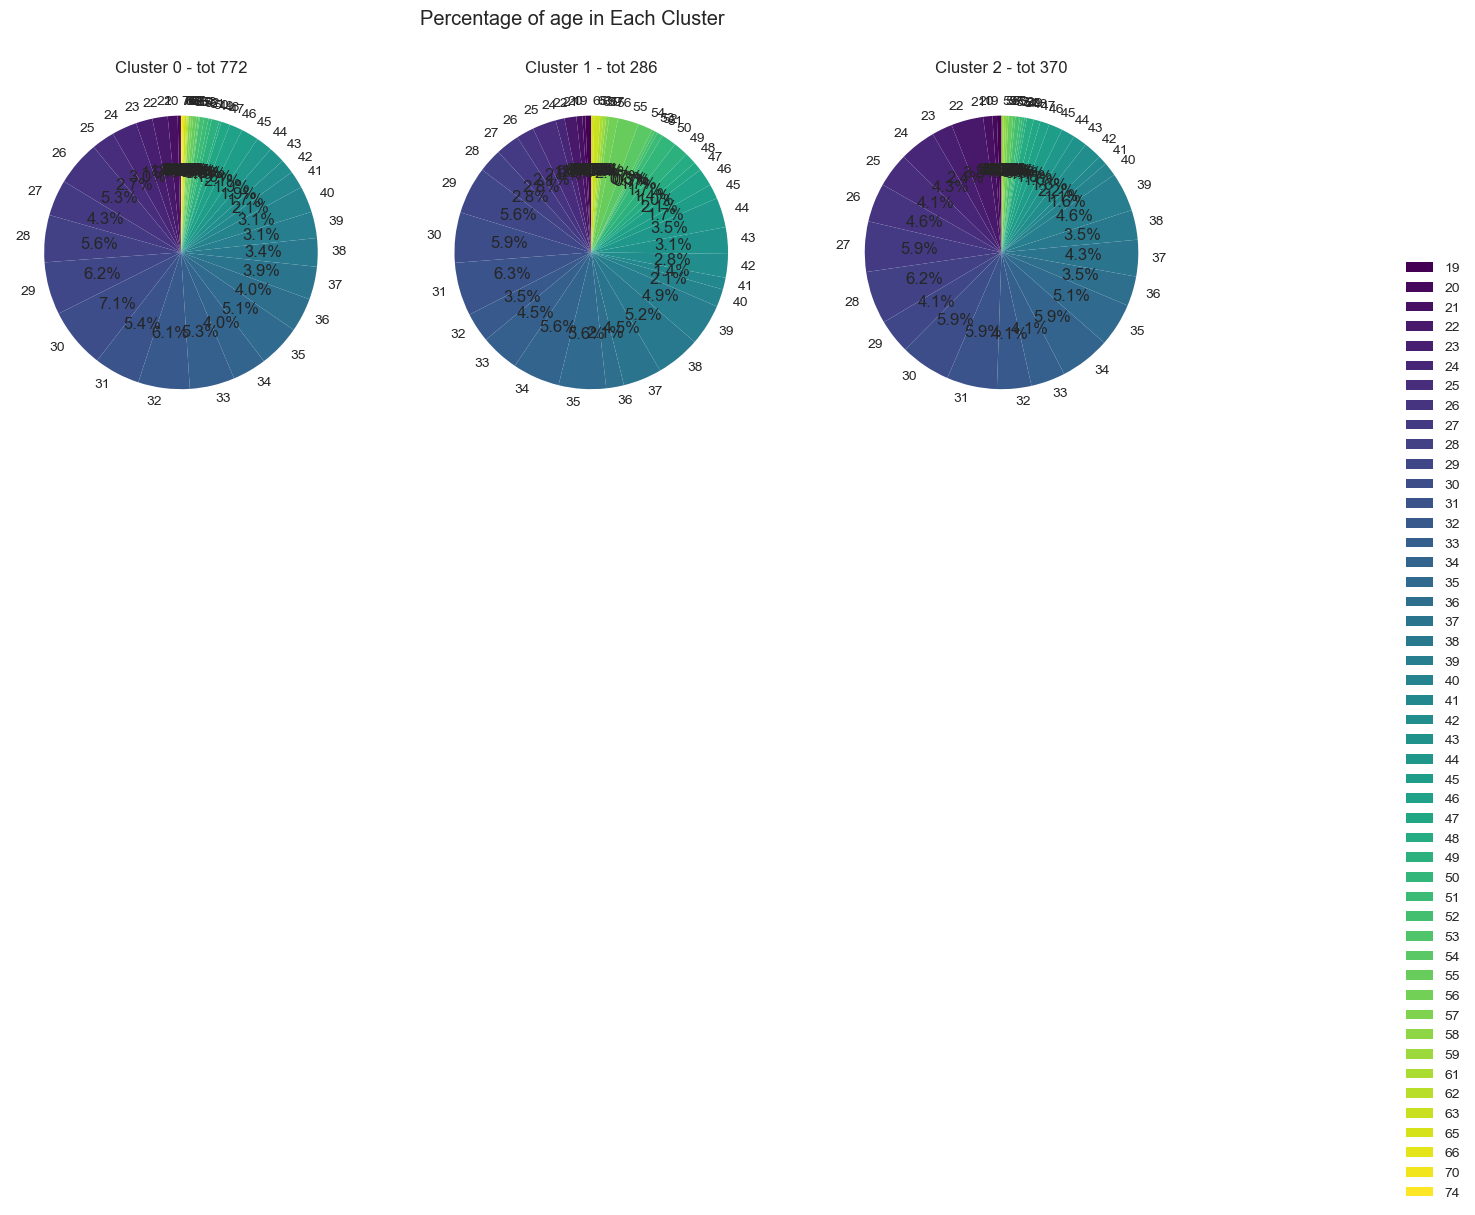

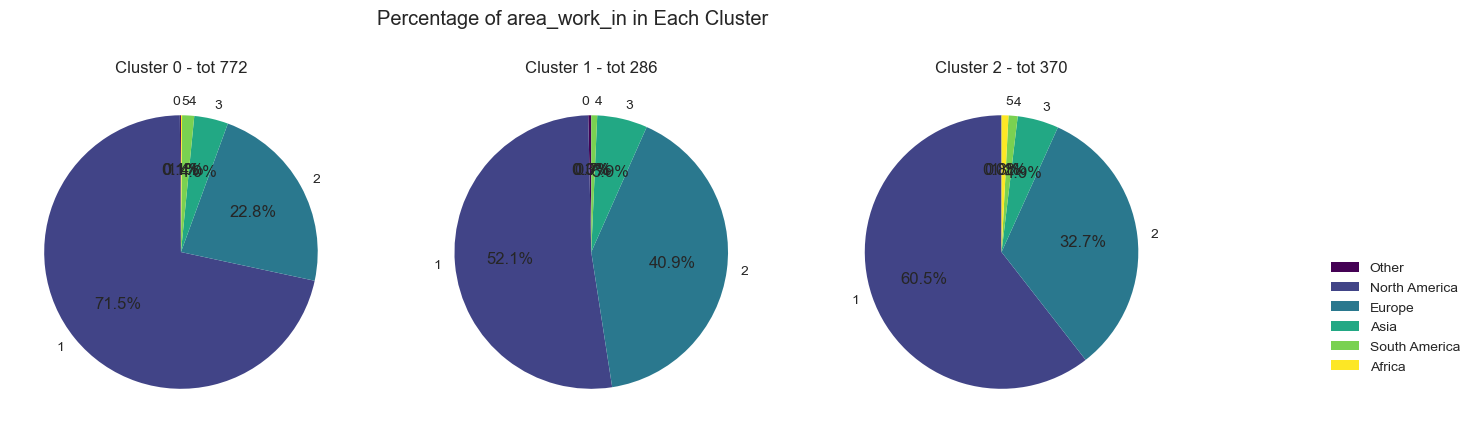

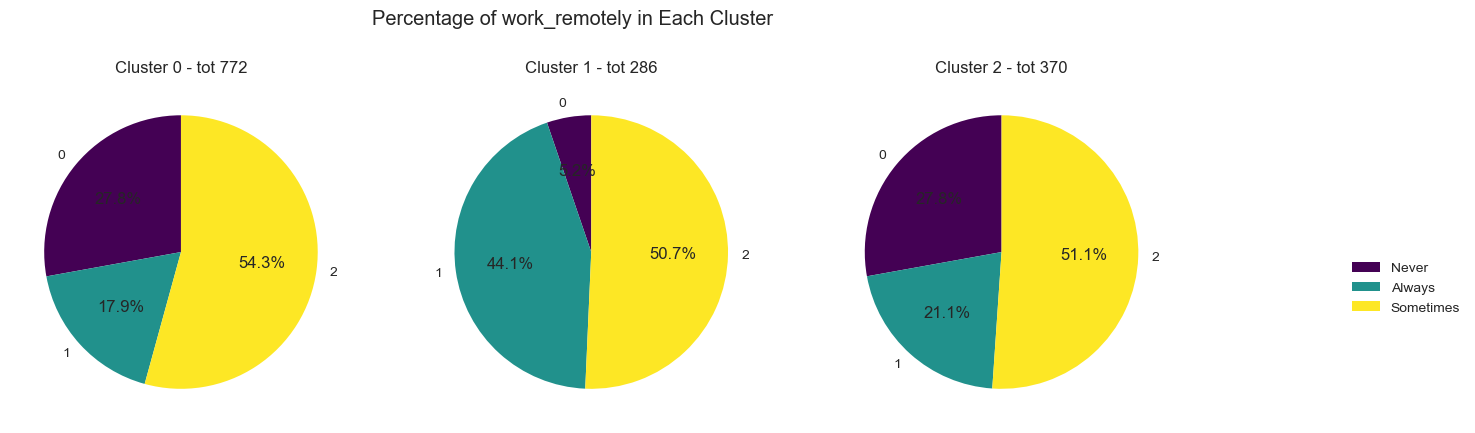

In [124]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score
silhouette_avg = silhouette_score(pca_df[['PC1', 'PC2']], pca_df['Cluster'])
print(f"The average silhouette score is: {silhouette_avg}")

# Analyze each cluster. Show the quantity of data for each feature in each cluster
cluster_data = pd.concat([df, pca_df], axis=1)
cluster_data.groupby('Cluster').mean()

# Visualize the percentage of each value for every feature in each cluster
features = df.columns[:-1]  # Exclude the 'cluster' column

for feature in features:
    cluster_counts = cluster_data.groupby('Cluster')[feature].value_counts(normalize=True).unstack().fillna(0)
    fig, axes = plt.subplots(1, cluster_counts.shape[0], figsize=(15, 5), sharey=True)
    for i, cluster in enumerate(cluster_counts.index):
        cluster_counts.loc[cluster].plot(kind='pie', autopct='%1.1f%%', startangle=90, cmap='viridis', ax=axes[i])
        axes[i].set_title(f'Cluster {cluster} - tot {cluster_data[cluster_data["Cluster"] == cluster].shape[0]}')
        axes[i].set_ylabel('')
    
    # Create a single legend for the entire figure
    if feature in val_mapping:
        labels = {v: k for k, v in val_mapping[feature].items()}
        legend_labels = ["Not given" if item == -1 else labels.get(item, item) for item in cluster_counts.columns]
    else:
        legend_labels = cluster_counts.columns
    fig.legend(legend_labels, loc='upper right', bbox_to_anchor=(1.1, 0.5))
    
    plt.suptitle(f'Percentage of {feature} in Each Cluster')
    plt.show()

### HIPOTEZ TESTLERI 

In [126]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Yeni regresyon modelini tanımlama
reg1 = smf.ols('currently_have_mental_health_disorder ~ mental_health_coverage_options + family_history_of_mental_illness + had_mental_health_disorder_in_past + sought_treatment_from_professional + age', data=df)

# Modeli fit etme
res1 = reg1.fit()

# Model özetini yazdırma
print(res1.summary())


                                      OLS Regression Results                                     
Dep. Variable:     currently_have_mental_health_disorder   R-squared:                       0.292
Model:                                               OLS   Adj. R-squared:                  0.290
Method:                                    Least Squares   F-statistic:                     117.4
Date:                                   Mon, 12 May 2025   Prob (F-statistic):          4.78e-104
Time:                                           16:25:58   Log-Likelihood:                -1388.2
No. Observations:                                   1428   AIC:                             2788.
Df Residuals:                                       1422   BIC:                             2820.
Df Model:                                              5                                         
Covariance Type:                               nonrobust                                         
                    

In [127]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

# OLS Regresyonu (Bağımlı Değişken: currently_have_mental_health_disorder)
reg1 = smf.ols('currently_have_mental_health_disorder ~ mental_health_coverage_options + family_history_of_mental_illness + had_mental_health_disorder_in_past + sought_treatment_from_professional + age + work_remotely + productivity_affected_by_mental_health', data=df)
res1 = reg1.fit()

# Modelin özetini yazdırma
print(res1.summary())


                                      OLS Regression Results                                     
Dep. Variable:     currently_have_mental_health_disorder   R-squared:                       0.298
Model:                                               OLS   Adj. R-squared:                  0.295
Method:                                    Least Squares   F-statistic:                     86.28
Date:                                   Mon, 12 May 2025   Prob (F-statistic):          1.06e-104
Time:                                           16:25:58   Log-Likelihood:                -1381.8
No. Observations:                                   1428   AIC:                             2780.
Df Residuals:                                       1420   BIC:                             2822.
Df Model:                                              7                                         
Covariance Type:                               nonrobust                                         
                    

In [128]:
import pandas as pd
import scipy.stats as stats
import statsmodels.formula.api as smf

# Veriyi oku
df = pd.read_csv("cleaned_data.csv")


In [129]:
import statsmodels.formula.api as smf

# Regresyon modelini oluşturuyoruz
reg1 = smf.ols(
    'currently_have_mental_health_disorder ~ num_employees + mental_health_benefits + mental_health_coverage_options + employer_discussed_mental_health + employer_mental_health_resources + anonymity_protected + ease_of_requesting_leave + negative_consequences_discussing_mental_health + negative_consequences_discussing_physical_health + comfortable_discussing_mental_health_coworkers + comfortable_discussing_mental_health_supervisor + employer_takes_mental_health_seriously + observed_negative_consequences + medical_coverage_includes_mental_health + know_local_resources + reveal_mental_health_to_clients + negative_impact_revealing_to_clients + reveal_mental_health_to_coworkers + negative_impact_revealing_to_coworkers + productivity_affected_by_mental_health + willing_to_bring_up_physical_health_issue_in_interview + willing_to_bring_up_mental_health_issue_in_interview + mental_health_issue_hurt_career + team_members_view_negatively + willing_to_share_with_friends_and_family + observed_unsupportive_response + observations_made_less_likely_to_reveal + family_history_of_mental_illness + had_mental_health_disorder_in_past + currently_have_mental_health_disorder + sought_treatment_from_professional + interferes_with_work_when_treated + interferes_with_work_when_not_treated + age + area_work_in + work_remotely + work_where_lives',
    data=df
)

# Modeli fit ediyoruz
res1 = reg1.fit()

# Sonuçları yazdırıyoruz
print(res1.summary())


                                      OLS Regression Results                                     
Dep. Variable:     currently_have_mental_health_disorder   R-squared:                       1.000
Model:                                               OLS   Adj. R-squared:                  1.000
Method:                                    Least Squares   F-statistic:                 1.241e+30
Date:                                   Mon, 12 May 2025   Prob (F-statistic):               0.00
Time:                                           16:25:58   Log-Likelihood:                 45252.
No. Observations:                                   1428   AIC:                        -9.043e+04
Df Residuals:                                       1390   BIC:                        -9.023e+04
Df Model:                                             37                                         
Covariance Type:                               nonrobust                                         
                    

In [130]:
# Geçersiz (-1) verileri filtrele
df_valid_1 = df[
    (df['family_history_of_mental_illness'] != -1) & 
    (df['currently_have_mental_health_disorder'] != -1)
]

# Ki-kare testi için kontenjans tablosu
contingency1 = pd.crosstab(
    df_valid_1['family_history_of_mental_illness'],
    df_valid_1['currently_have_mental_health_disorder']
)

# Ki-kare testi
chi2_1, p_1, dof_1, expected_1 = stats.chi2_contingency(contingency1)

print("Hipotez Testi 1 - Ki-kare Testi (Family History):")
print("Chi2 değeri:", chi2_1)
print("p-değeri:", p_1)


Hipotez Testi 1 - Ki-kare Testi (Family History):
Chi2 değeri: 271.1784008782758
p-değeri: 1.7773575623604343e-57


In [131]:
# Geçersiz (-1) verileri filtrele
df_valid_2 = df[
    (df['sought_treatment_from_professional'] != -1) & 
    (df['currently_have_mental_health_disorder'] != -1)
]

# Kontenjans tablosu
contingency2 = pd.crosstab(
    df_valid_2['sought_treatment_from_professional'],
    df_valid_2['currently_have_mental_health_disorder']
)

# Ki-kare testi
chi2_2, p_2, dof_2, expected_2 = stats.chi2_contingency(contingency2)

print("Hipotez Testi 2 - Ki-kare Testi (Treatment Sought):")
print("Chi2 değeri:", chi2_2)
print("p-değeri:", p_2)


Hipotez Testi 2 - Ki-kare Testi (Treatment Sought):
Chi2 değeri: 451.8790068690343
p-değeri: 7.511391777889659e-99


In [132]:
# Grupları ayır
group_0 = df[df['currently_have_mental_health_disorder'] == 0]['age']
group_1 = df[df['currently_have_mental_health_disorder'] == 1]['age']

# t-testi
t_stat, p_val = stats.ttest_ind(group_0, group_1, equal_var=False)

print("Hipotez Testi 3 - t-Testi (Age):")
print("t istatistiği:", t_stat)
print("p-değeri:", p_val)


Hipotez Testi 3 - t-Testi (Age):
t istatistiği: 0.23349473898789486
p-değeri: 0.8154207712072681


In [133]:
from scipy.stats import chi2_contingency
import pandas as pd

# Hedef değişken
target = 'currently_have_mental_health_disorder'

# Sonuçları saklamak için liste
results = []

# Tüm sütunları sırayla test et (hedef değişken hariç)
for col in df.columns:
    if col != target:
        try:
            contingency_table = pd.crosstab(df[col], df[target])
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            results.append((col, p))
        except:
            results.append((col, None))  # Sayısal veya eksik veri varsa

# p-değerine göre sırala
results_sorted = sorted(results, key=lambda x: (x[1] is None, x[1]))

# Sonuçları yazdır
for col, p in results_sorted:
    if p is not None:
        print(f"{col}: p = {p:.4f}")
    else:
        print(f"{col}: p = None (uygun değil)")


had_mental_health_disorder_in_past: p = 0.0000
interferes_with_work_when_not_treated: p = 0.0000
interferes_with_work_when_treated: p = 0.0000
sought_treatment_from_professional: p = 0.0000
family_history_of_mental_illness: p = 0.0000
observed_unsupportive_response: p = 0.0000
observations_made_less_likely_to_reveal: p = 0.0000
productivity_affected_by_mental_health: p = 0.0000
reveal_mental_health_to_coworkers: p = 0.0000
negative_impact_revealing_to_clients: p = 0.0000
mental_health_coverage_options: p = 0.0000
willing_to_share_with_friends_and_family: p = 0.0000
mental_health_benefits: p = 0.0000
know_local_resources: p = 0.0000
reveal_mental_health_to_clients: p = 0.0000
willing_to_bring_up_mental_health_issue_in_interview: p = 0.0000
ease_of_requesting_leave: p = 0.0000
employer_takes_mental_health_seriously: p = 0.0000
negative_consequences_discussing_mental_health: p = 0.0000
area_work_in: p = 0.0000
negative_impact_revealing_to_coworkers: p = 0.0001
team_members_view_negatively

In [134]:
from scipy.stats import chi2_contingency

target = 'currently_have_mental_health_disorder'
chi2_results = []

for col in df.columns:
    if col != target:
        try:
            table = pd.crosstab(df[col], df[target])
            chi2, p, dof, expected = chi2_contingency(table)
            chi2_results.append((col, p))
        except:
            chi2_results.append((col, None))

for col, p in chi2_results:
    print(f"Chi2 - {col}: p = {p}")


Chi2 - num_employees: p = 0.13672381734370706
Chi2 - mental_health_benefits: p = 1.4762776754184828e-08
Chi2 - mental_health_coverage_options: p = 1.1753878879673135e-11
Chi2 - employer_discussed_mental_health: p = 0.002186098742210862
Chi2 - employer_mental_health_resources: p = 0.044009463296304396
Chi2 - anonymity_protected: p = 0.007090409859702437
Chi2 - ease_of_requesting_leave: p = 5.077164302879484e-06
Chi2 - negative_consequences_discussing_mental_health: p = 9.75045855125896e-06
Chi2 - negative_consequences_discussing_physical_health: p = 0.0016470820046434452
Chi2 - comfortable_discussing_mental_health_coworkers: p = 0.0027327378127299335
Chi2 - comfortable_discussing_mental_health_supervisor: p = 0.021062713684405196
Chi2 - employer_takes_mental_health_seriously: p = 5.59576468358173e-06
Chi2 - observed_negative_consequences: p = 0.023781998410191192
Chi2 - medical_coverage_includes_mental_health: p = 0.09468873513209054
Chi2 - know_local_resources: p = 1.422209022697718e-0

In [135]:
from scipy.stats import f_oneway

anova_results = []
classes = df[target].dropna().unique()

for col in df.columns:
    if col != target:
        try:
            groups = [df[df[target] == c][col].dropna() for c in classes]
            if all(len(g) > 1 for g in groups):
                stat, p = f_oneway(*groups)
                anova_results.append((col, p))
            else:
                anova_results.append((col, None))
        except:
            anova_results.append((col, None))

for col, p in anova_results:
    print(f"ANOVA - {col}: p = {p}")


ANOVA - num_employees: p = 0.41414144999834646
ANOVA - mental_health_benefits: p = 0.027075155338664506
ANOVA - mental_health_coverage_options: p = 0.5712048413579527
ANOVA - employer_discussed_mental_health: p = 0.0001365543283971653
ANOVA - employer_mental_health_resources: p = 0.042564346031037786
ANOVA - anonymity_protected: p = 0.10959562160603539
ANOVA - ease_of_requesting_leave: p = 0.25896670203037275
ANOVA - negative_consequences_discussing_mental_health: p = 0.5238686256725062
ANOVA - negative_consequences_discussing_physical_health: p = 0.3343209997120251
ANOVA - comfortable_discussing_mental_health_coworkers: p = 0.09000522922674765
ANOVA - comfortable_discussing_mental_health_supervisor: p = 0.03912629708672467
ANOVA - employer_takes_mental_health_seriously: p = 0.00021827835115018667
ANOVA - observed_negative_consequences: p = 0.5428229011159409
ANOVA - medical_coverage_includes_mental_health: p = 0.06853323531749167
ANOVA - know_local_resources: p = 0.001443817952121025


In [136]:
from scipy.stats import ttest_ind

ttest_results = []
target_classes = df[target].dropna().unique()

for col in df.columns:
    if col != target and df[col].dtype in [int, float]:
        try:
            group1 = df[df[target] == target_classes[0]][col].dropna()
            group2 = df[df[target] == target_classes[1]][col].dropna()
            if len(group1) > 1 and len(group2) > 1:
                stat, p = ttest_ind(group1, group2)
                ttest_results.append((col, p))
            else:
                ttest_results.append((col, None))
        except:
            ttest_results.append((col, None))

for col, p in ttest_results:
    print(f"T-Test - {col}: p = {p}")


T-Test - medical_coverage_includes_mental_health: p = 0.028331227330529996


In [137]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency, mannwhitneyu
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import (
    classification_report, accuracy_score, confusion_matrix,
    roc_curve, auc, precision_recall_curve
)
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")


In [138]:
df = pd.read_csv("cleaned_data.csv")  # dosyanı yükledikten sonra
df.replace(-1, np.nan, inplace=True)


### FEATURE SELECTION

In [140]:
target = 'currently_have_mental_health_disorder'
features = [col for col in df.columns if col != target]

significance_results = []

for feature in features:
    temp_df = df[[feature, target]].dropna()
    if temp_df[feature].nunique() <= 10:
        contingency_table = pd.crosstab(temp_df[feature], temp_df[target])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        test_used = 'chi2'
    else:
        group1 = temp_df[temp_df[target] == 0][feature]
        group2 = temp_df[temp_df[target] == 1][feature]
        _, p = mannwhitneyu(group1, group2, alternative='two-sided')
        test_used = 'mannwhitneyu'
        
    significance_results.append((feature, p, test_used))

significance_df = pd.DataFrame(significance_results, columns=['Feature', 'p-value', 'Test Used'])
significance_df.sort_values(by='p-value', inplace=True)

# p > 0.05 olanları filtrele
excluded_features = significance_df[significance_df['p-value'] > 0.05]['Feature'].tolist()
significance_df

Feature        p-value  \
28                      had_mental_health_disorder_in_past  4.879660e-200   
31                   interferes_with_work_when_not_treated  1.541195e-174   
30                       interferes_with_work_when_treated  8.520844e-100   
29                      sought_treatment_from_professional   7.511392e-99   
27                        family_history_of_mental_illness   1.777358e-57   
19                  productivity_affected_by_mental_health   1.322482e-16   
25                          observed_unsupportive_response   2.057996e-16   
17                       reveal_mental_health_to_coworkers   6.687898e-14   
2                           mental_health_coverage_options   1.199467e-12   
24                willing_to_share_with_friends_and_family   5.217695e-11   
1                                   mental_health_benefits   1.388672e-08   
14                                    know_local_resources   2.699147e-08   
15                         reveal_mental_health_to_clients   1.030664e-06   
21    willing_to_bring_up_mental_health_issue_in_interview   1.786837e-06   
11                  employer_takes_mental_health_seriously   8.518761e-06   
6                                 ease_of_requesting_leave   9.791618e-06   
18                  negative_impact_revealing_to_coworkers   1.289878e-05   
33                                            area_work_in   1.584152e-05   
7           negative_consequences_discussing_mental_health   1.623857e-05   
23                            team_members_view_negatively   1.806147e-04   
26                 observations_made_less_likely_to_reveal   2.356848e-03   
8         negative_consequences_discussing_physical_health   3.081073e-03   
3                         employer_discussed_mental_health   4.554602e-03   
9           comfortable_discussing_mental_health_coworkers   5.008188e-03   
5                                      anonymity_protected   1.307835e-02   
22                         mental_health_issue_hurt_career   2.485735e-02   
10         comfortable_discussing_mental_health_supervisor   4.782886e-02   
16                    negative_impact_revealing_to_clients   4.864998e-02   
12                          observed_negative_consequences   5.370084e-02   
4                         employer_mental_health_resources   1.043400e-01   
0                                            num_employees   1.367238e-01   
34                                           work_remotely   1.561538e-01   
13                 medical_coverage_includes_mental_health   3.053032e-01   
32                                                     age   5.699969e-01   
20  willing_to_bring_up_physical_health_issue_in_interview   6.219471e-01   
35                                        work_where_lives   8.576316e-01   

       Test Used  
28          chi2  
31          chi2  
30          chi2  
29          chi2  
27          chi2  
19          chi2  
25          chi2  
17          chi2  
2           chi2  
24          chi2  
1           chi2  
14          chi2  
15          chi2  
21          chi2  
11          chi2  
6           chi2  
18          chi2  
33          chi2  
7           chi2  
23          chi2  
26          chi2  
8           chi2  
3           chi2  
9           chi2  
5           chi2  
22          chi2  
10          chi2  
16          chi2  
12          chi2  
4           chi2  
0           chi2  
34          chi2  
13          chi2  
32  mannwhitneyu  
20          chi2  
35          chi2

In [141]:
excluded_features

['observed_negative_consequences',
 'employer_mental_health_resources',
 'num_employees',
 'work_remotely',
 'medical_coverage_includes_mental_health',
 'age',
 'willing_to_bring_up_physical_health_issue_in_interview',
 'work_where_lives']

In [144]:
df.columns

Index(['num_employees', 'mental_health_benefits',
       'mental_health_coverage_options', 'employer_discussed_mental_health',
       'employer_mental_health_resources', 'anonymity_protected',
       'ease_of_requesting_leave',
       'negative_consequences_discussing_mental_health',
       'negative_consequences_discussing_physical_health',
       'comfortable_discussing_mental_health_coworkers',
       'comfortable_discussing_mental_health_supervisor',
       'employer_takes_mental_health_seriously',
       'observed_negative_consequences',
       'medical_coverage_includes_mental_health', 'know_local_resources',
       'reveal_mental_health_to_clients',
       'negative_impact_revealing_to_clients',
       'reveal_mental_health_to_coworkers',
       'negative_impact_revealing_to_coworkers',
       'productivity_affected_by_mental_health',
       'willing_to_bring_up_physical_health_issue_in_interview',
       'willing_to_bring_up_mental_health_issue_in_interview',
       'mental_hea

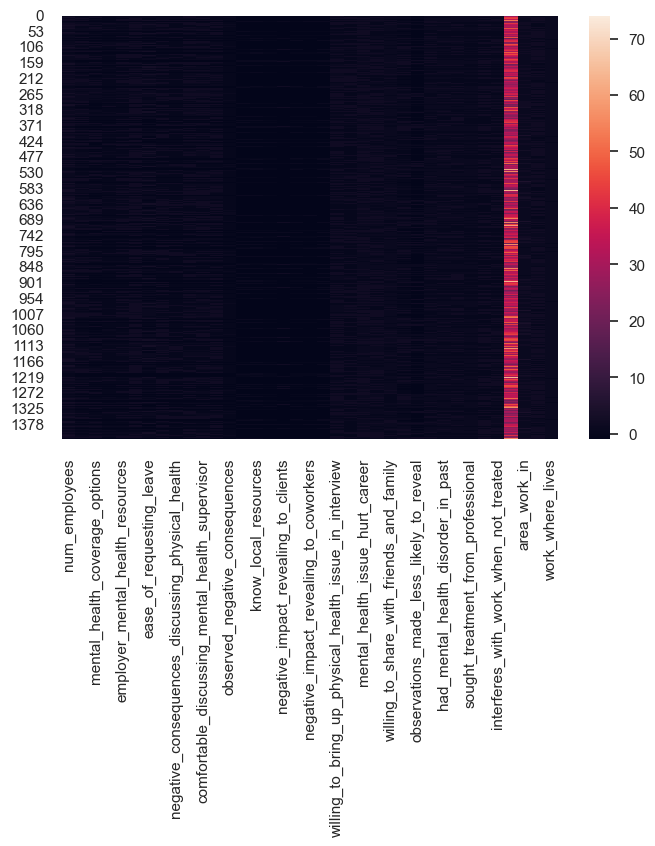

In [146]:
sns.heatmap(df);

### MODEL PERFORMANSLARI


===== Logistic Regression =====
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       184
           1       0.80      0.89      0.84       176

    accuracy                           0.84       360
   macro avg       0.84      0.84      0.84       360
weighted avg       0.84      0.84      0.84       360



<Figure size 1000x800 with 0 Axes>

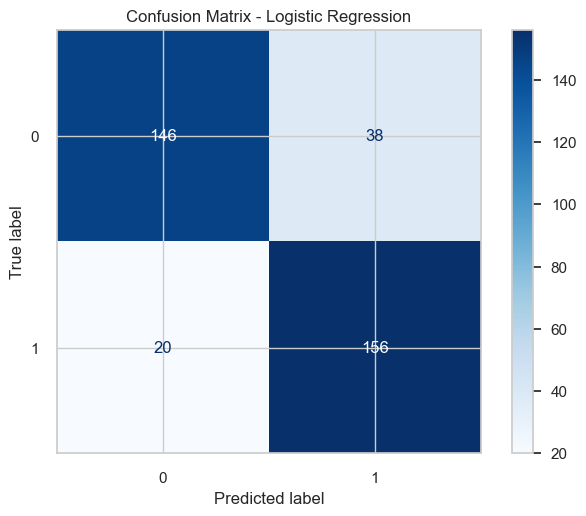


===== Decision Tree =====
              precision    recall  f1-score   support

           0       0.83      0.84      0.83       184
           1       0.83      0.82      0.82       176

    accuracy                           0.83       360
   macro avg       0.83      0.83      0.83       360
weighted avg       0.83      0.83      0.83       360



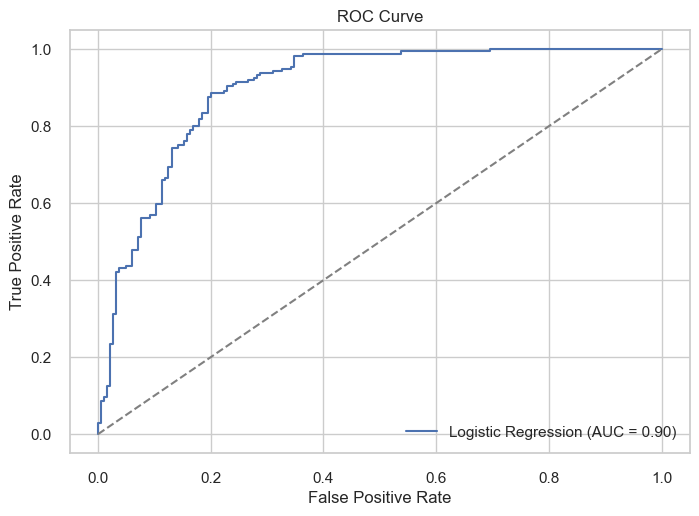

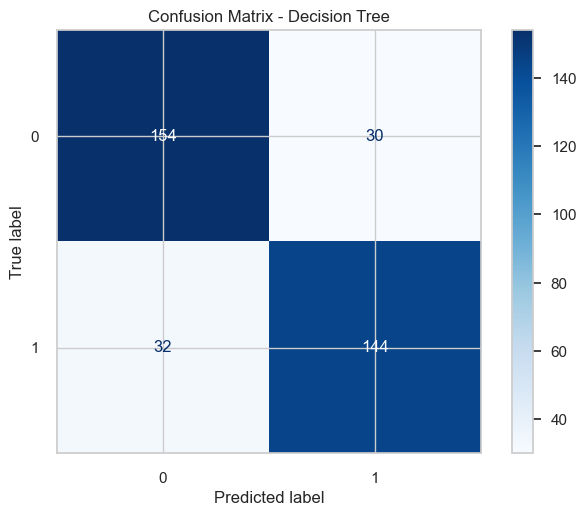


===== Random Forest =====
              precision    recall  f1-score   support

           0       0.95      0.83      0.88       184
           1       0.84      0.95      0.89       176

    accuracy                           0.89       360
   macro avg       0.90      0.89      0.89       360
weighted avg       0.90      0.89      0.89       360



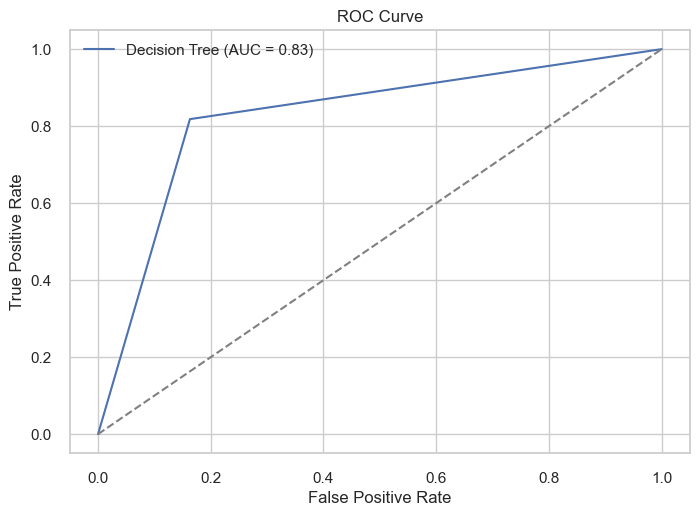

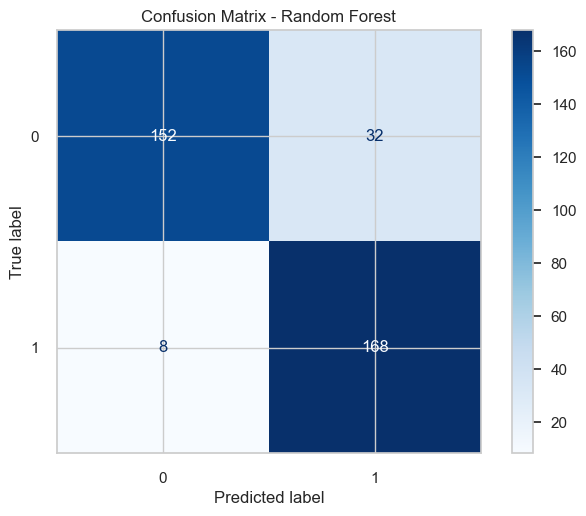


===== KNN =====
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       184
           1       0.83      0.81      0.82       176

    accuracy                           0.83       360
   macro avg       0.83      0.83      0.83       360
weighted avg       0.83      0.83      0.83       360



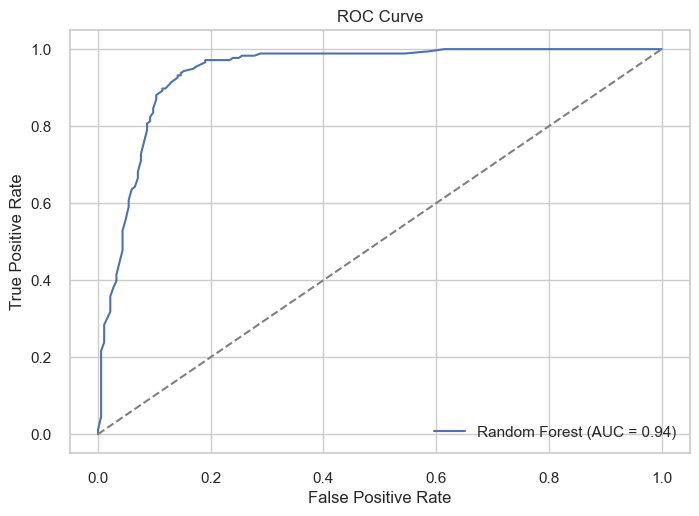

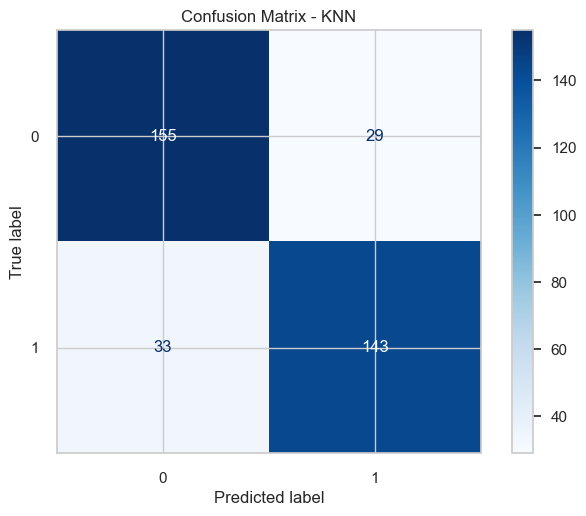


===== AdaBoost =====


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


              precision    recall  f1-score   support

           0       0.90      0.88      0.89       184
           1       0.88      0.89      0.88       176

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.89       360
weighted avg       0.89      0.89      0.89       360



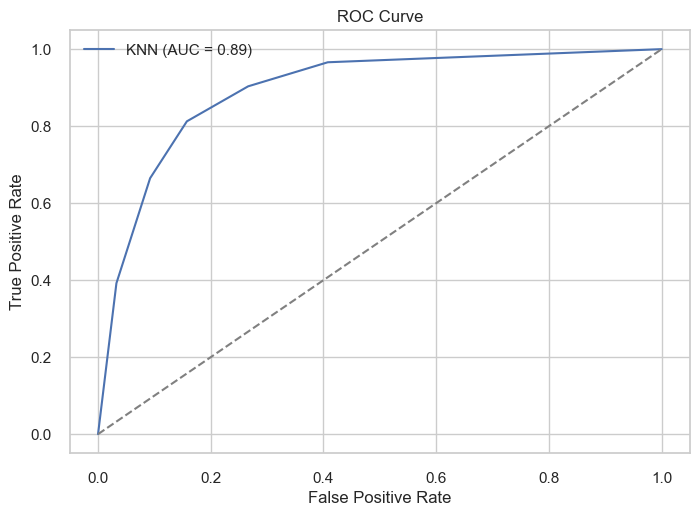

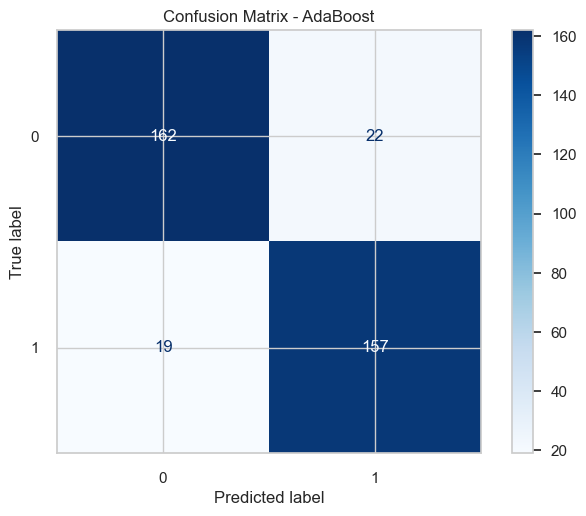


===== XGBoost =====
              precision    recall  f1-score   support

           0       0.91      0.84      0.87       184
           1       0.84      0.91      0.88       176

    accuracy                           0.88       360
   macro avg       0.88      0.88      0.87       360
weighted avg       0.88      0.88      0.87       360



C:\Users\bugra\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:26:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


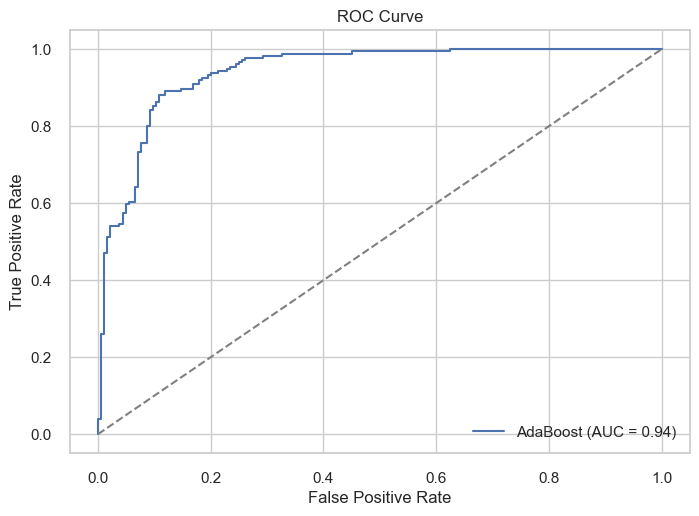

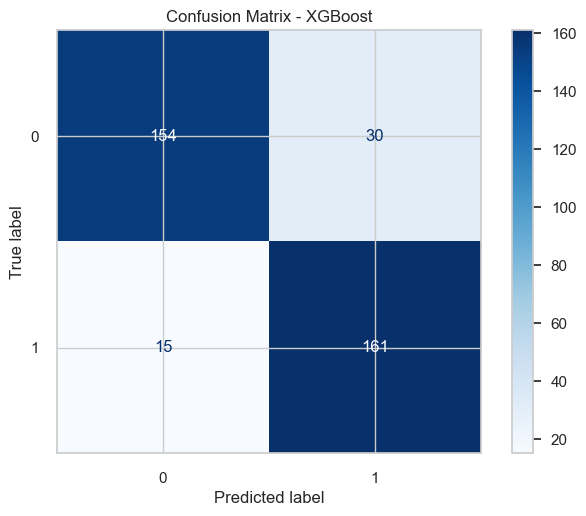


===== Gradient Boosting =====
              precision    recall  f1-score   support

           0       0.93      0.83      0.88       184
           1       0.84      0.94      0.89       176

    accuracy                           0.88       360
   macro avg       0.89      0.88      0.88       360
weighted avg       0.89      0.88      0.88       360



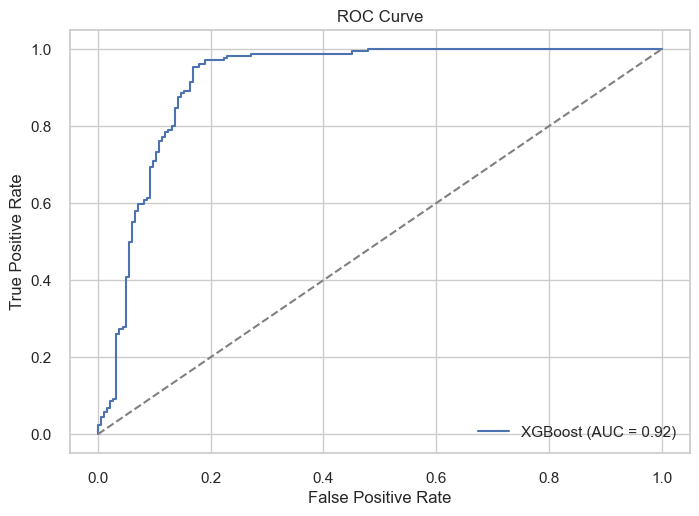

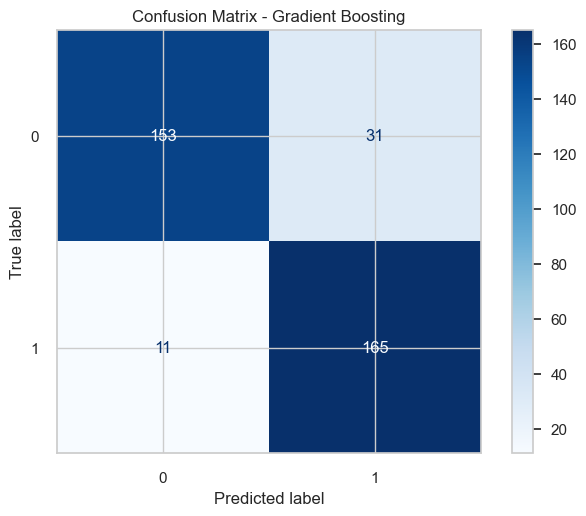

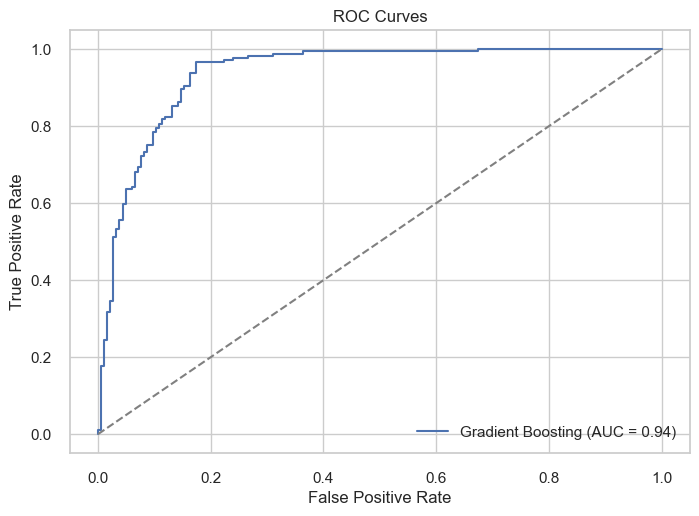


=== Accuracy Karşılaştırma Tablosu ===
                 Model  Accuracy
2        Random Forest     88.89
4             AdaBoost     88.61
6    Gradient Boosting     88.33
5              XGBoost     87.50
0  Logistic Regression     83.89
1        Decision Tree     82.78
3                  KNN     82.78


In [148]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# Veriyi yükle
df = pd.read_csv('cleaned_data.csv')
X = df.drop('currently_have_mental_health_disorder', axis=1)
y = df['currently_have_mental_health_disorder'].replace(2, 1)

# Veriyi ölçekle
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE ile dengele
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train/Test böl
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# ROC çizim fonksiyonu
def plot_roc_curve(fpr, tpr, roc_auc, model_name):
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()

# Confusion Matrix fonksiyonu
def plot_confusion_matrix(y_test, y_pred, model_name):
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

# Model listesi
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "AdaBoost": AdaBoostClassifier(n_estimators=100),
    "XGBoost": xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Sonuçları saklamak için tablo
results = []

plt.figure(figsize=(10, 8))

for name, model in models.items():
    print(f"\n===== {name} =====")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test)[:, 1]
    
    # Accuracy ve diğer metrikler
    report = classification_report(y_test, y_pred, output_dict=True)
    accuracy = report['accuracy']
    print(classification_report(y_test, y_pred))
    results.append({'Model': name, 'Accuracy': round(accuracy * 100, 2)})

    # Confusion Matrix
    plot_confusion_matrix(y_test, y_pred, name)

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    roc_auc = auc(fpr, tpr)
    plot_roc_curve(fpr, tpr, roc_auc, name)

# Tüm ROC’ları tek grafikte göster
plt.title("ROC Curves")
plt.show()

# Accuracy sonuçlarını tablo olarak yazdır
df_results = pd.DataFrame(results)
print("\n=== Accuracy Karşılaştırma Tablosu ===")
print(df_results.sort_values(by='Accuracy', ascending=False))


C:\Users\bugra\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:26:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
C:\Users\bugra\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [16:26:23] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


=== ENSEMBLE MODEL (VotingClassifier) ===
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       184
           1       0.84      0.95      0.89       176

    accuracy                           0.89       360
   macro avg       0.89      0.89      0.89       360
weighted avg       0.90      0.89      0.89       360



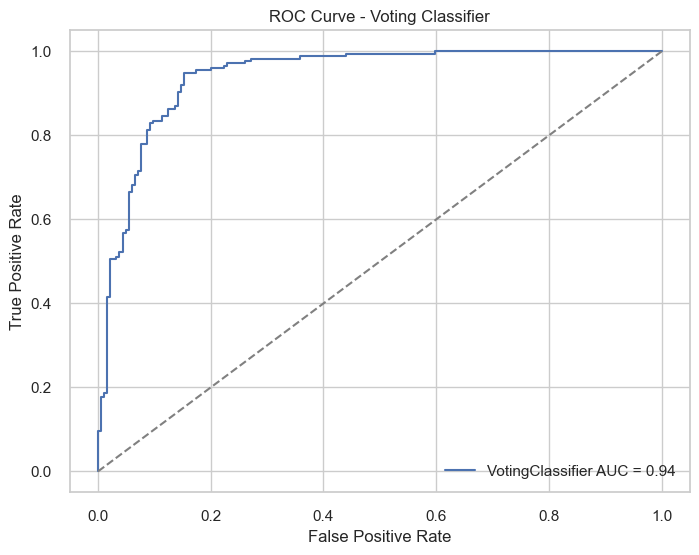

In [149]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt

# Veri
df = pd.read_csv("cleaned_data.csv")
X = df.drop("currently_have_mental_health_disorder", axis=1)
y = df["currently_have_mental_health_disorder"].replace(2, 1)

# Ölçekleme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

# Train/Test
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

# === XGBoost Hiperparametre Ayarı ===
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1]
}

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid,
                           scoring='accuracy', cv=3, verbose=0, n_jobs=-1)

grid_search.fit(X_train, y_train)
best_xgb = grid_search.best_estimator_

# === Ensemble (Topluluk) Modeli ===
voting_clf = VotingClassifier(estimators=[
    ('lr', LogisticRegression(max_iter=1000)),
    ('dt', DecisionTreeClassifier()),
    ('rf', RandomForestClassifier(n_estimators=100)),
    ('gb', GradientBoostingClassifier()),
    ('xgb', best_xgb)
], voting='soft')

voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)
y_proba = voting_clf.predict_proba(X_test)[:, 1]

# === Değerlendirme ===
print("=== ENSEMBLE MODEL (VotingClassifier) ===")
print(classification_report(y_test, y_pred))

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'VotingClassifier AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Voting Classifier')
plt.legend()
plt.show()
